In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

ImportError: DLL load failed while importing _path: No se puede encontrar el módulo especificado.

In [10]:
import matplotlib.pyplot as plt 

ImportError: DLL load failed while importing _path: No se puede encontrar el módulo especificado.

In [26]:
file_path = '../data/base_prueba_tecnica.xlsx'
df = pd.read_excel(file_path)
df.head()

ID  Edad     Genero  Ingresos Anuales  Gasto Mensual  \
0   1    21  Masculino            222011           2297   
1   2    26  Masculino            239229           3420   
2   3    38  Masculino            716278          36965   
3   4    64   Femenino            697325           9846   
4   5    52   Femenino           1032569           6607   

   Puntuación de Crédito Región  Comportamiento en linea  \
0                    335    Sur                        8   
1                    329  Oeste                       10   
2                    711  Oeste                        9   
3                    855    Sur                        2   
4                    989    Sur                        3   

   Compras en el ultimo año  
0                        81  
1                        27  
2                        82  
3                         6  
4                         2

In [1]:


scaler = MinMaxScaler()

numeric_columns = ['Edad', 'Ingresos Anuales', 'Gasto Mensual', 'Puntuación de Crédito', 'Comportamiento en linea', 'Compras en el ultimo año']


df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])




NameError: name 'MinMaxScaler' is not defined

In [28]:
df_scaled.head()

ID      Edad     Genero  Ingresos Anuales  Gasto Mensual  \
0   1  0.057692  Masculino          0.064270       0.029229   
1   2  0.153846  Masculino          0.073342       0.054773   
2   3  0.384615  Masculino          0.324667       0.817801   
3   4  0.884615   Femenino          0.314682       0.200942   
4   5  0.653846   Femenino          0.491299       0.127266   

   Puntuación de Crédito Región  Comportamiento en linea  \
0               0.050072    Sur                 0.777778   
1               0.041488  Oeste                 1.000000   
2               0.587983  Oeste                 0.888889   
3               0.793991    Sur                 0.111111   
4               0.985694    Sur                 0.222222   

   Compras en el ultimo año  
0                  0.536913  
1                  0.174497  
2                  0.543624  
3                  0.033557  
4                  0.006711

In [5]:
# Aplicar codificación One-Hot a las variables categóricas
df_encoded = pd.get_dummies(df_scaled, columns=['Genero', 'Región'])

# Mostrar las primeras filas para verificar el resultado

df_encoded.head()

ID      Edad  Ingresos Anuales  Gasto Mensual  Puntuación de Crédito  \
0   1  0.057692          0.064270       0.029229               0.050072   
1   2  0.153846          0.073342       0.054773               0.041488   
2   3  0.384615          0.324667       0.817801               0.587983   
3   4  0.884615          0.314682       0.200942               0.793991   
4   5  0.653846          0.491299       0.127266               0.985694   

   Comportamiento en linea  Compras en el ultimo año  Genero_Femenino  \
0                 0.777778                  0.536913            False   
1                 1.000000                  0.174497            False   
2                 0.888889                  0.543624            False   
3                 0.111111                  0.033557             True   
4                 0.222222                  0.006711             True   

   Genero_Masculino  Región_Este  Región_Norte  Región_Oeste  Región_Sur  
0              True        False         False         False        True  
1              True        False         False          True       False  
2              True        False         False          True       False  
3             False        False         False         False        True  
4             False        False         False         False        True

In [25]:
df_scaled = df_scaled.drop(['Genero', 'Región'],axis=1)
df_scaled.head()

KeyError: "['Genero', 'Región'] not found in axis"

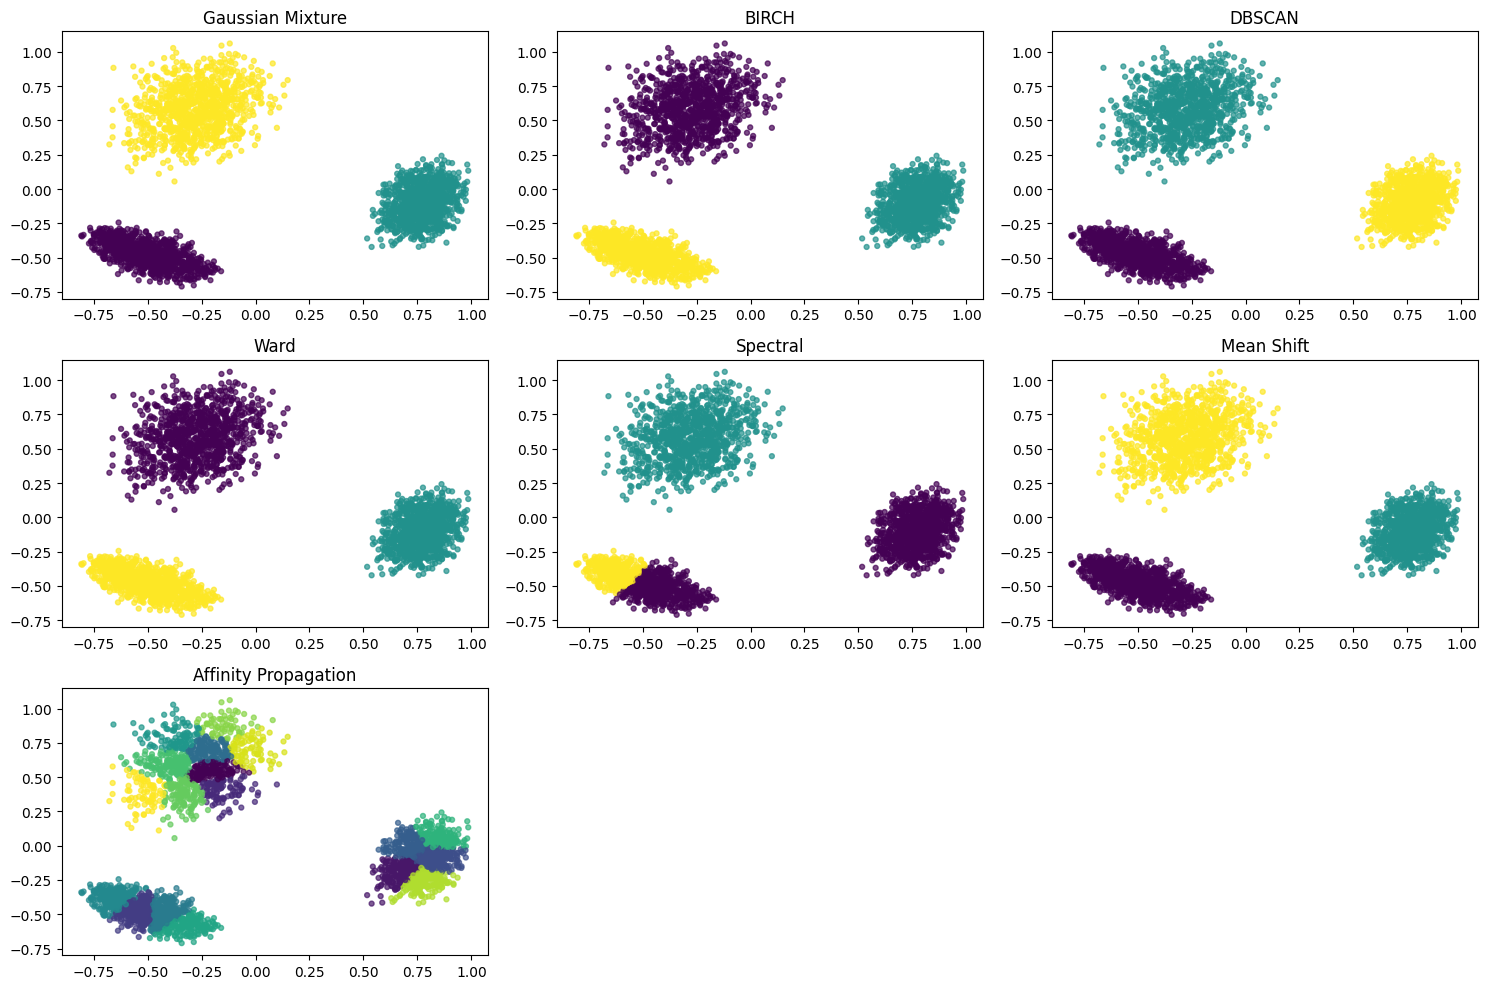

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, MeanShift, AffinityPropagation, Birch
from sklearn.mixture import GaussianMixture
import numpy as np

# Preparar los datos: usar solo las columnas numéricas y aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df_scaled[numeric_columns])

# Definir los modelos de clustering
models = [
    ('Gaussian Mixture', GaussianMixture(n_components=3)),  # Ajustar el n_components según sea necesario
    ('BIRCH', Birch(n_clusters=3)),  # Ajustar el n_clusters según sea necesario
    ('DBSCAN', DBSCAN(eps=0.3, min_samples=10)),  # Ajustar eps y min_samples según sea necesario
    ('Ward', AgglomerativeClustering(n_clusters=3, linkage='ward')),  # Ajustar el n_clusters según sea necesario
    ('Spectral', SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')),  # Ajustar el n_clusters según sea necesario
    ('Mean Shift', MeanShift(bandwidth=None)),  # MeanShift estima el bandwidth automáticamente
    ('Affinity Propagation', AffinityPropagation(damping=0.9, max_iter=200, convergence_iter=15))  # Ajustar damping, max_iter y convergence_iter según sea necesario
]

# Configurar la figura para visualizar los resultados de clustering
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models, 1):
    plt.subplot(3, 3, i)
    
    # Distinguir entre GaussianMixture y otros modelos que usan fit_predict
    if name == 'Gaussian Mixture':
        model.fit(X_reduced)
        labels = model.predict(X_reduced)
    else:
        labels = model.fit_predict(X_reduced)
    
    # Graficar los resultados
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', marker='.', s=50, alpha=0.7)
    plt.title(name)

plt.tight_layout()
plt.show()


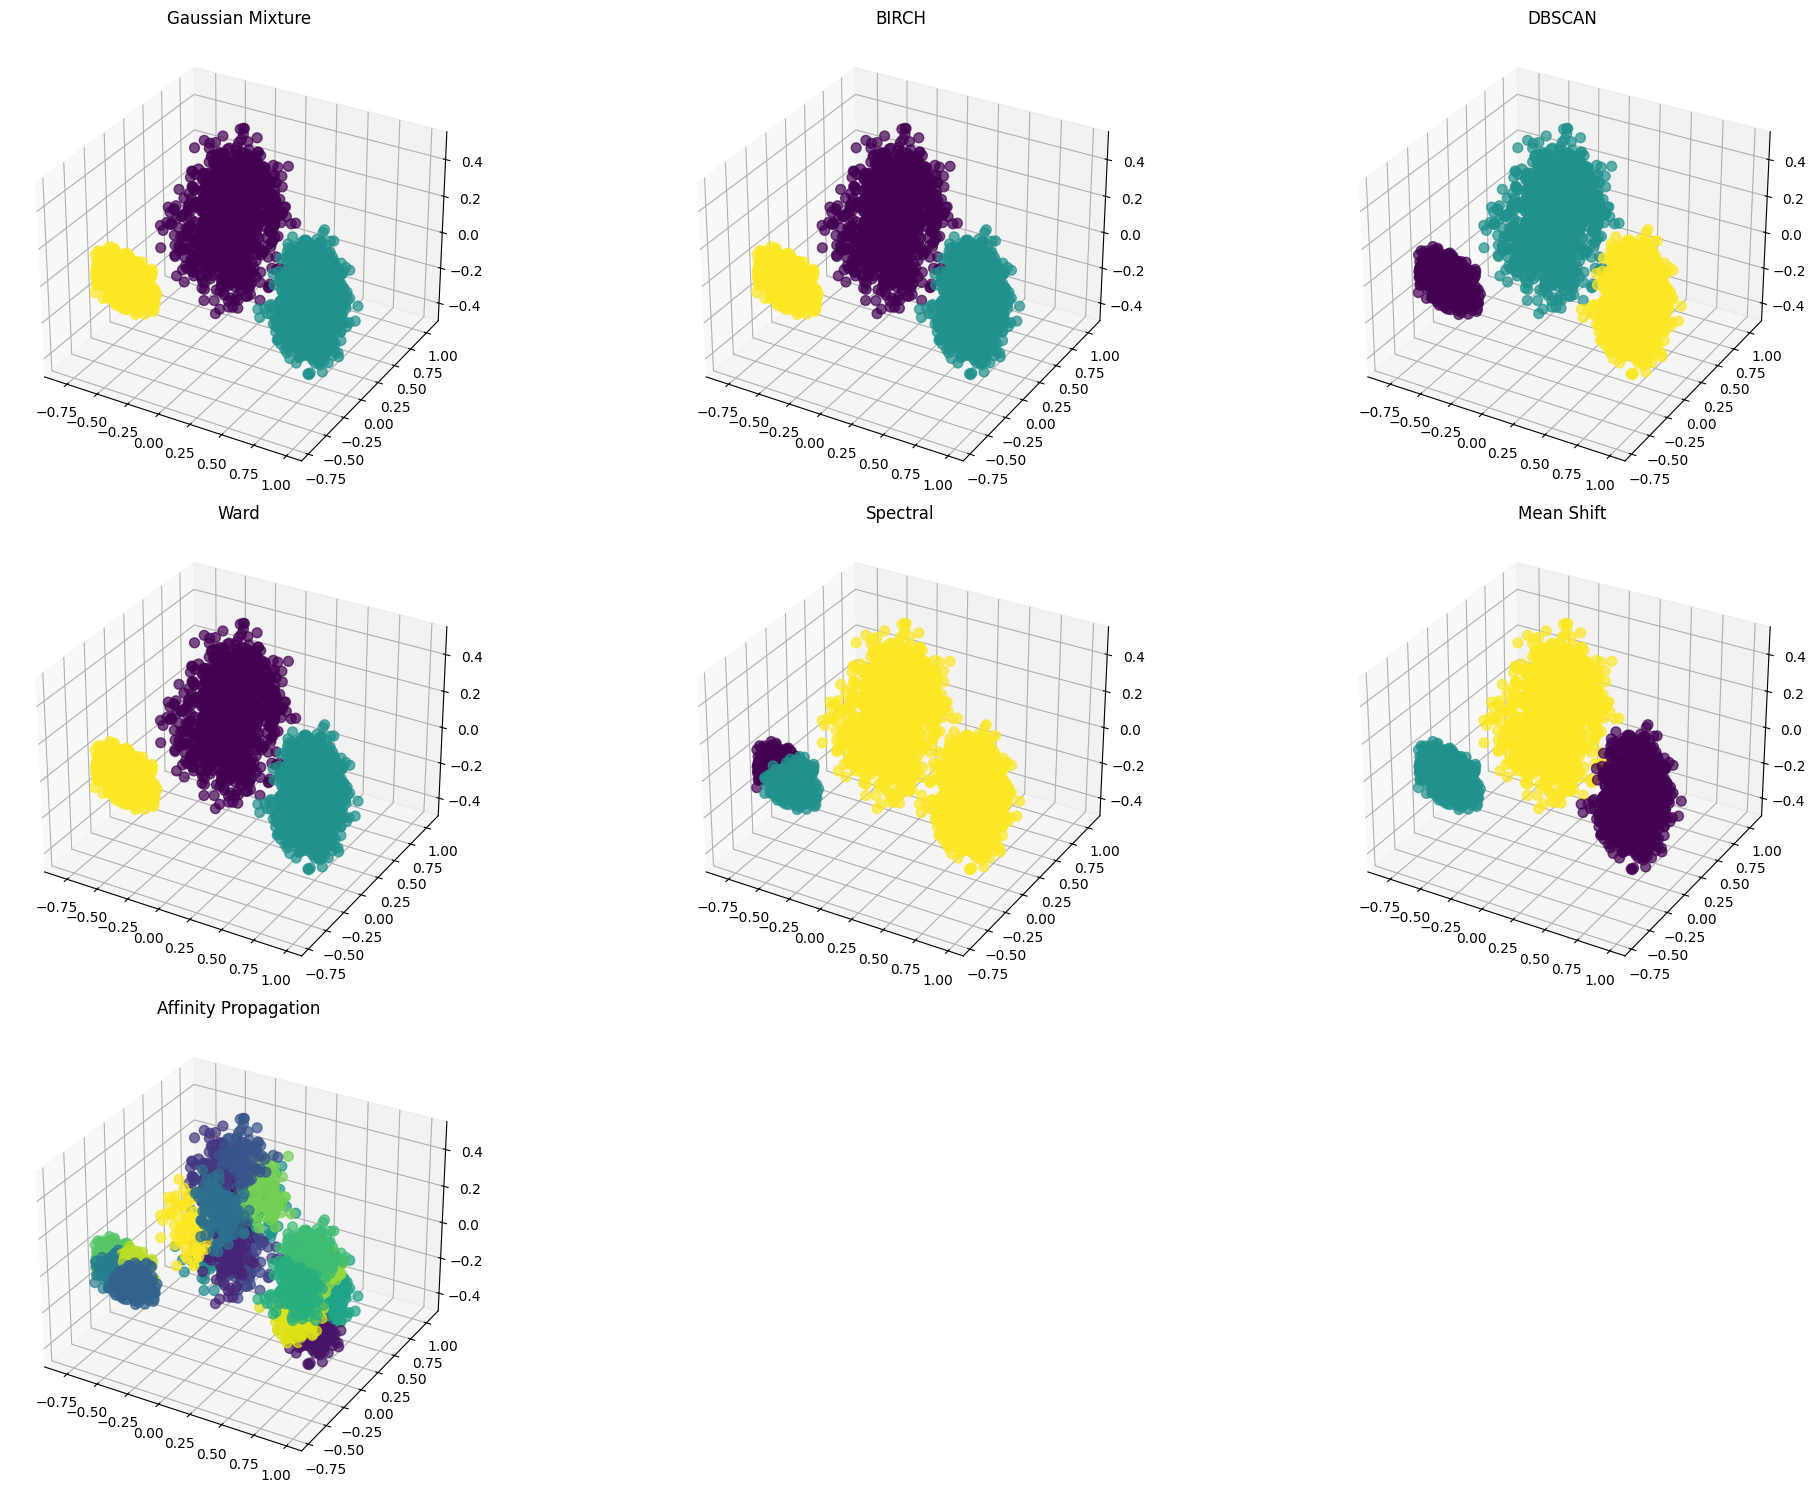

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Preparar los datos: usar solo las columnas numéricas y aplicar PCA para reducir a 3 dimensiones
pca_3d = PCA(n_components=3)
X_reduced_3d = pca_3d.fit_transform(df_scaled[numeric_columns])

# Configurar la figura para visualizar los resultados de clustering en 3D
fig = plt.figure(figsize=(20, 15))
for i, (name, model) in enumerate(models, 1):
    ax = fig.add_subplot(3, 3, i, projection='3d')
    
    # Distinguir entre GaussianMixture y otros modelos que usan fit_predict
    if name == 'Gaussian Mixture':
        model.fit(X_reduced_3d)
        labels = model.predict(X_reduced_3d)
    else:
        labels = model.fit_predict(X_reduced_3d)
    
    # Graficar los resultados en 3D
    ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], c=labels, cmap='viridis', marker='o', s=50, alpha=0.7)
    ax.set_title(name)

plt.tight_layout()
plt.show()


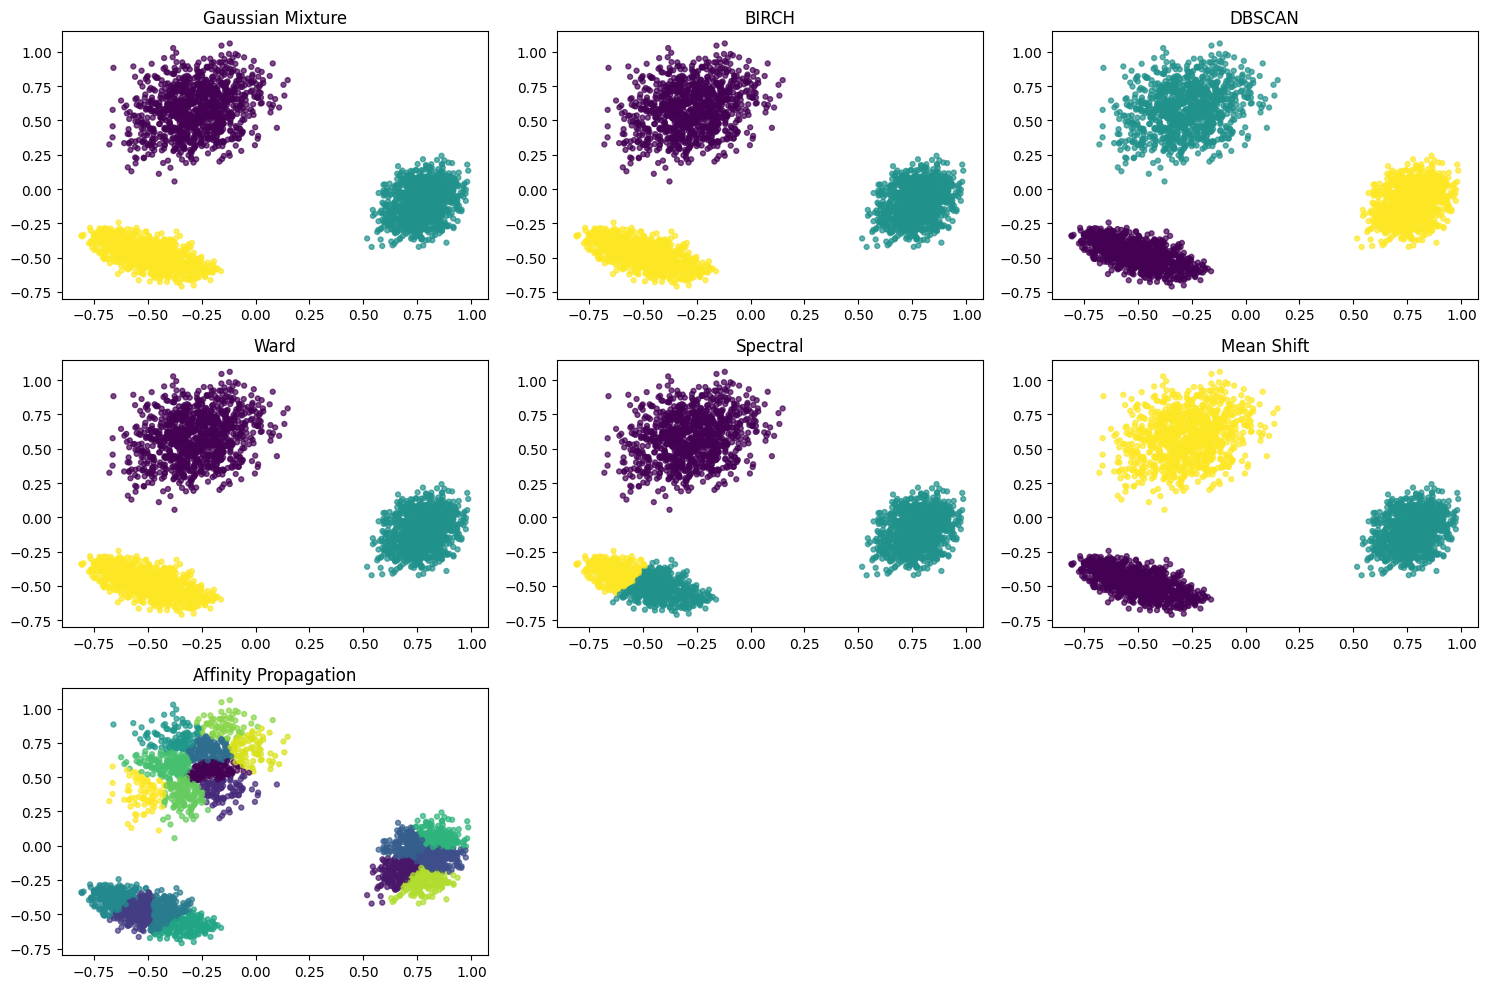

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, MeanShift, AffinityPropagation, Birch
from sklearn.mixture import GaussianMixture
import numpy as np

# Excluir la columna 'ID' de las columnas numéricas a considerar
numeric_columns_no_id = [col for col in numeric_columns if col != 'ID']

# Preparar los datos: usar solo las columnas numéricas sin 'ID' y aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df_scaled[numeric_columns_no_id])

# Definir los modelos de clustering
models = [
    ('Gaussian Mixture', GaussianMixture(n_components=3)),  # Ajustar el n_components según sea necesario
    ('BIRCH', Birch(n_clusters=3)),  # Ajustar el n_clusters según sea necesario
    ('DBSCAN', DBSCAN(eps=0.3, min_samples=10)),  # Ajustar eps y min_samples según sea necesario
    ('Ward', AgglomerativeClustering(n_clusters=3, linkage='ward')),  # Ajustar el n_clusters según sea necesario
    ('Spectral', SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')),  # Ajustar el n_clusters según sea necesario
    ('Mean Shift', MeanShift(bandwidth=None)),  # MeanShift estima el bandwidth automáticamente
    ('Affinity Propagation', AffinityPropagation(damping=0.9, max_iter=200, convergence_iter=15))  # Ajustar damping, max_iter y convergence_iter según sea necesario
]

# Configurar la figura para visualizar los resultados de clustering
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models, 1):
    plt.subplot(3, 3, i)
    
    # Distinguir entre GaussianMixture y otros modelos que usan fit_predict
    if name == 'Gaussian Mixture':
        model.fit(X_reduced)
        labels = model.predict(X_reduced)
    else:
        labels = model.fit_predict(X_reduced)
    
    # Graficar los resultados
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', marker='.', s=50, alpha=0.7)
    plt.title(name)

plt.tight_layout()
plt.show()


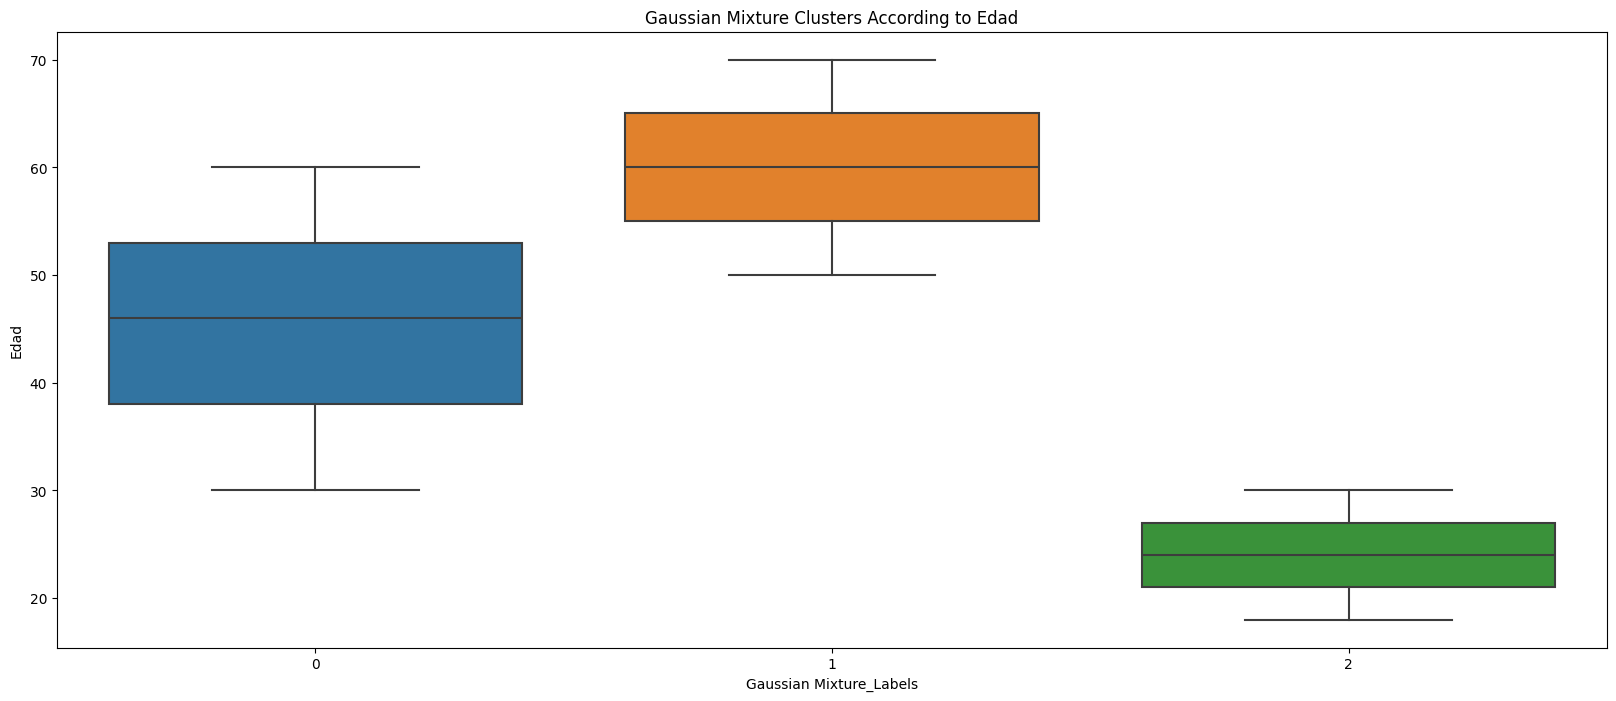

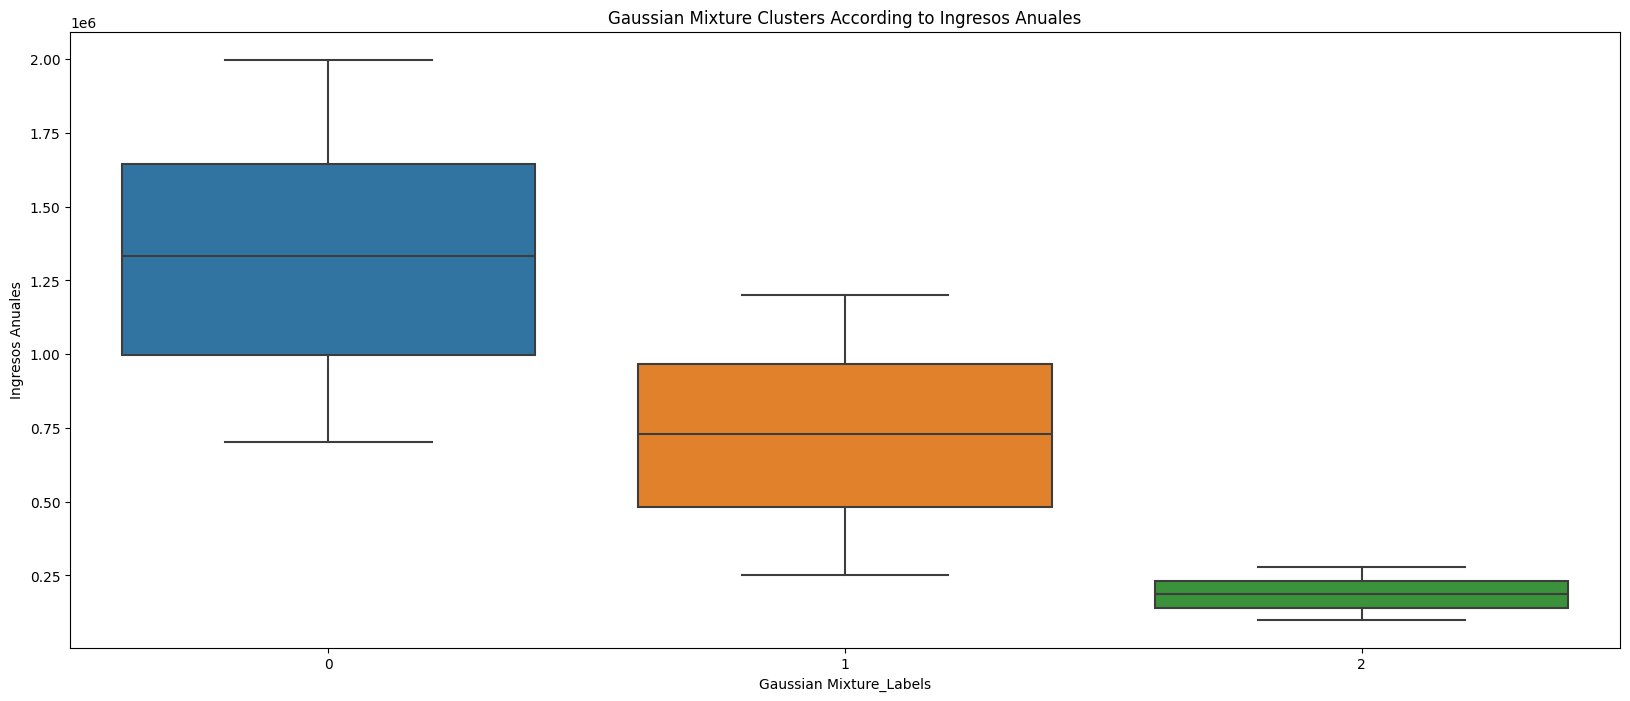

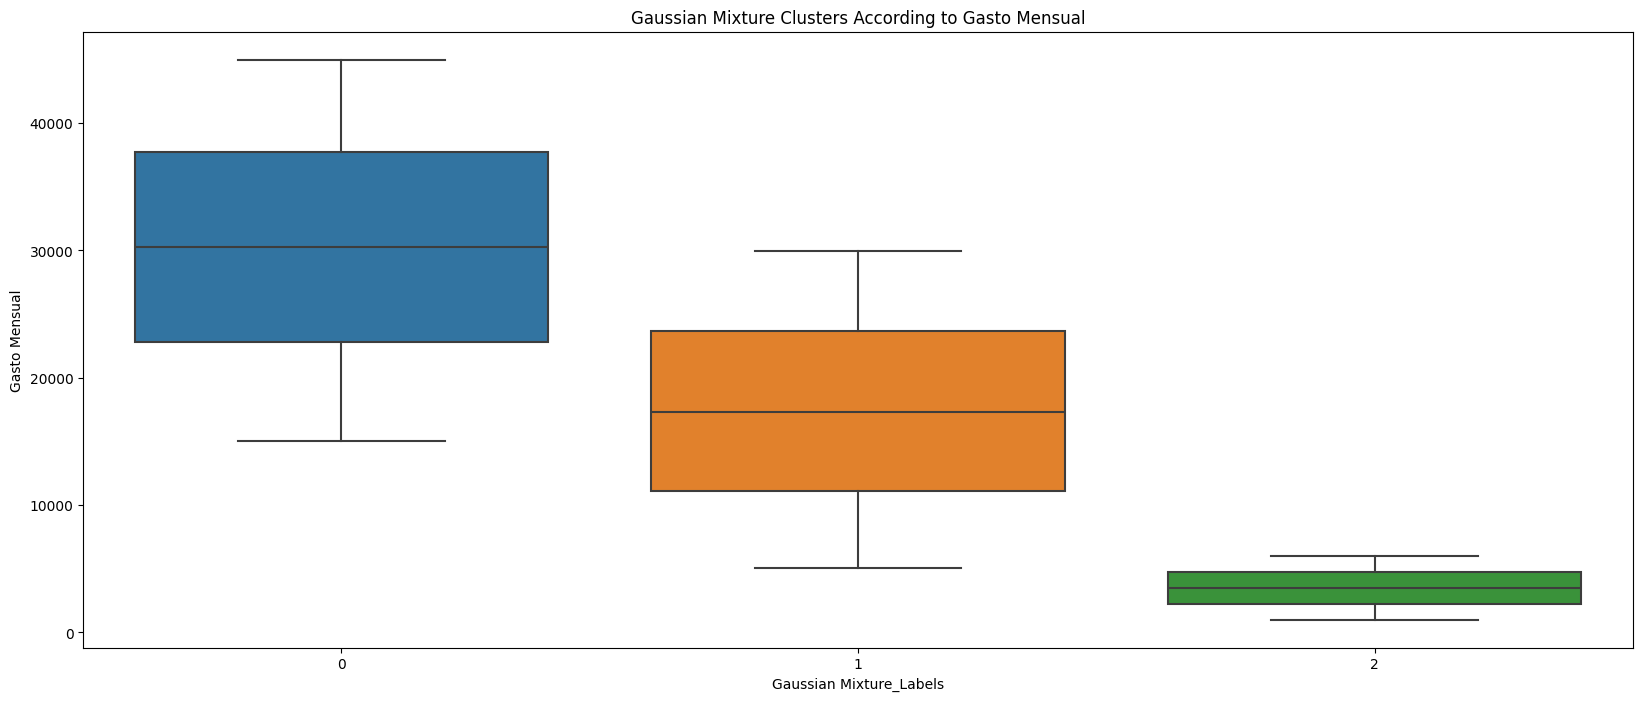

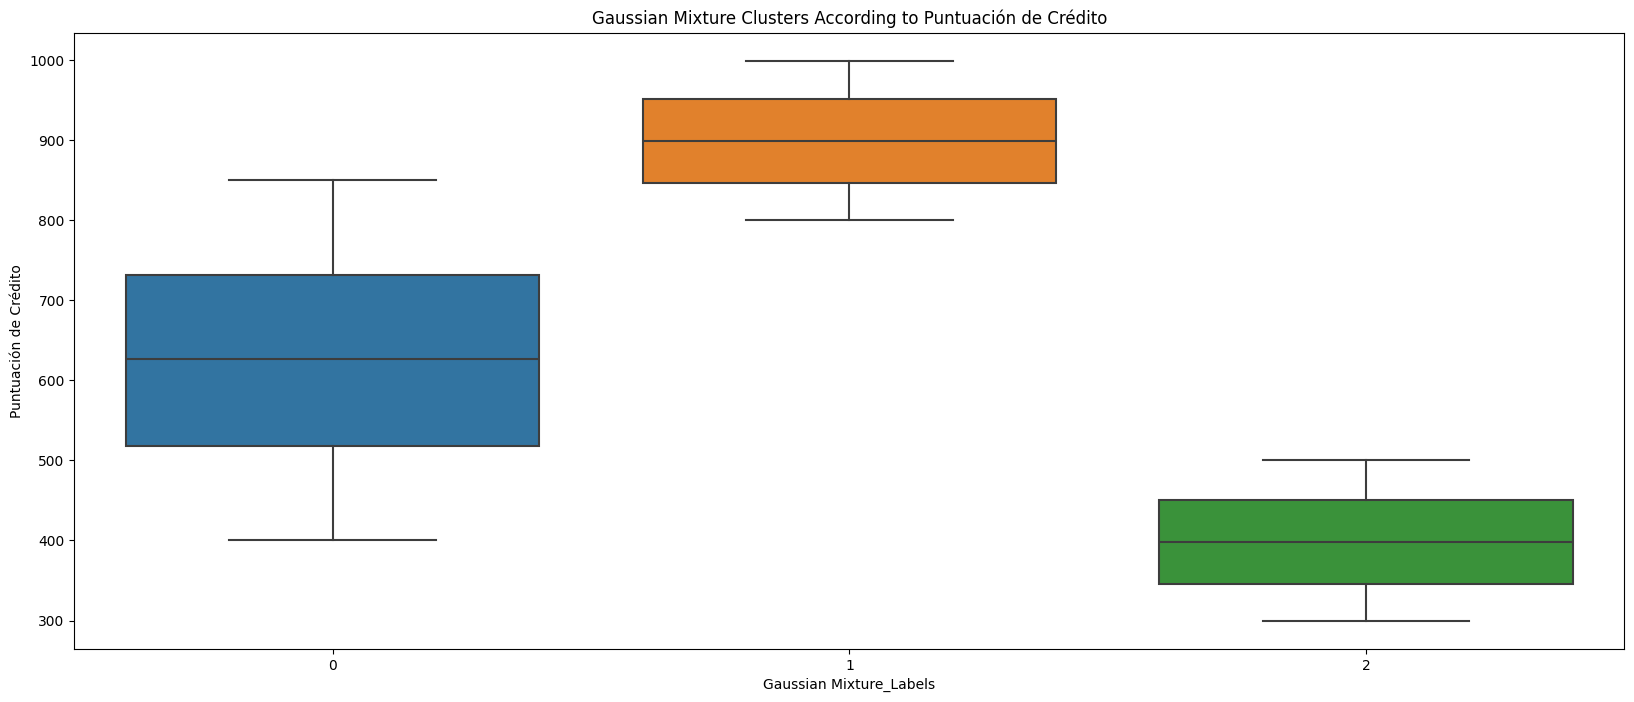

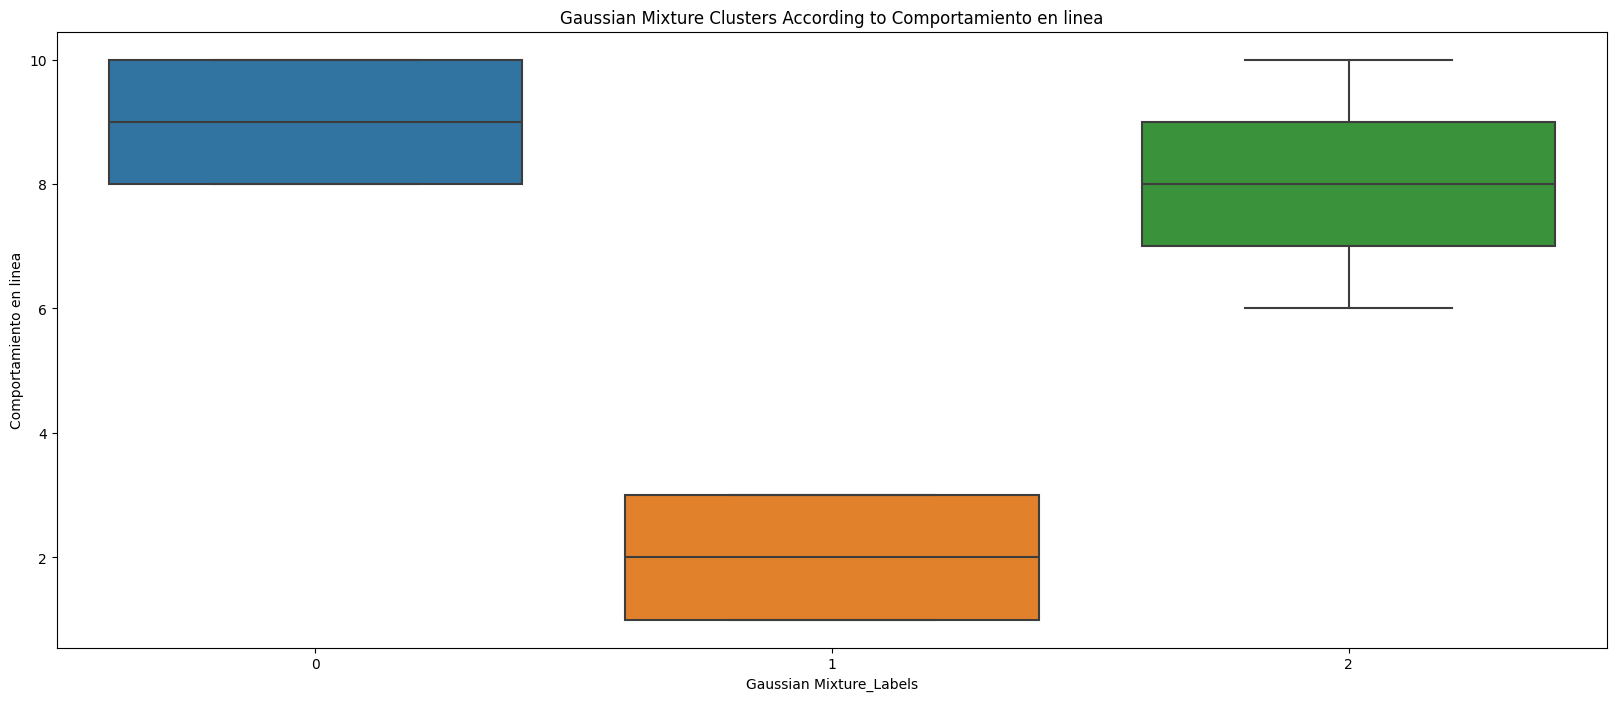

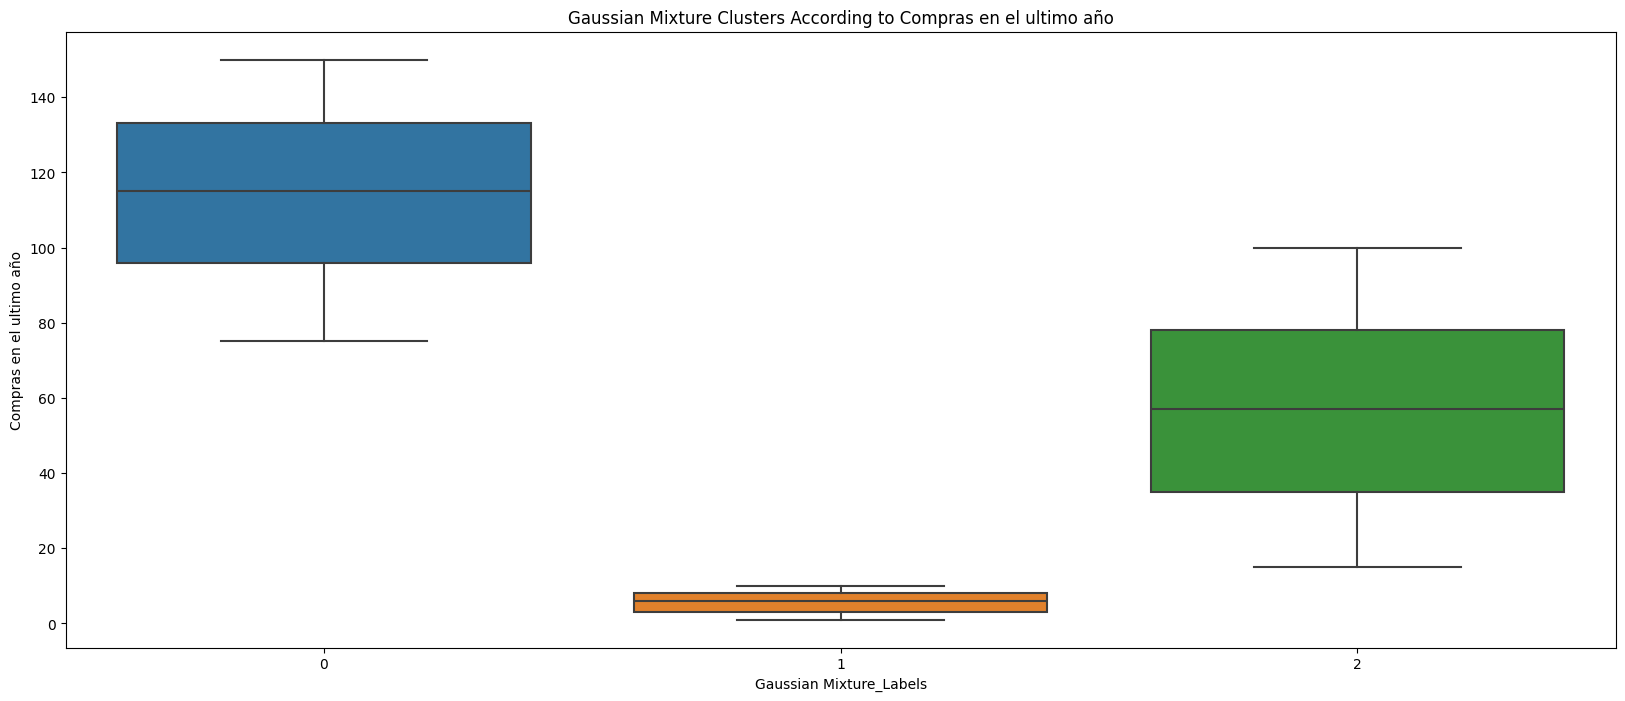

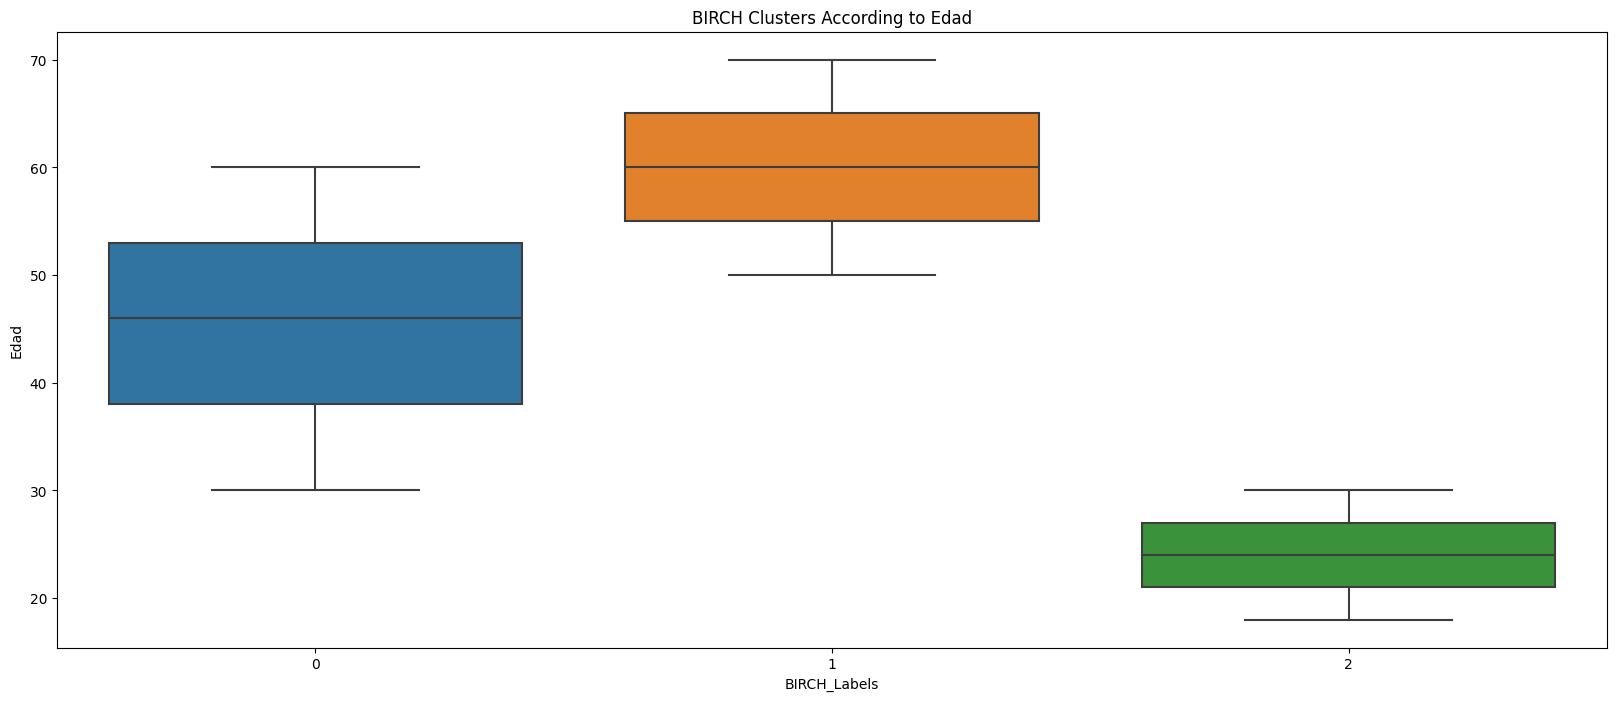

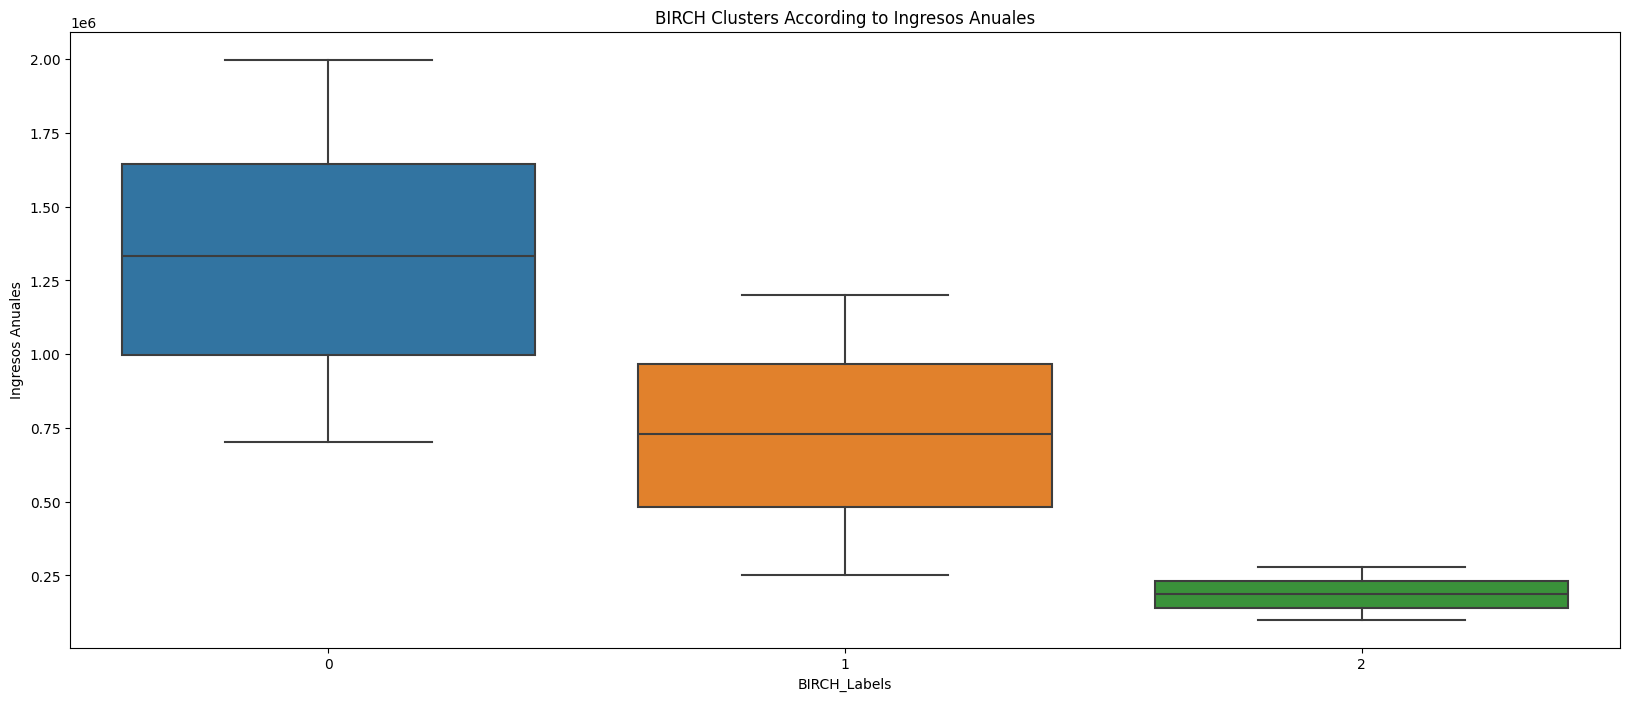

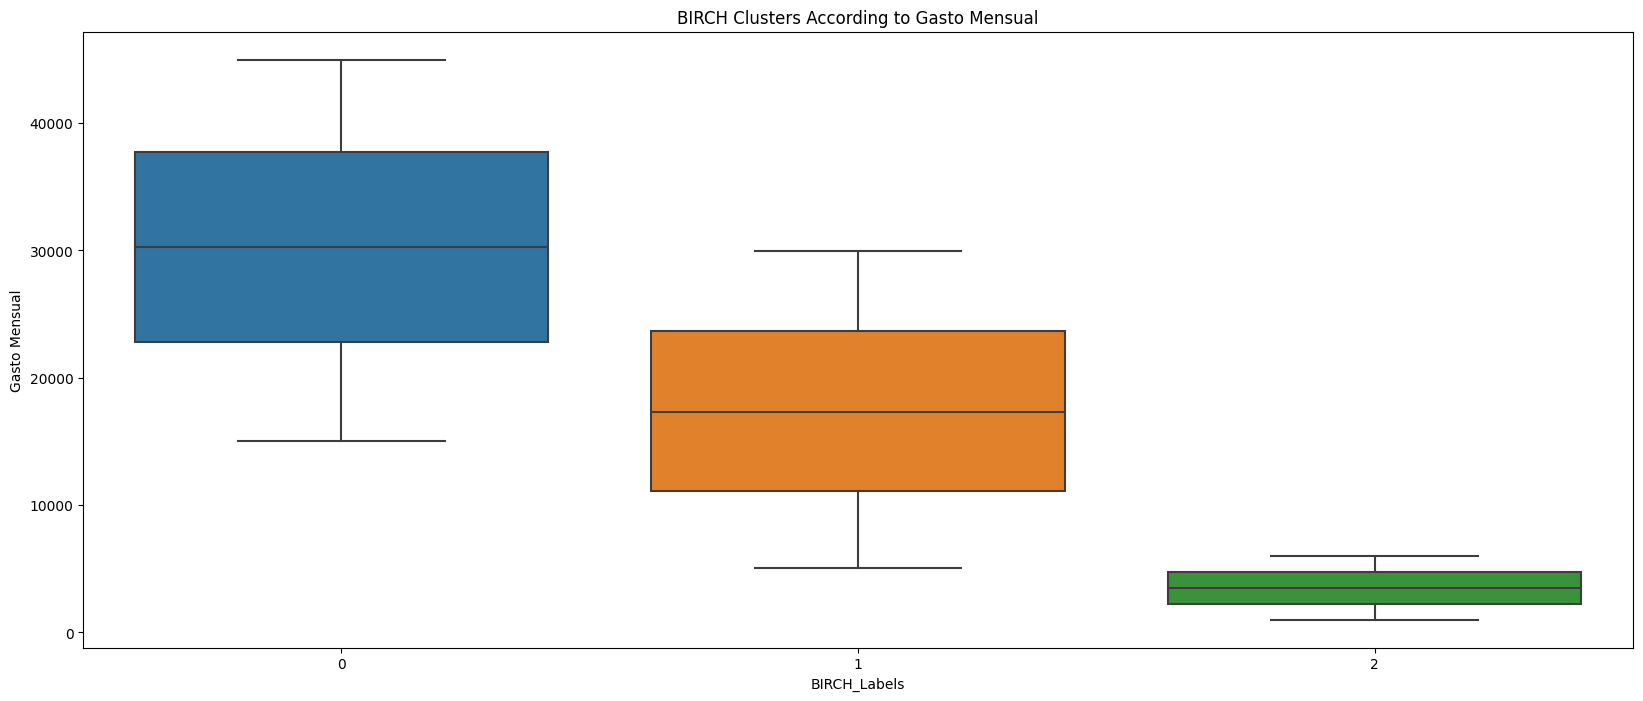

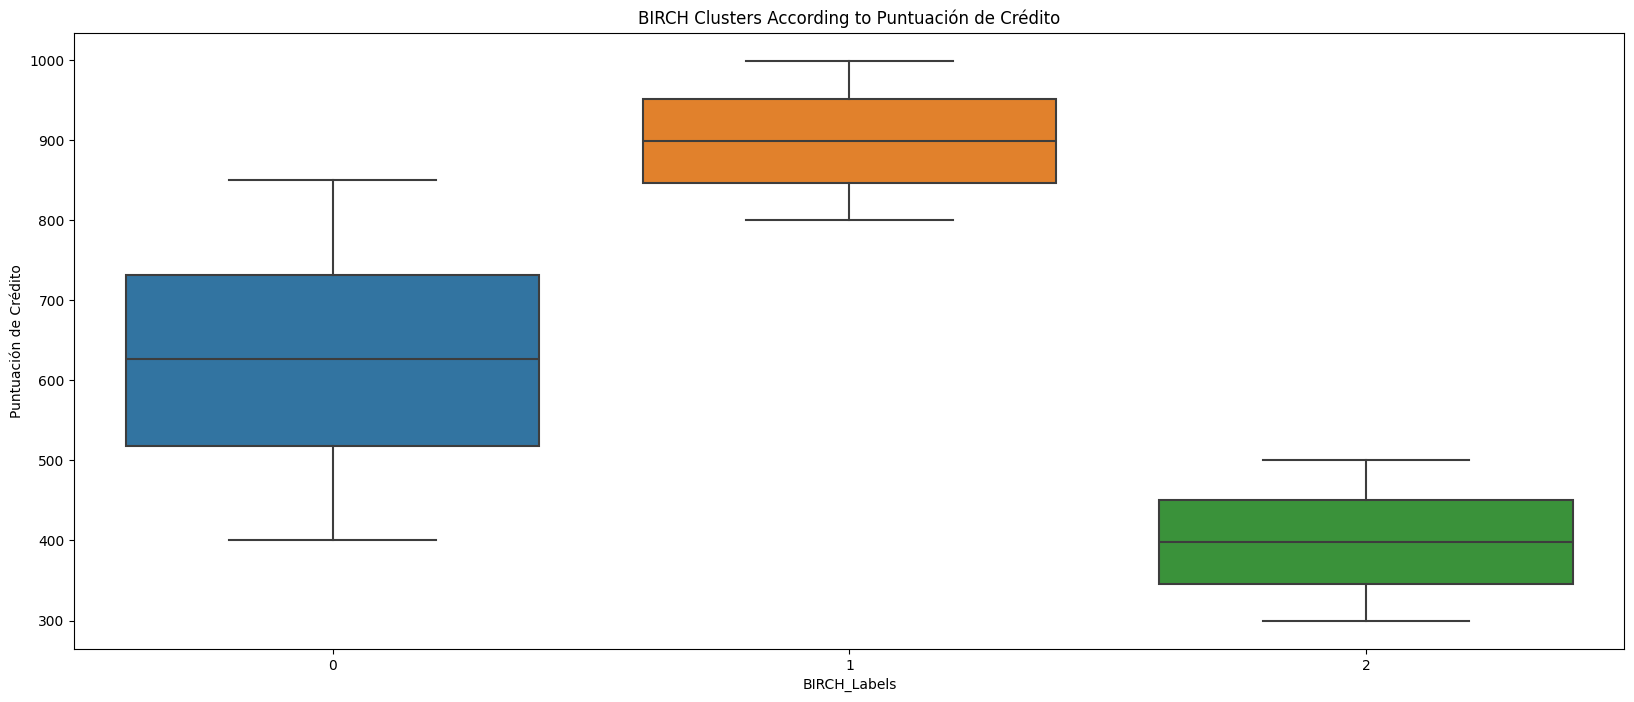

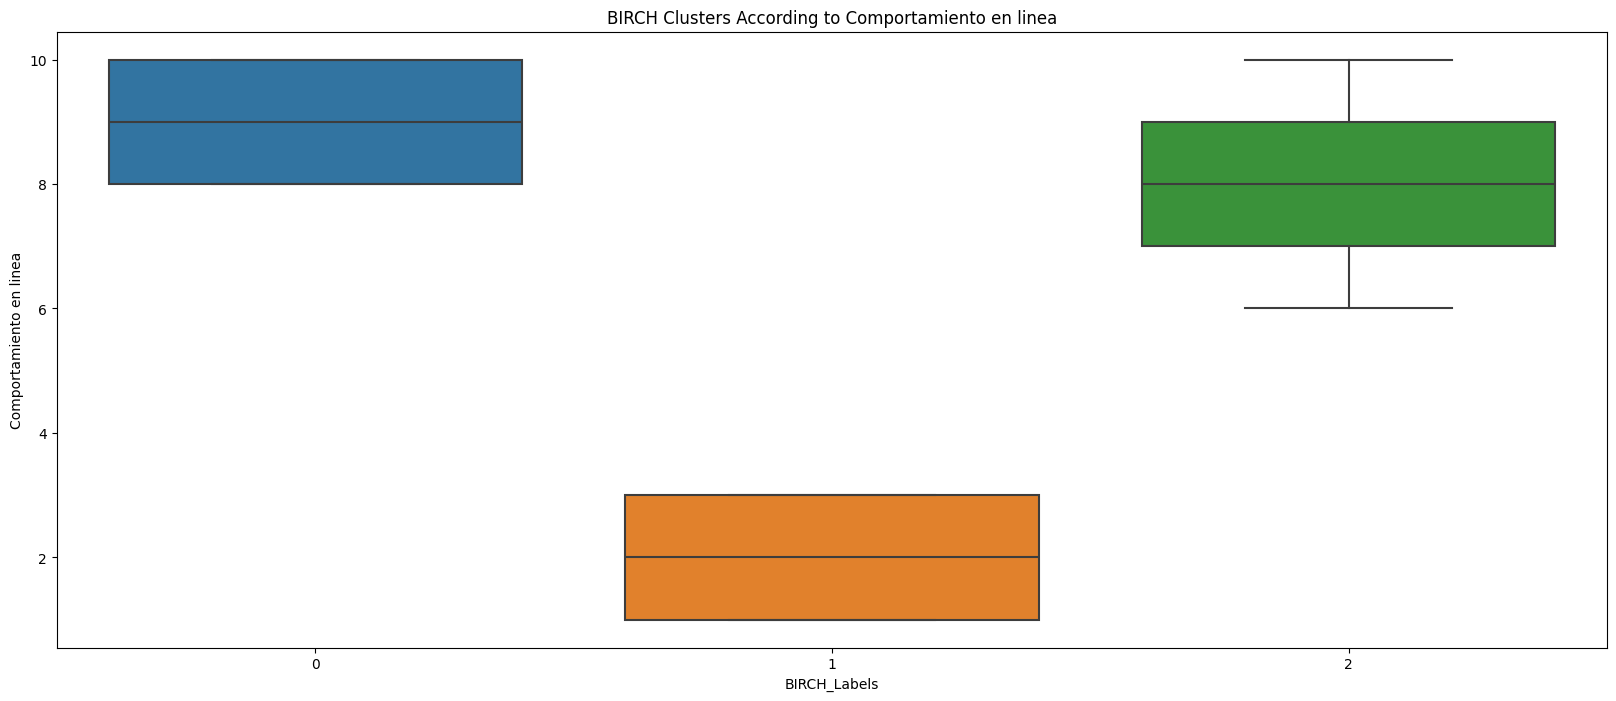

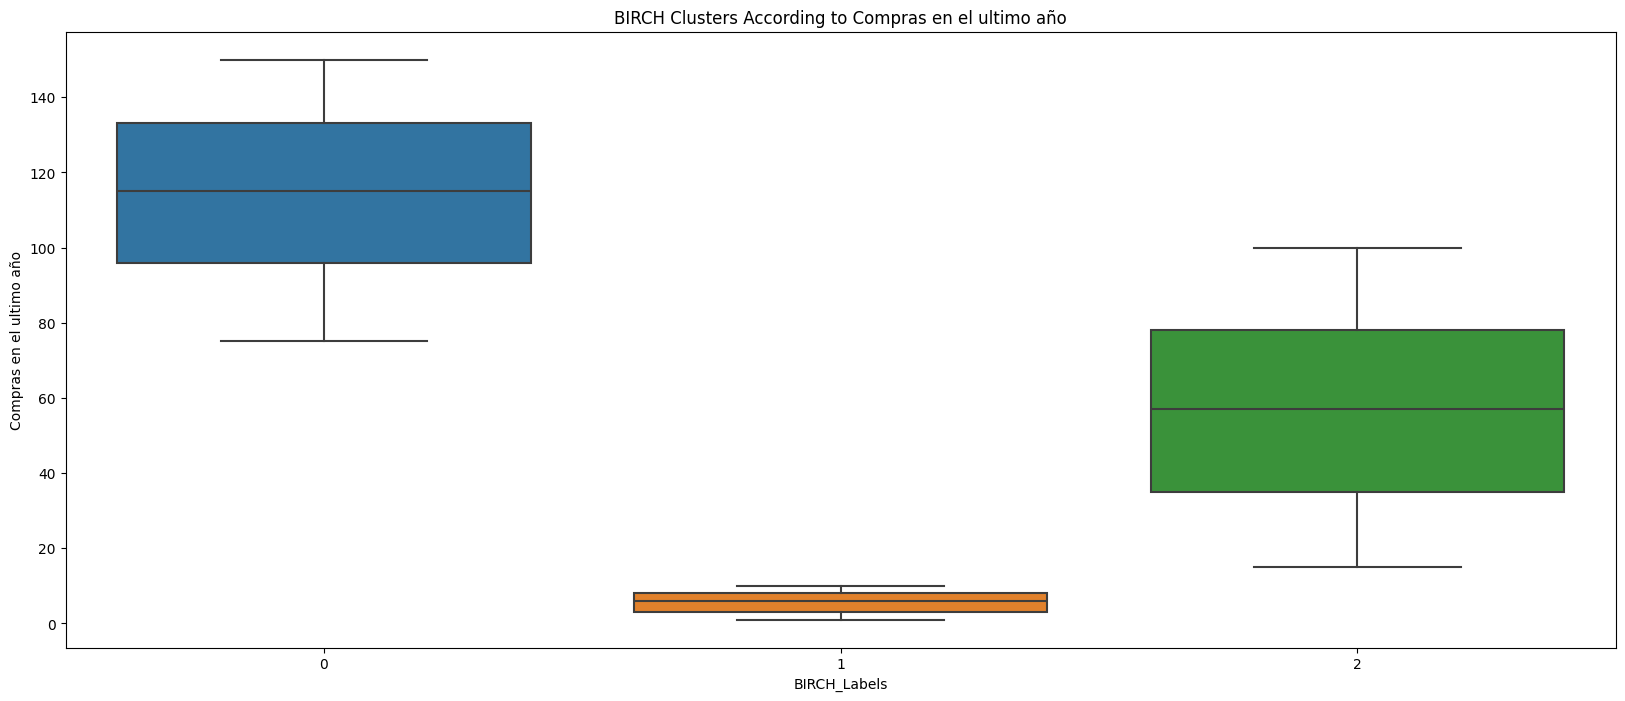

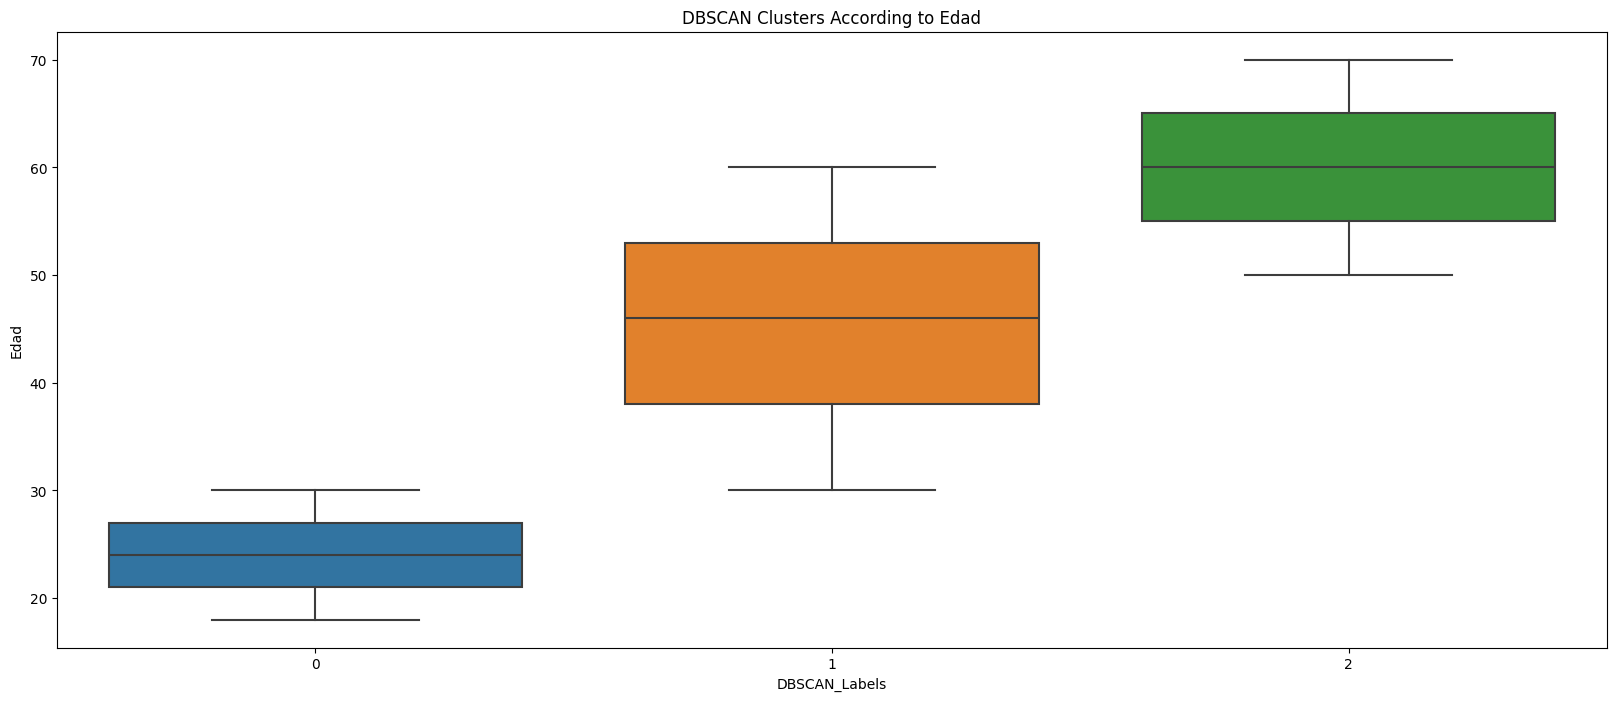

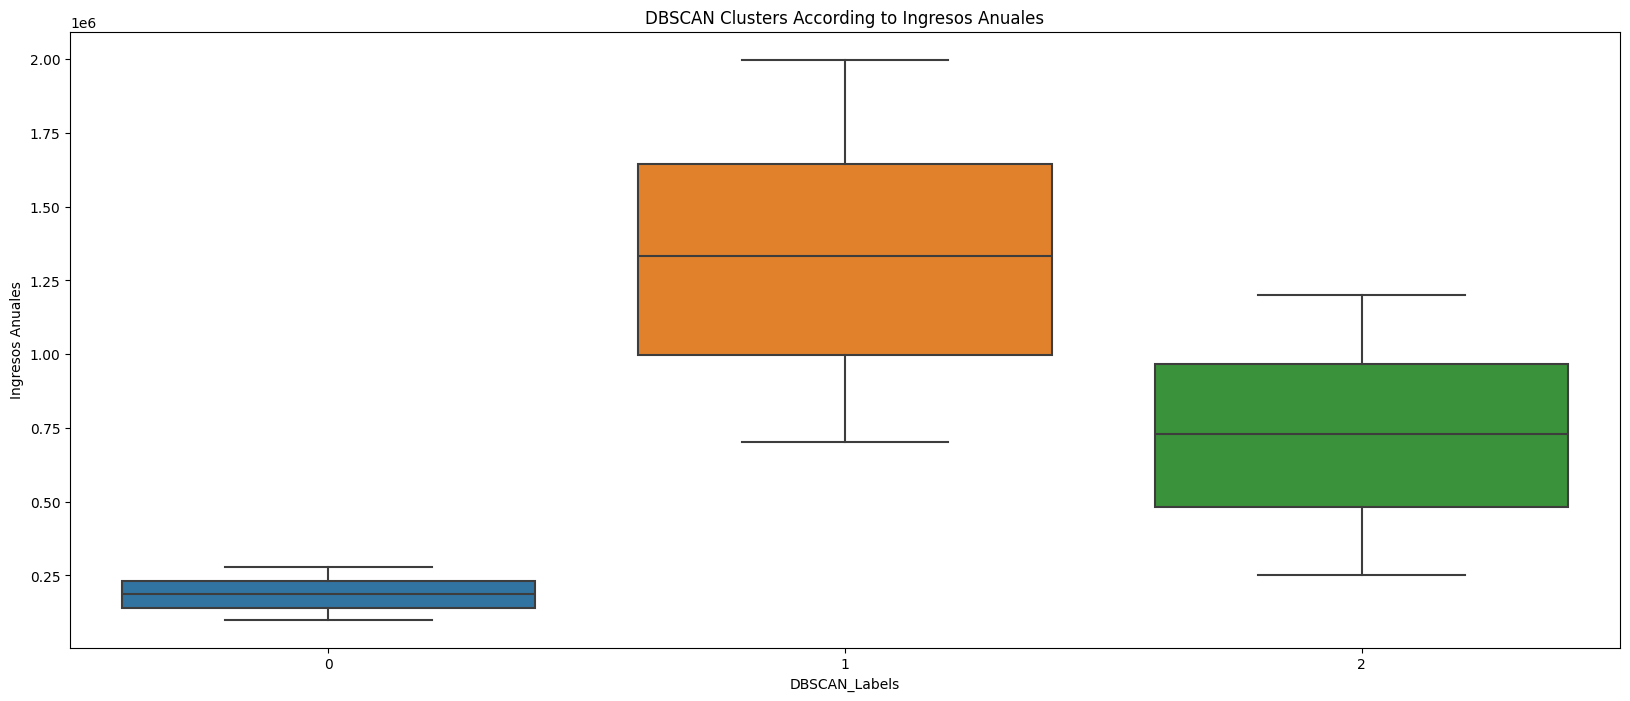

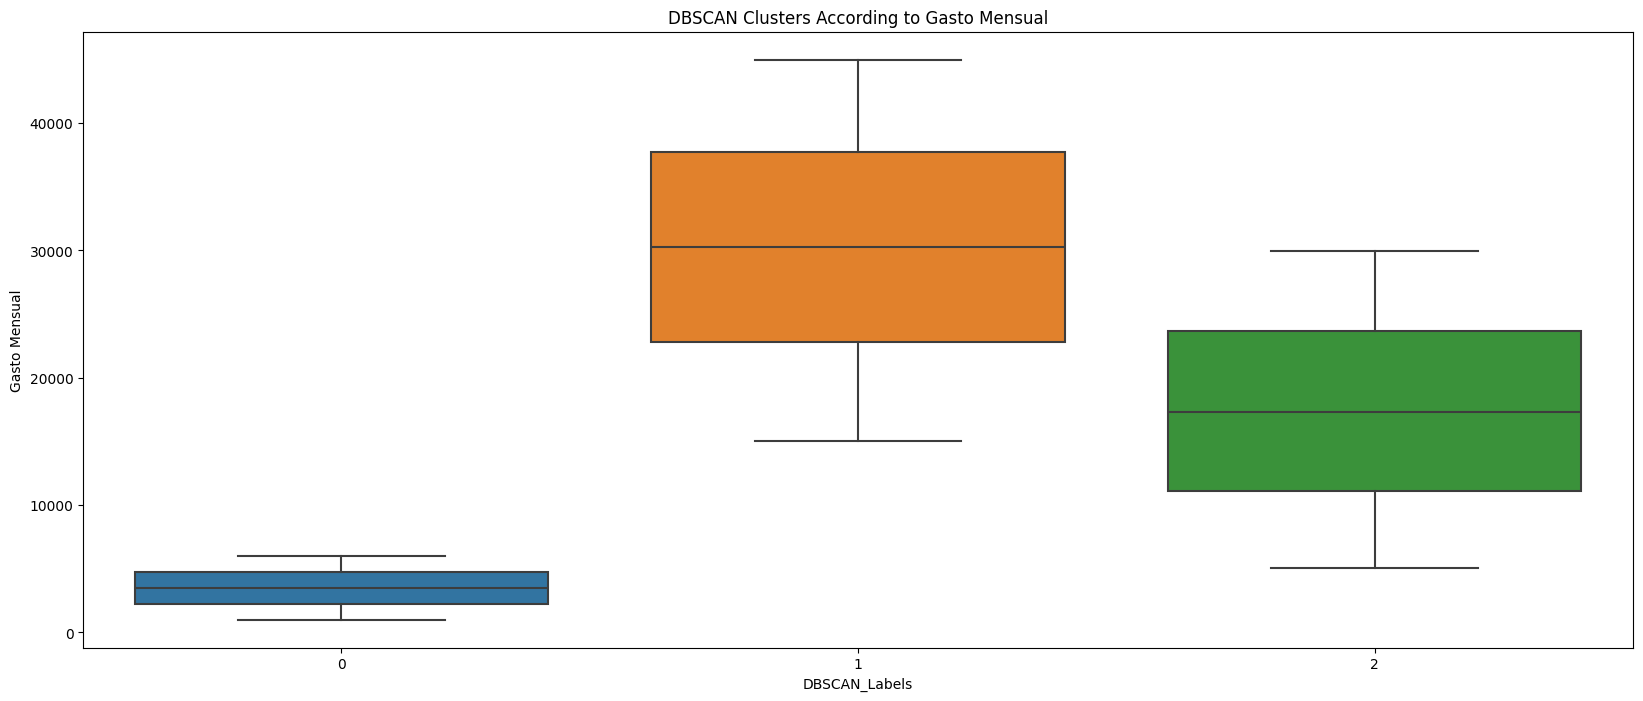

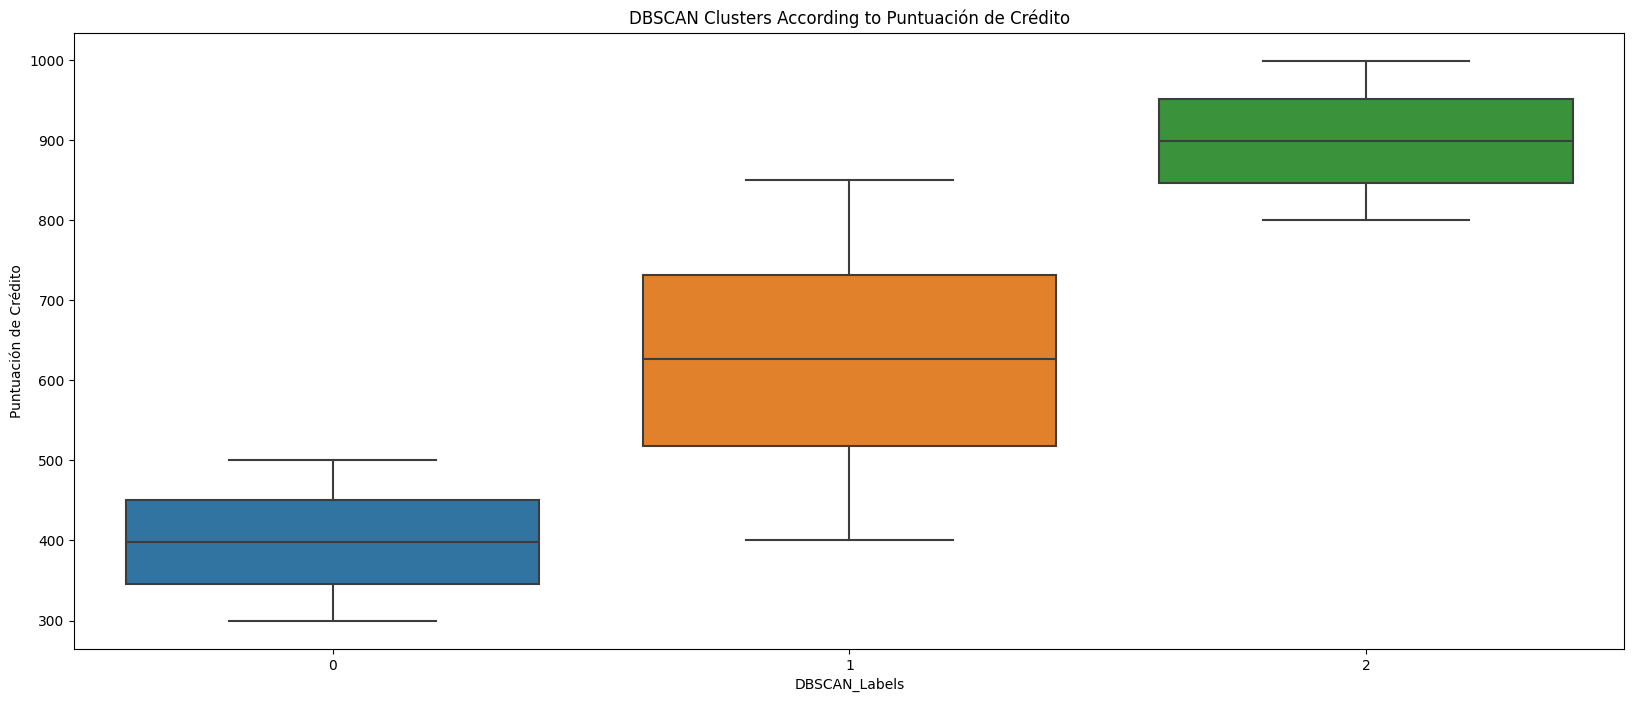

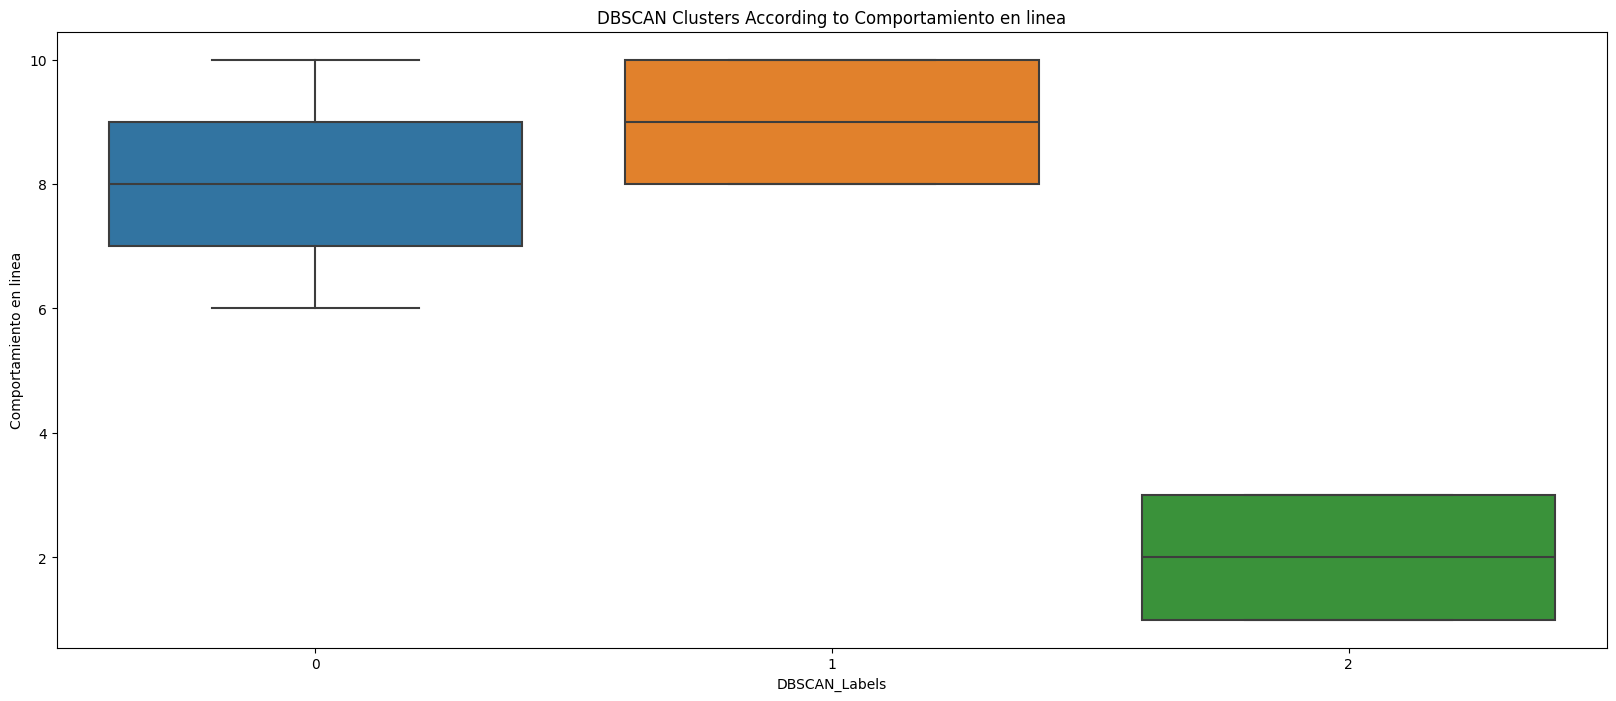

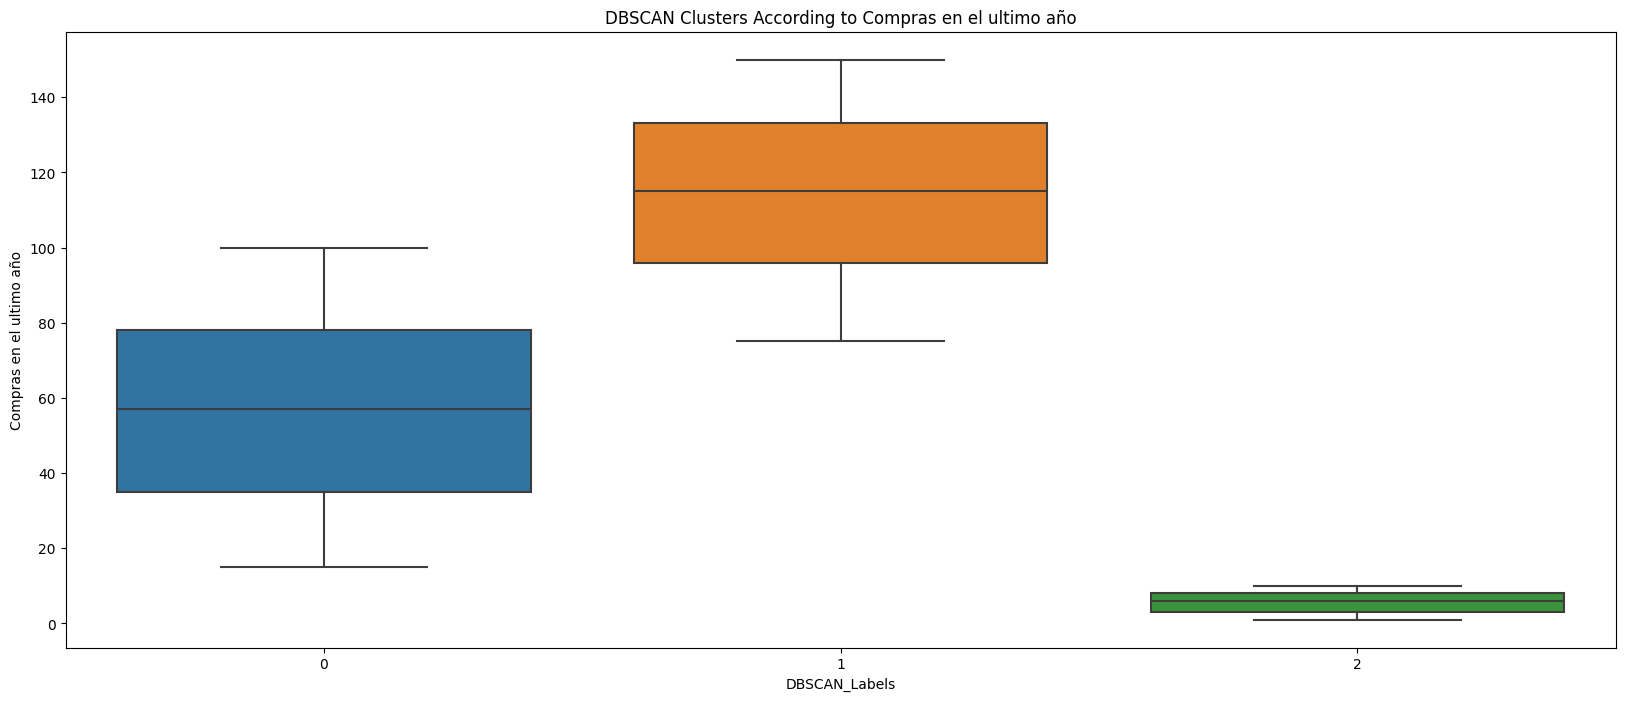

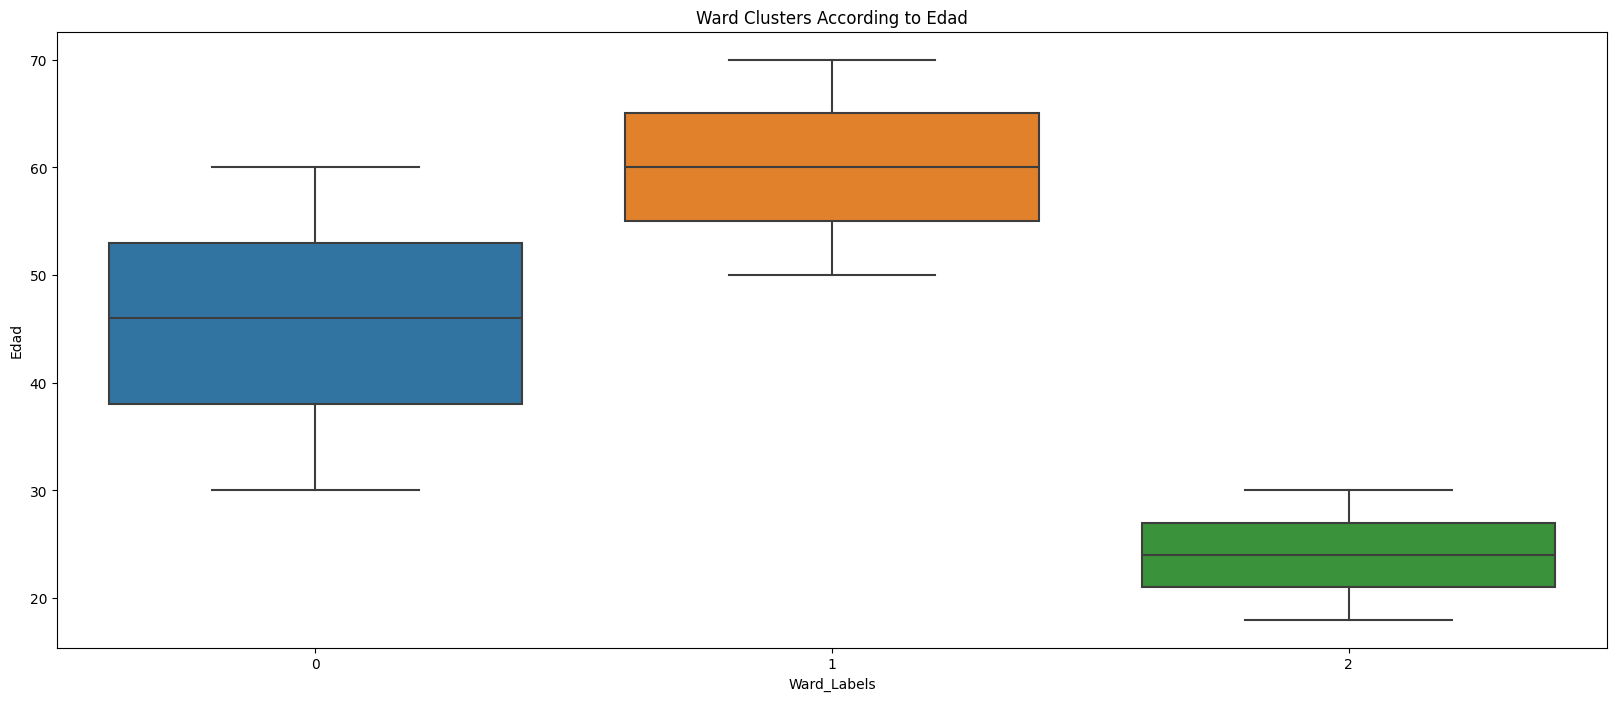

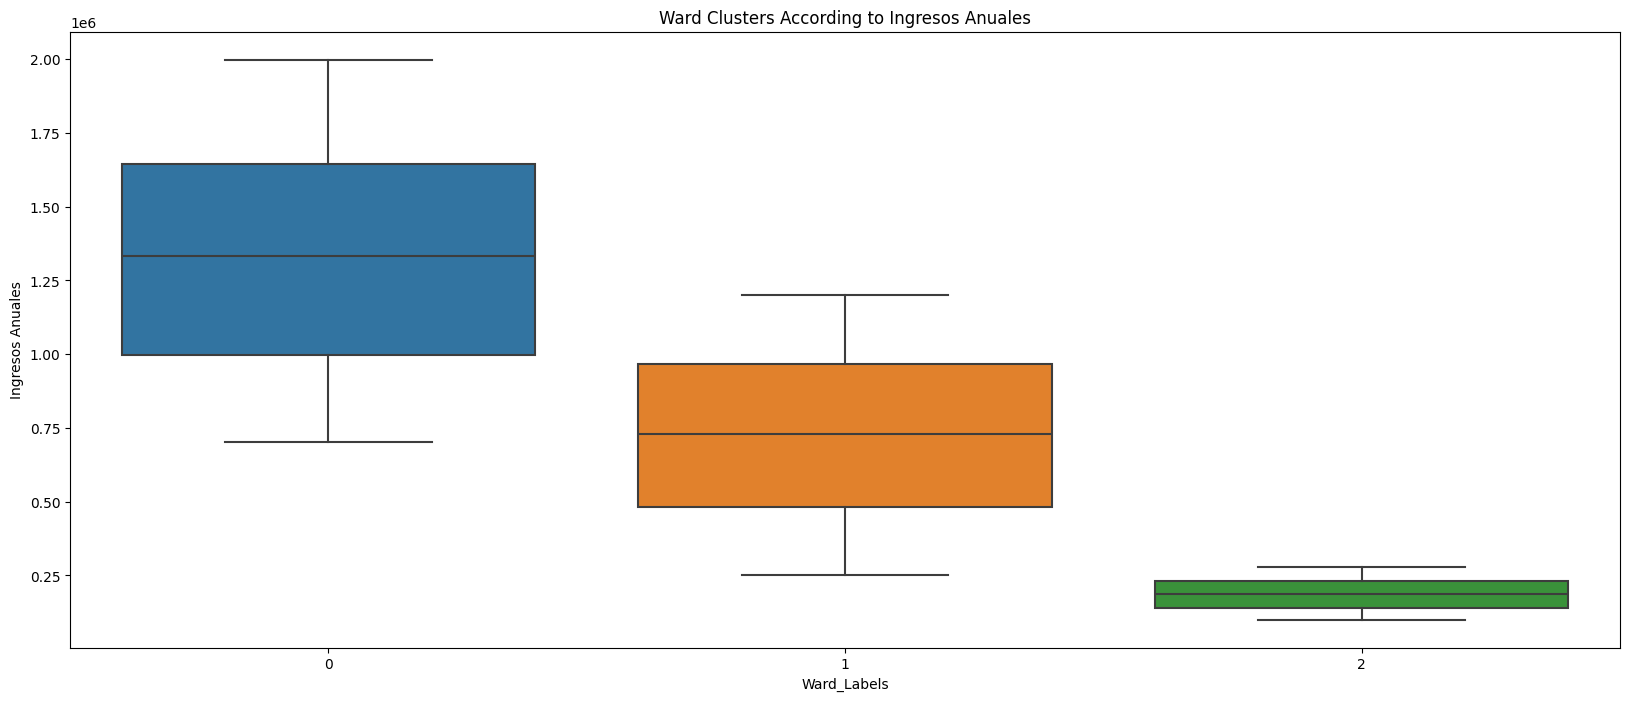

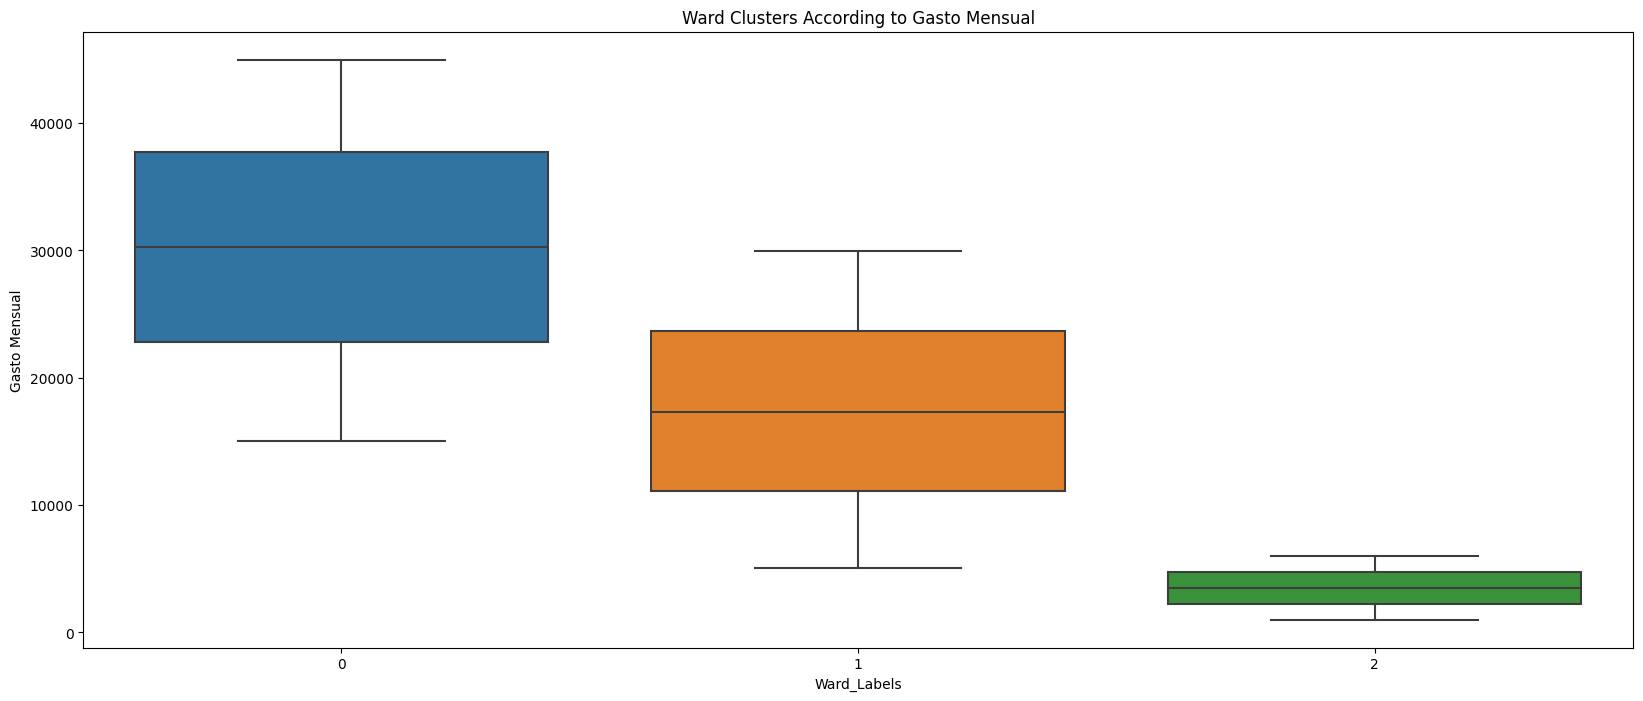

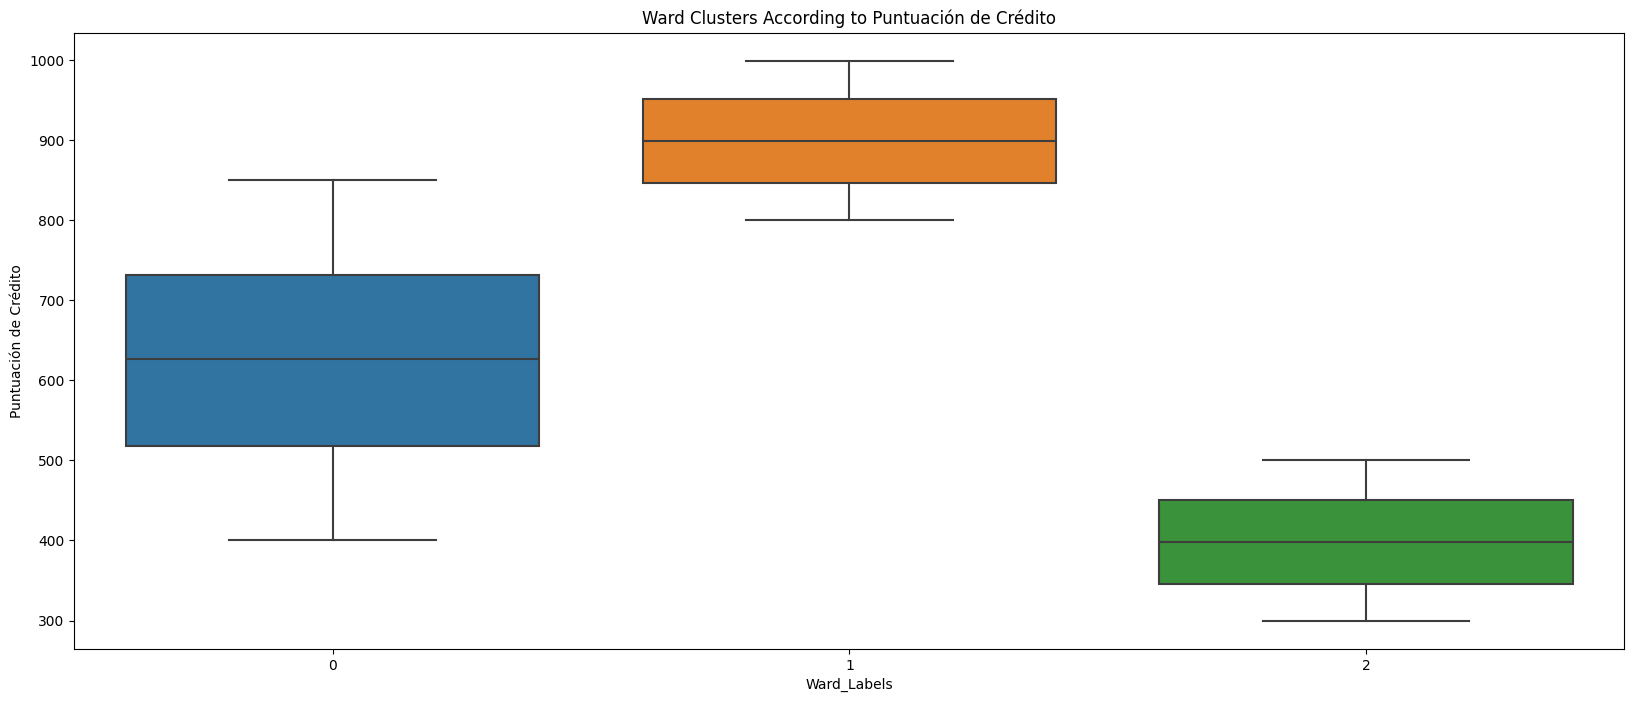

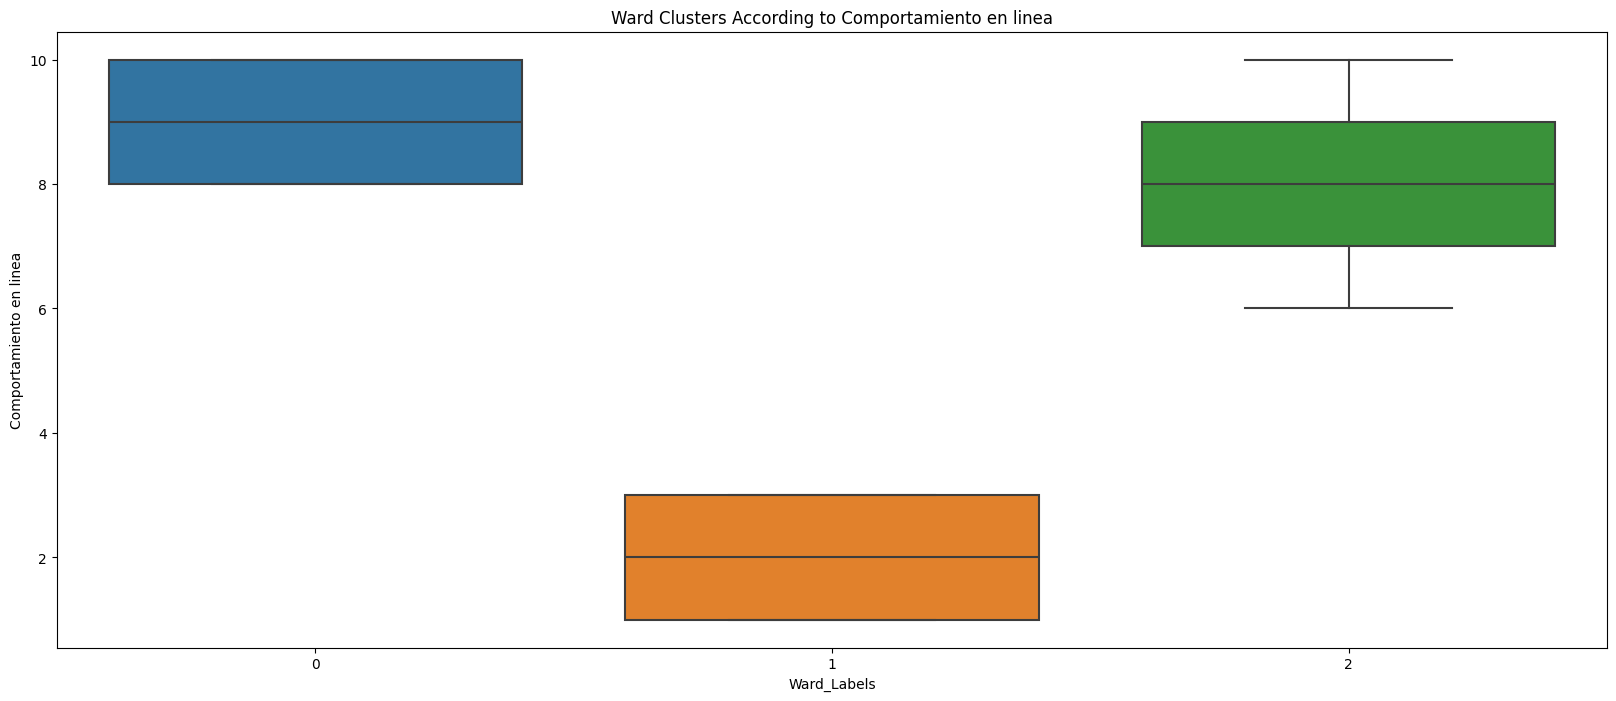

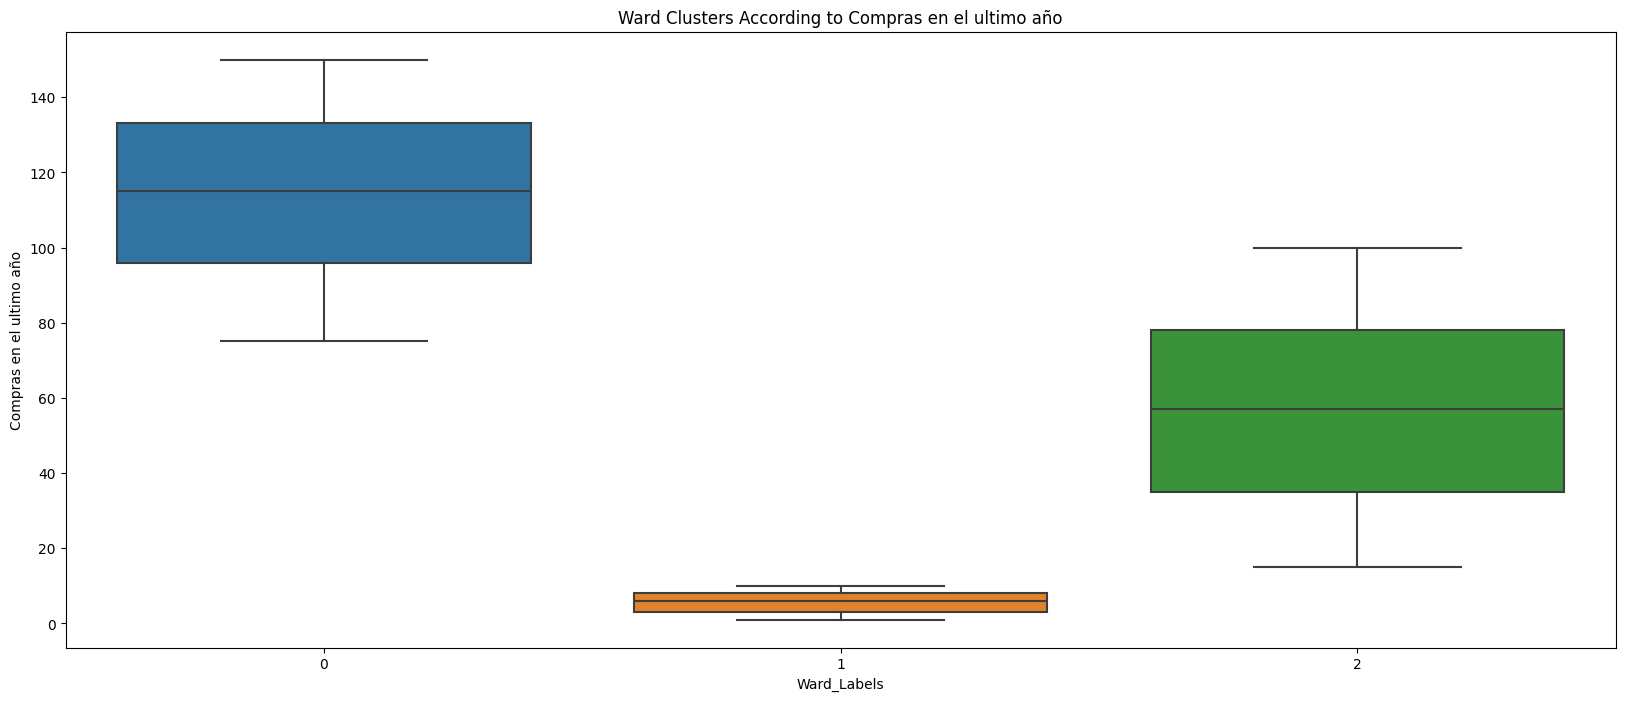

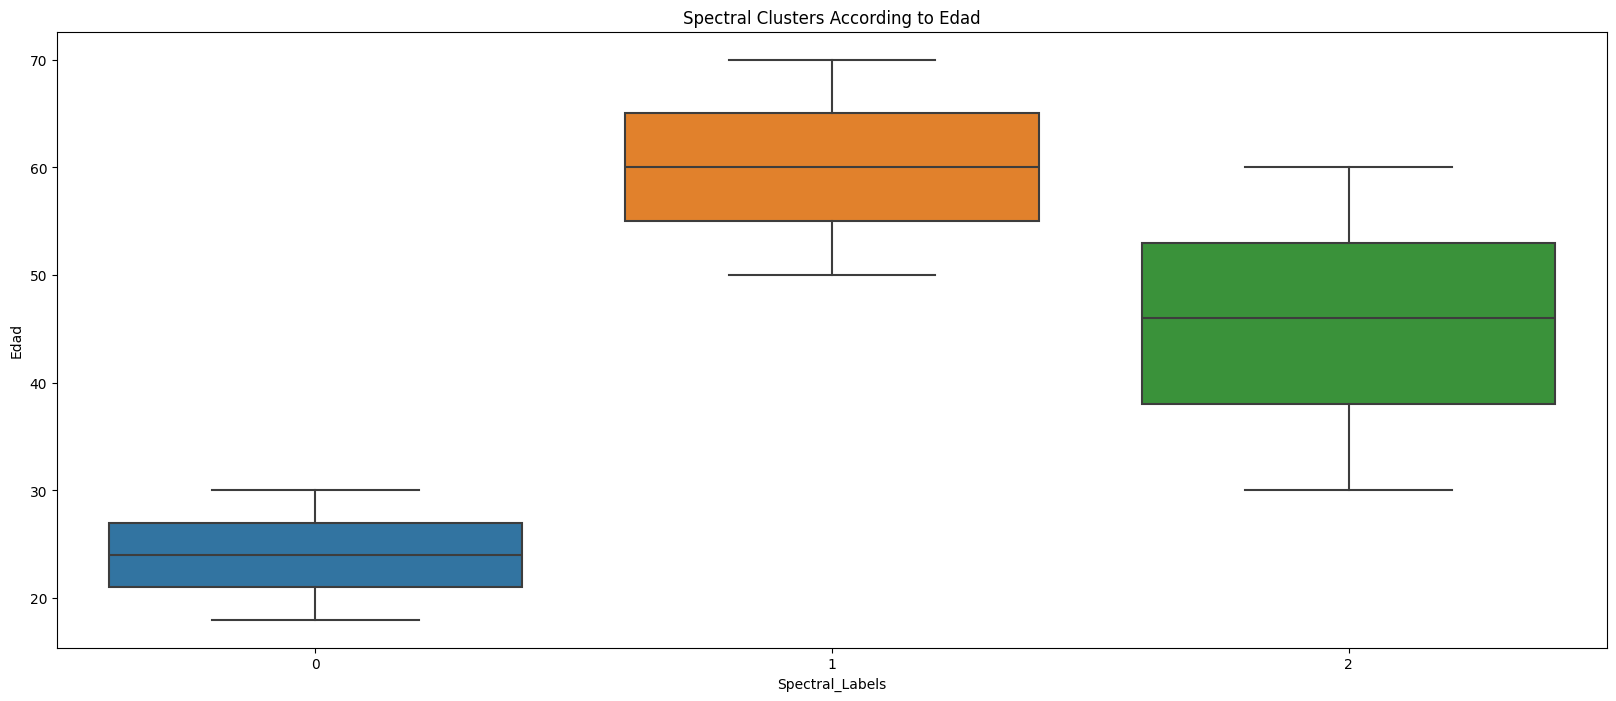

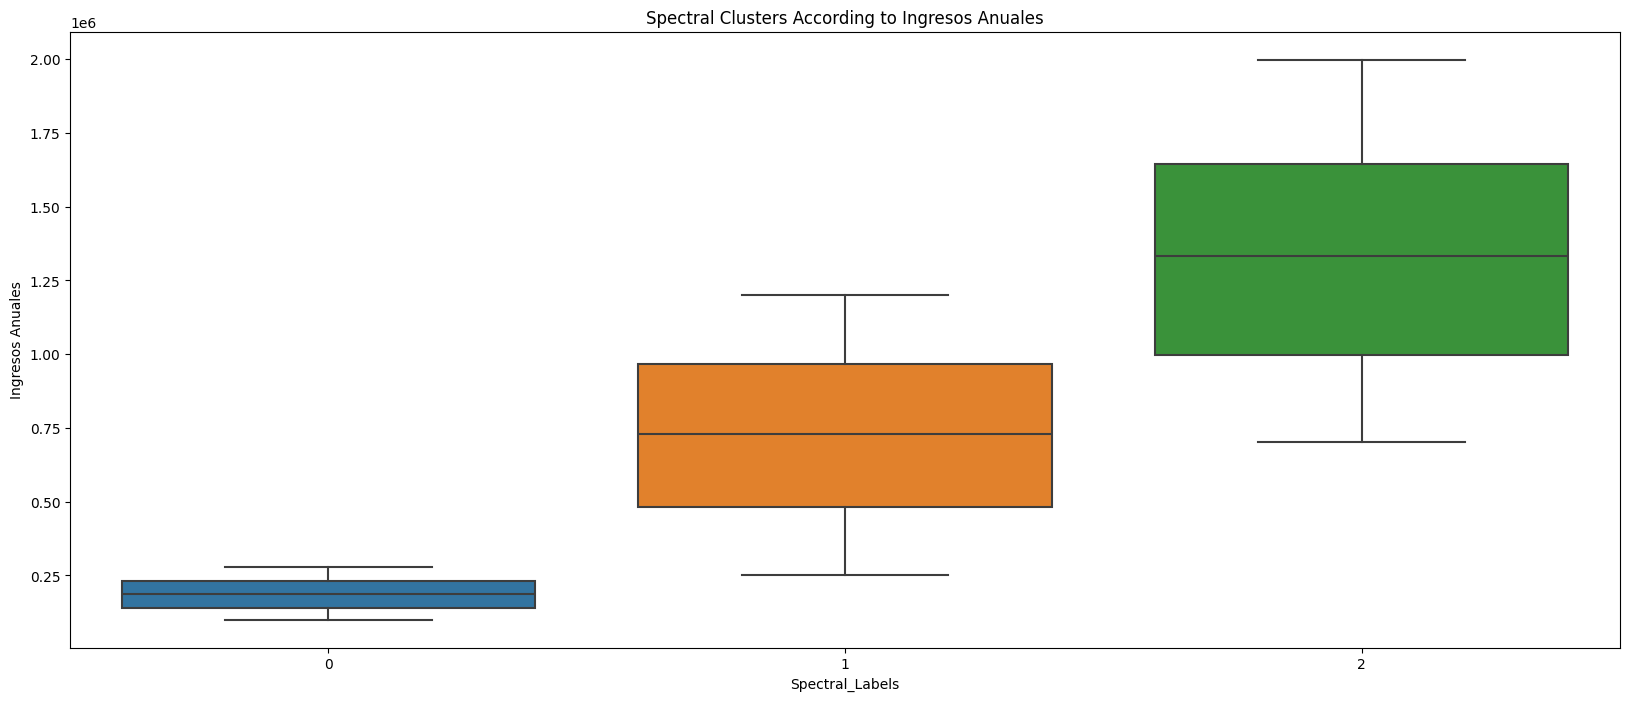

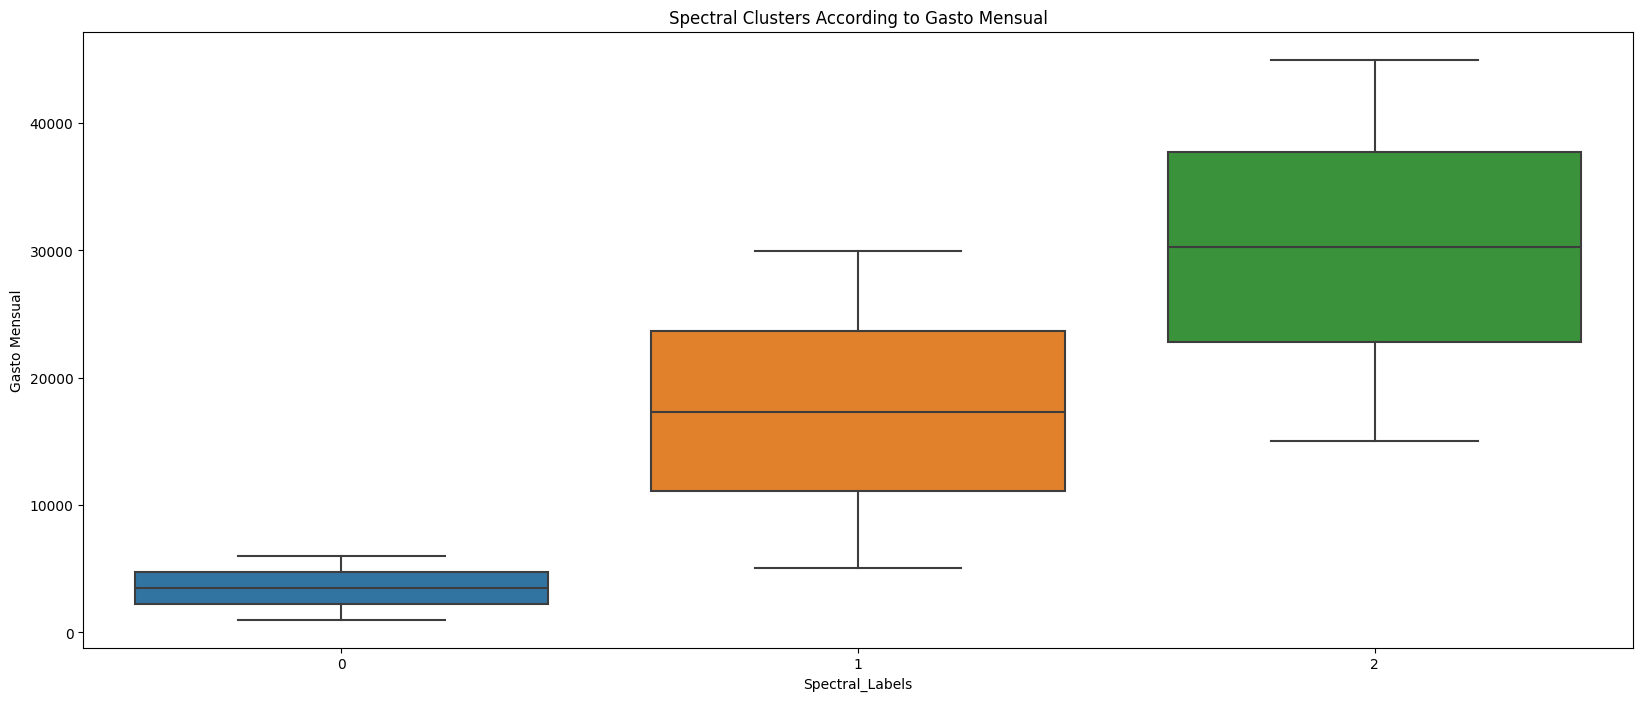

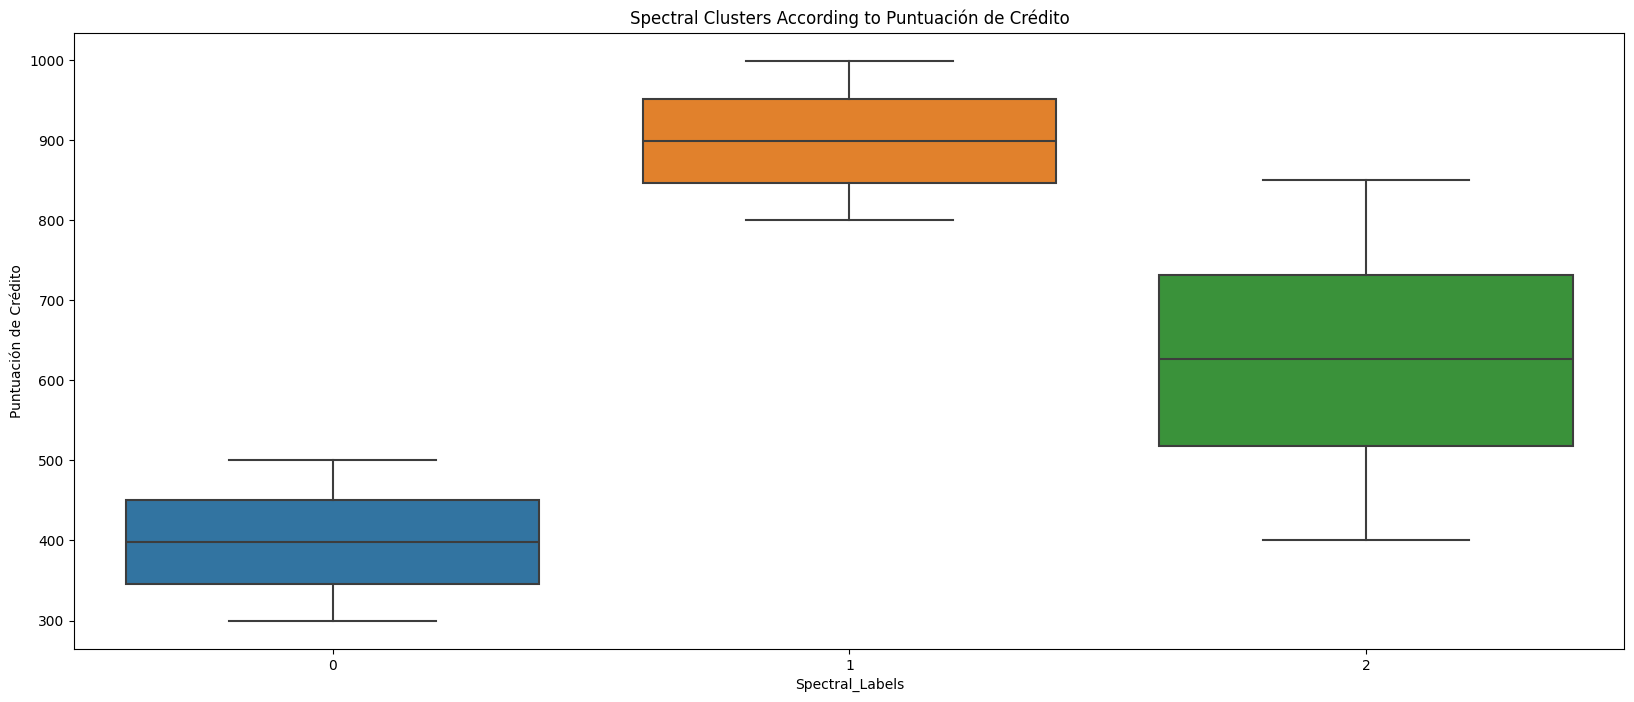

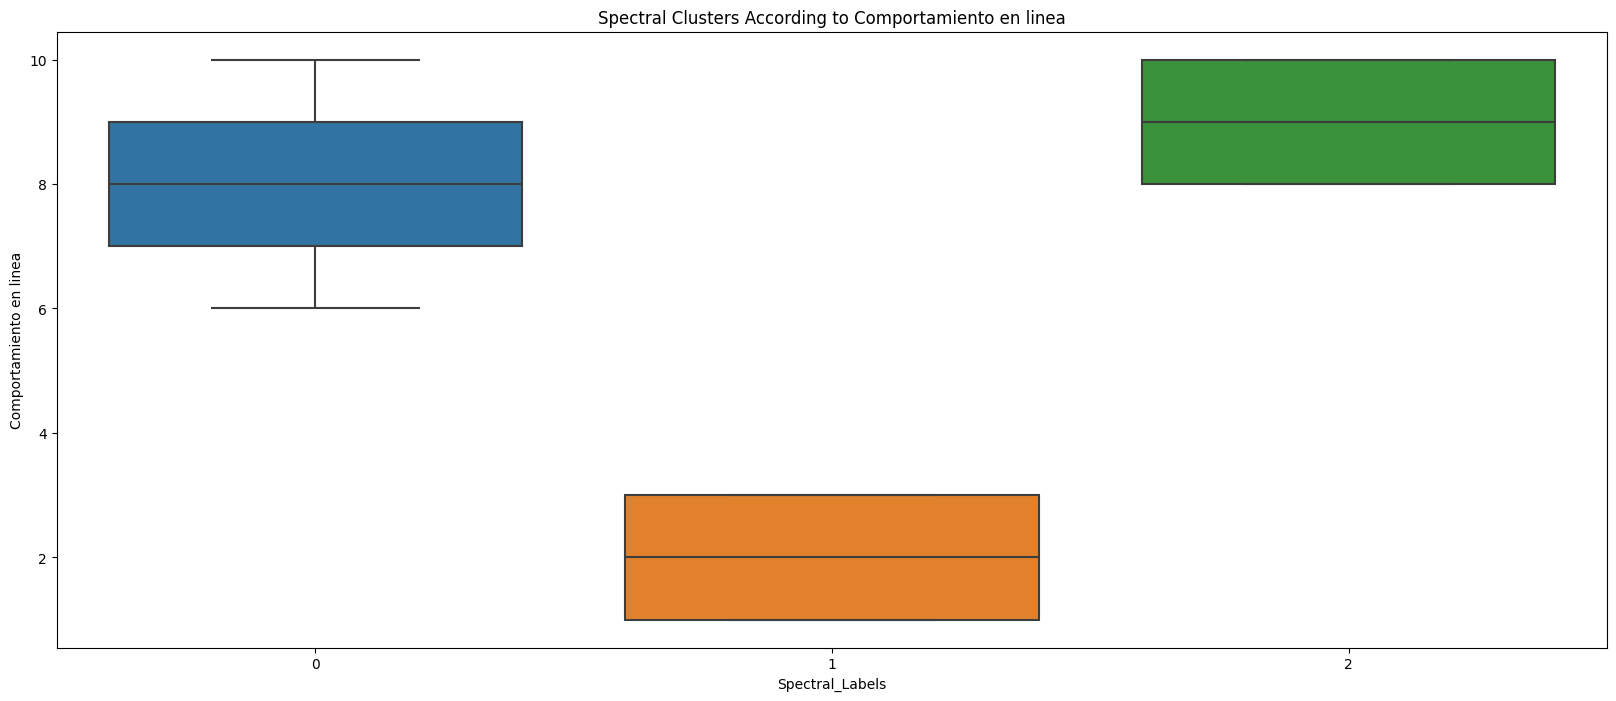

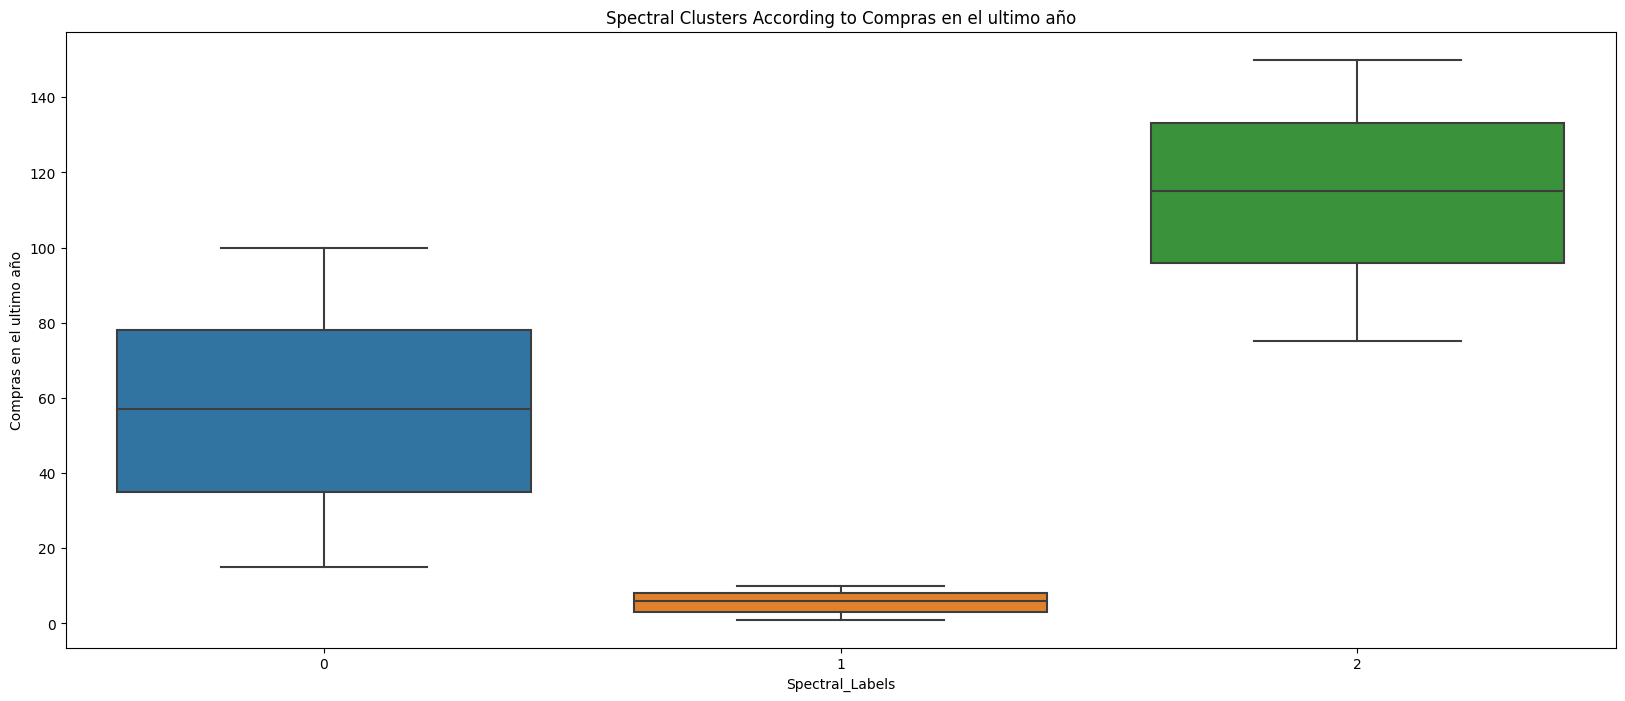

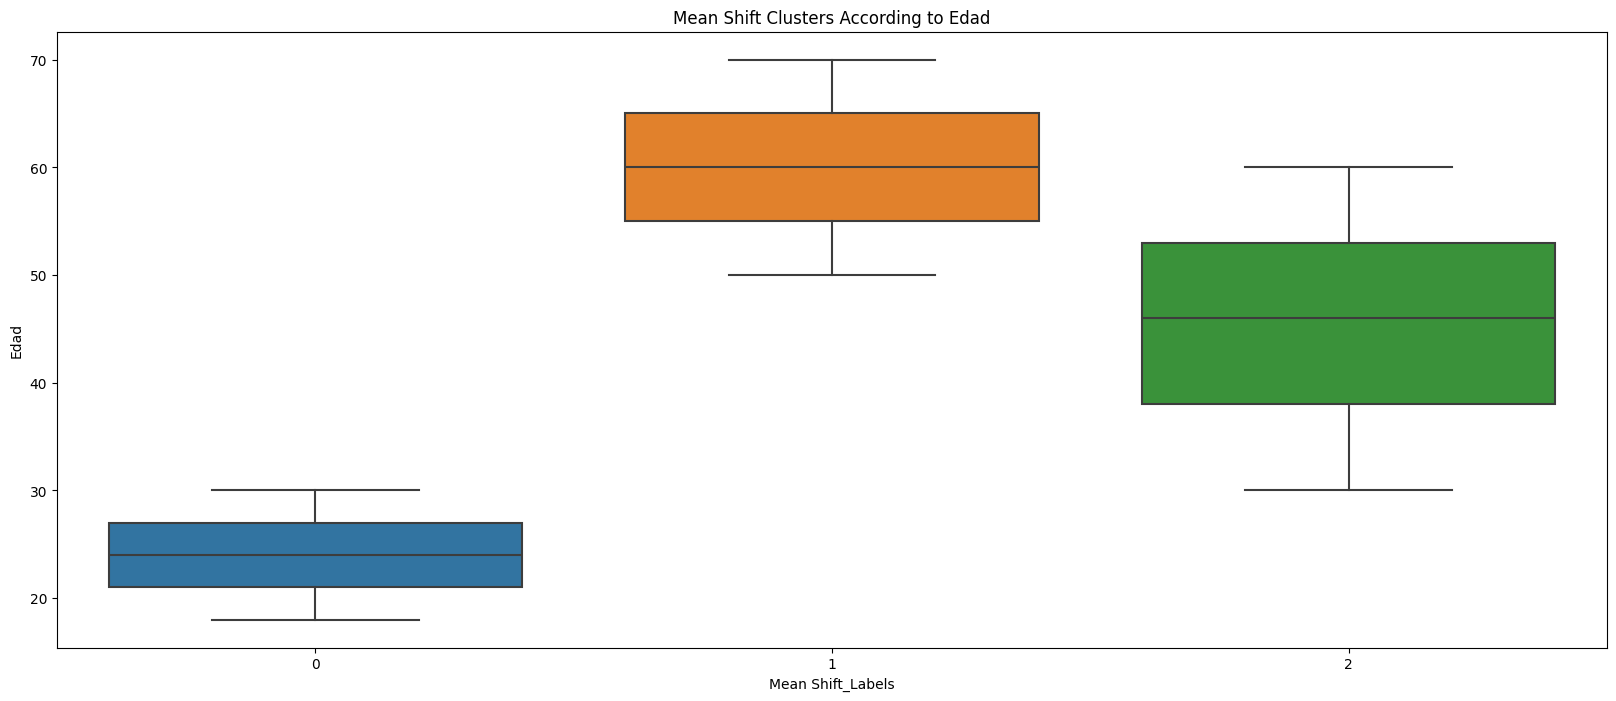

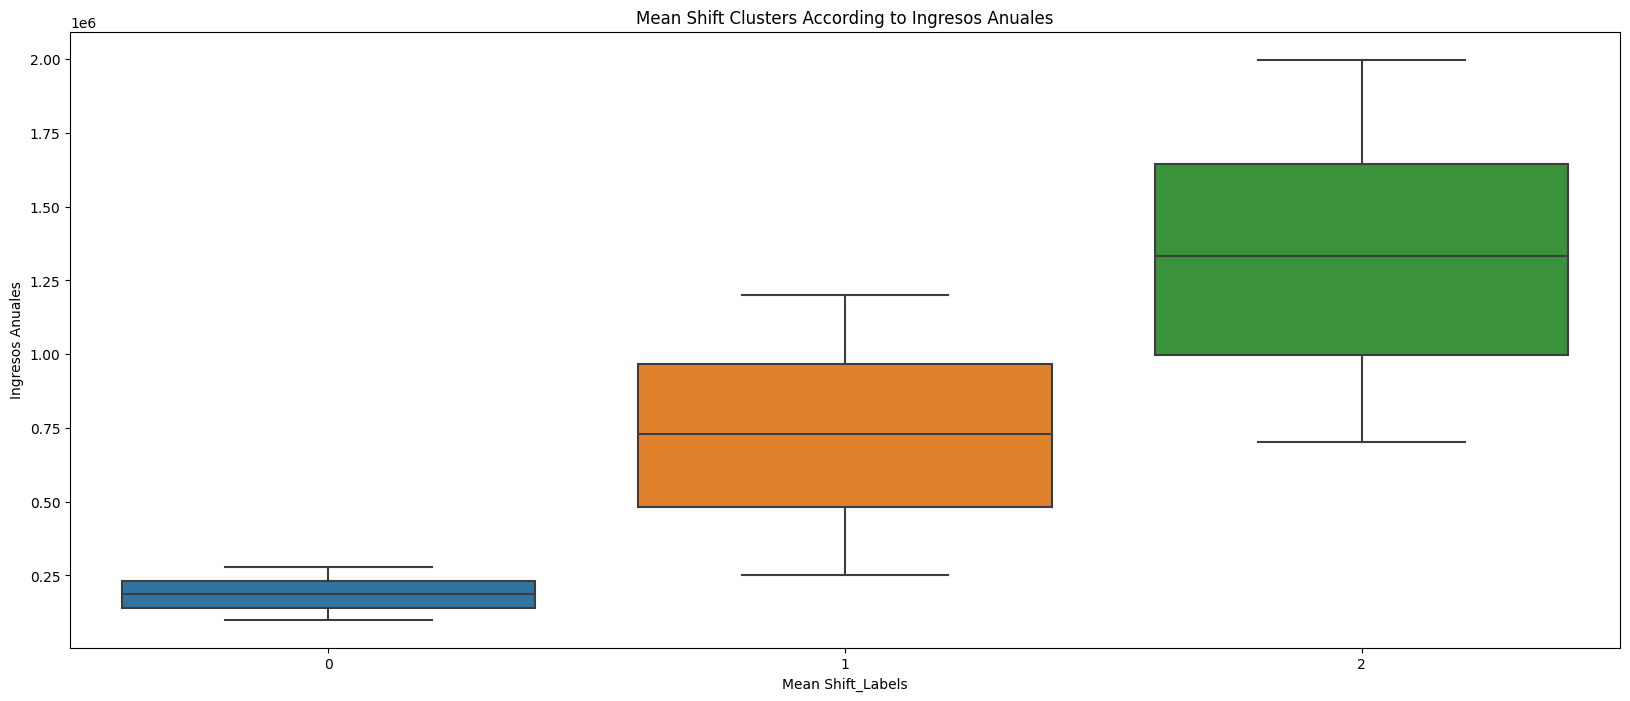

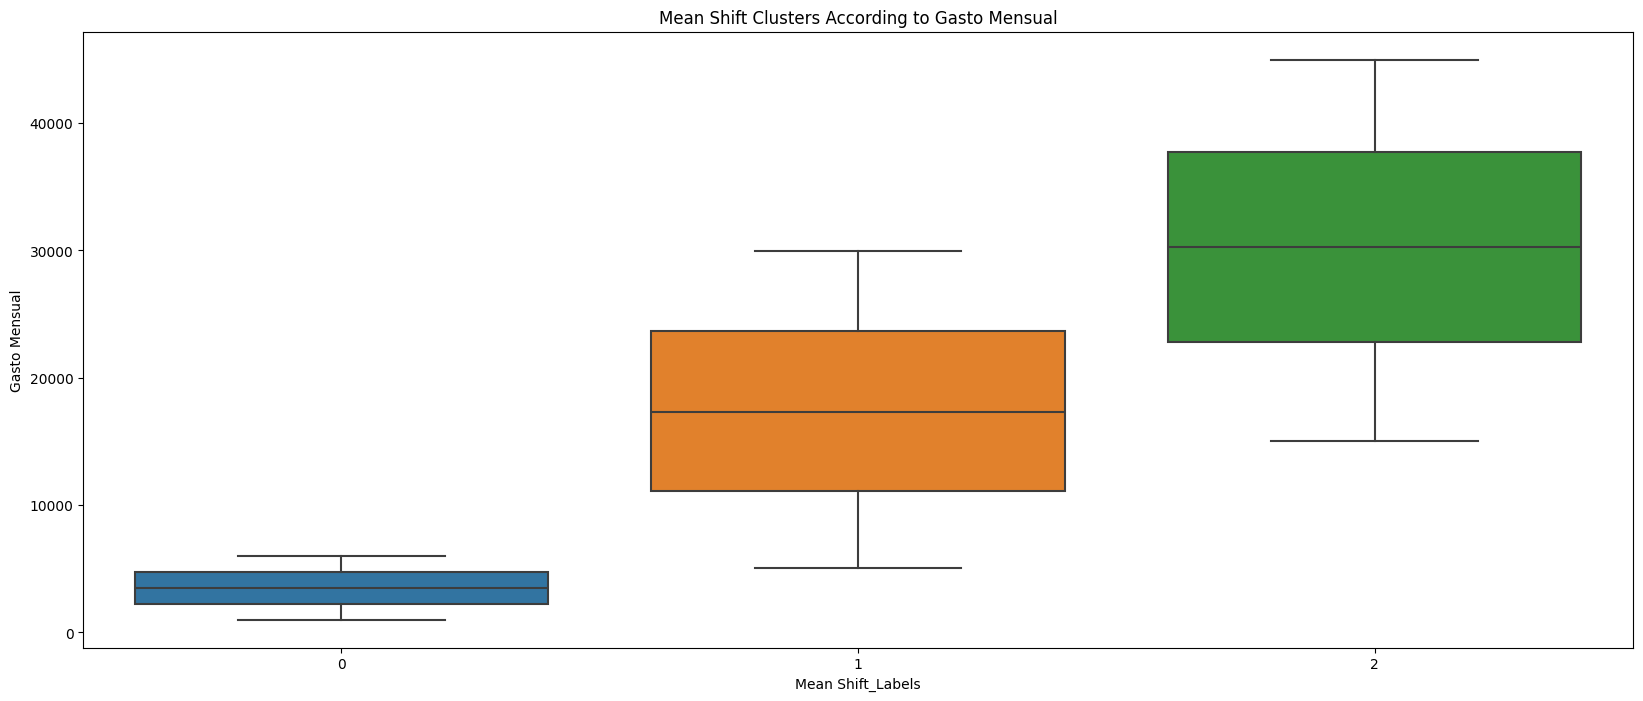

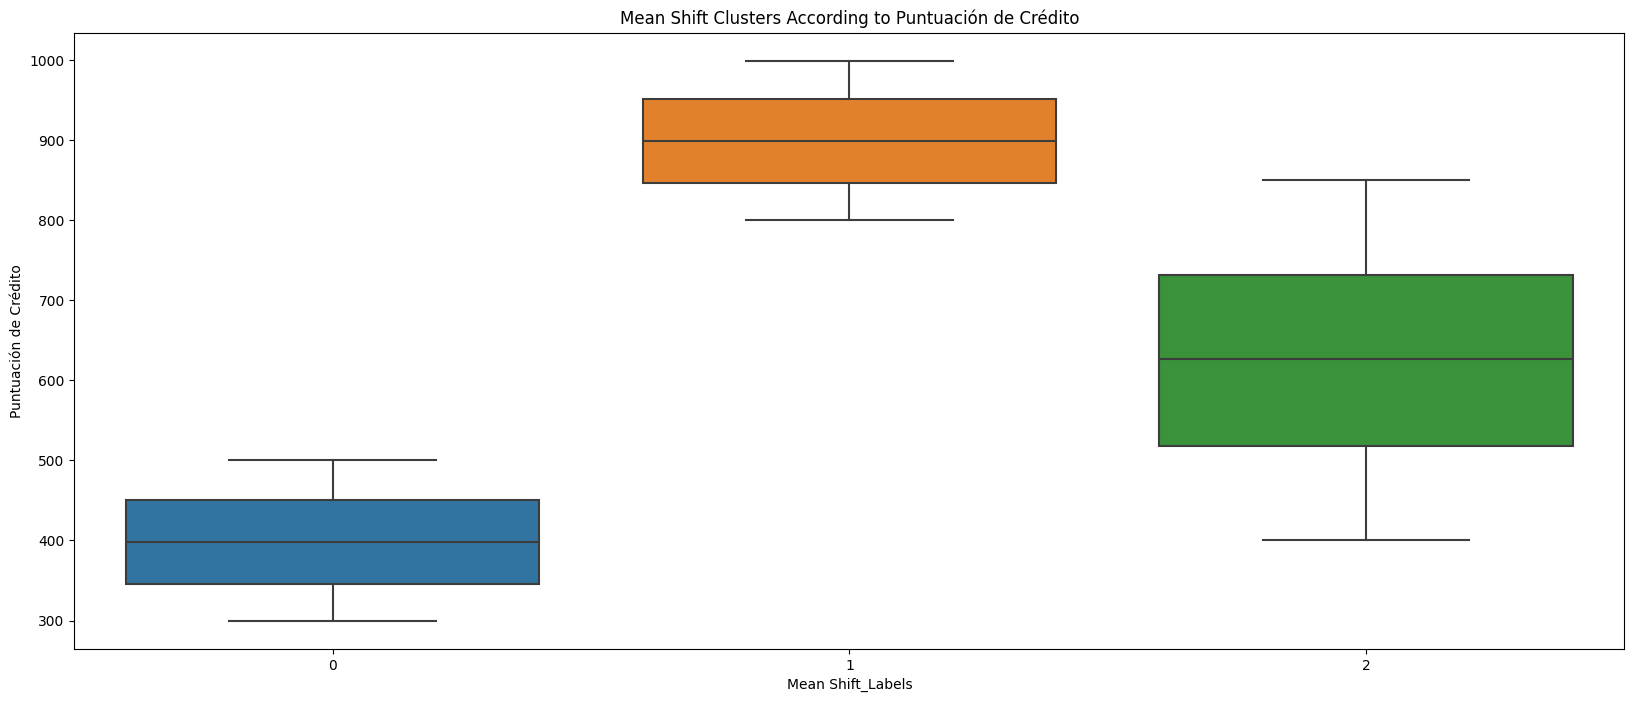

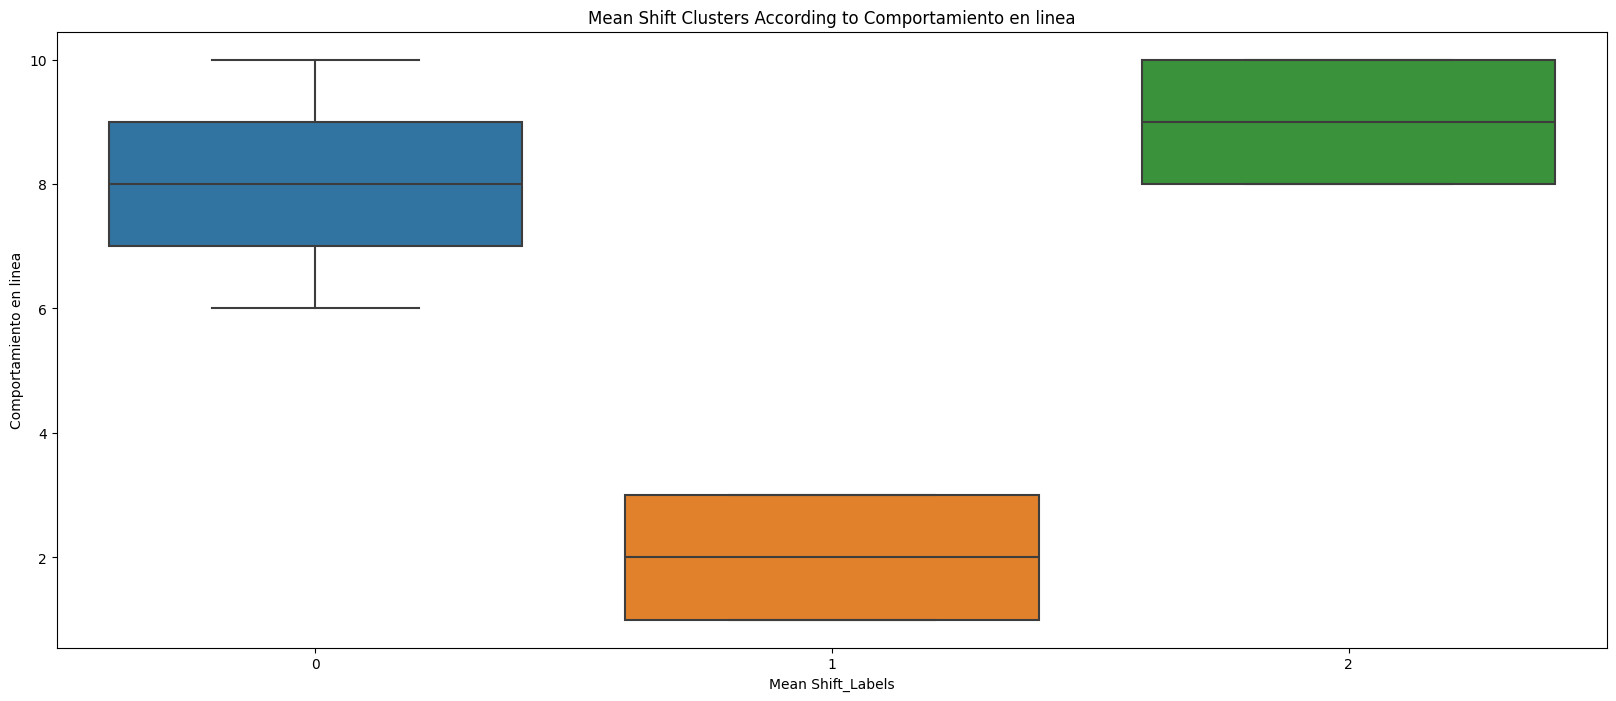

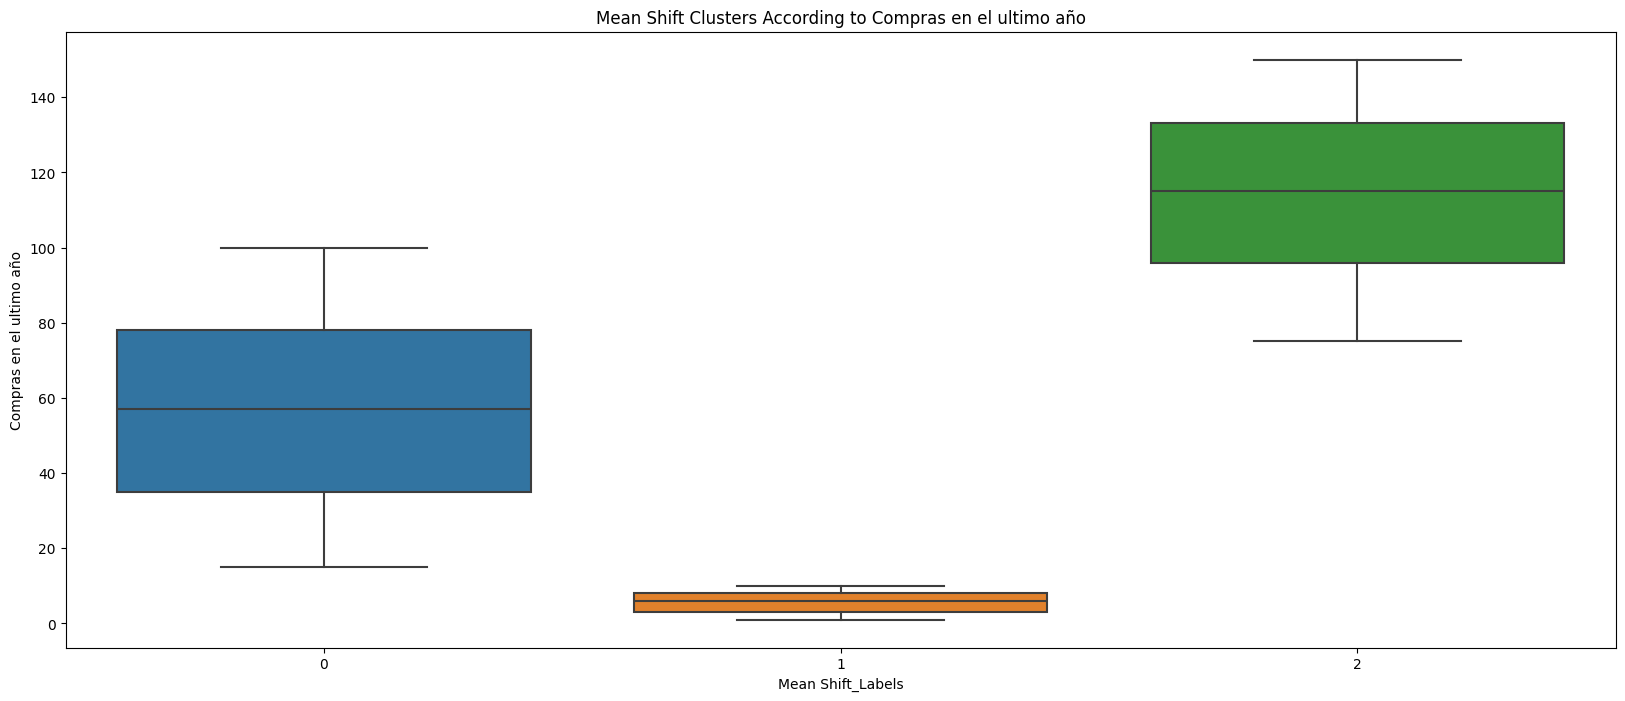

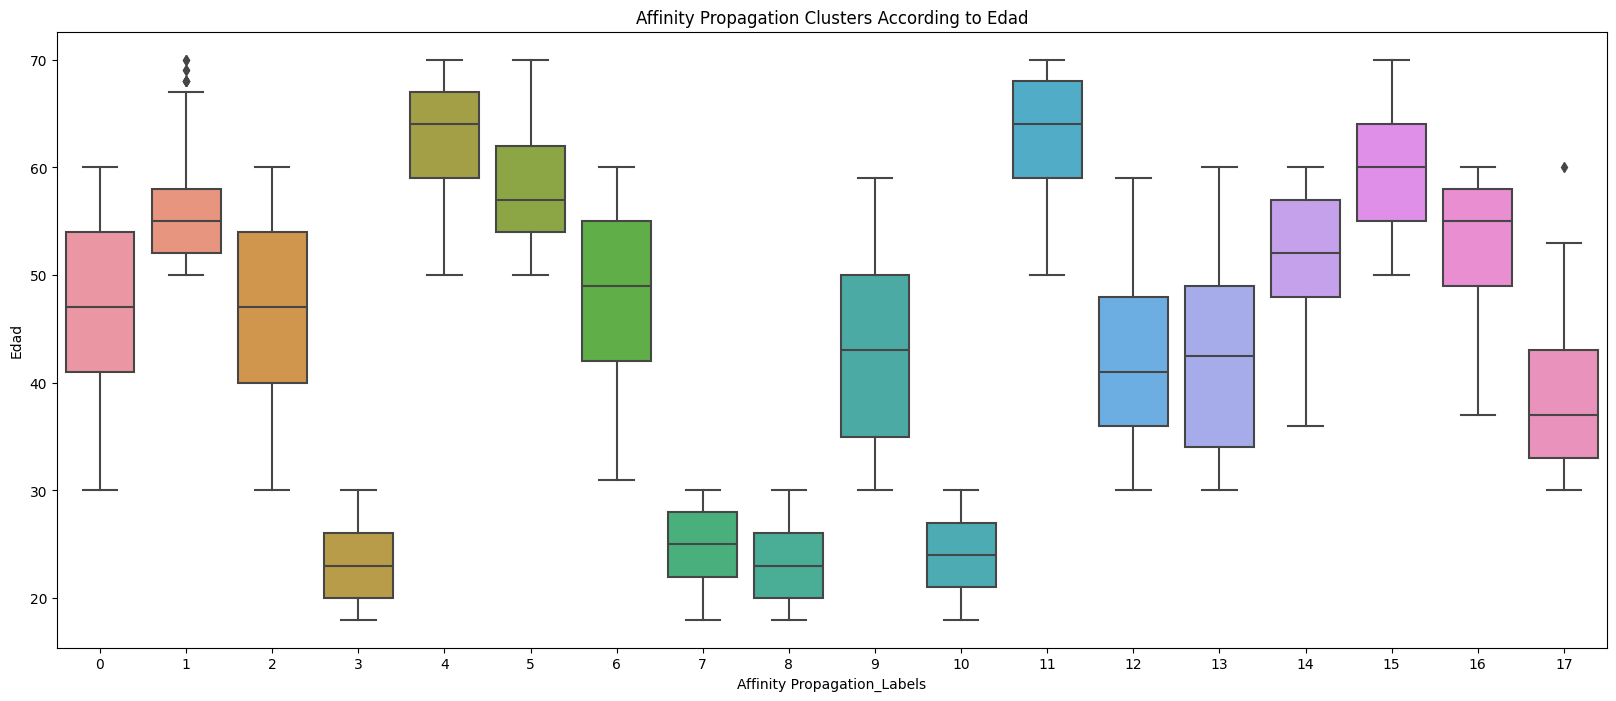

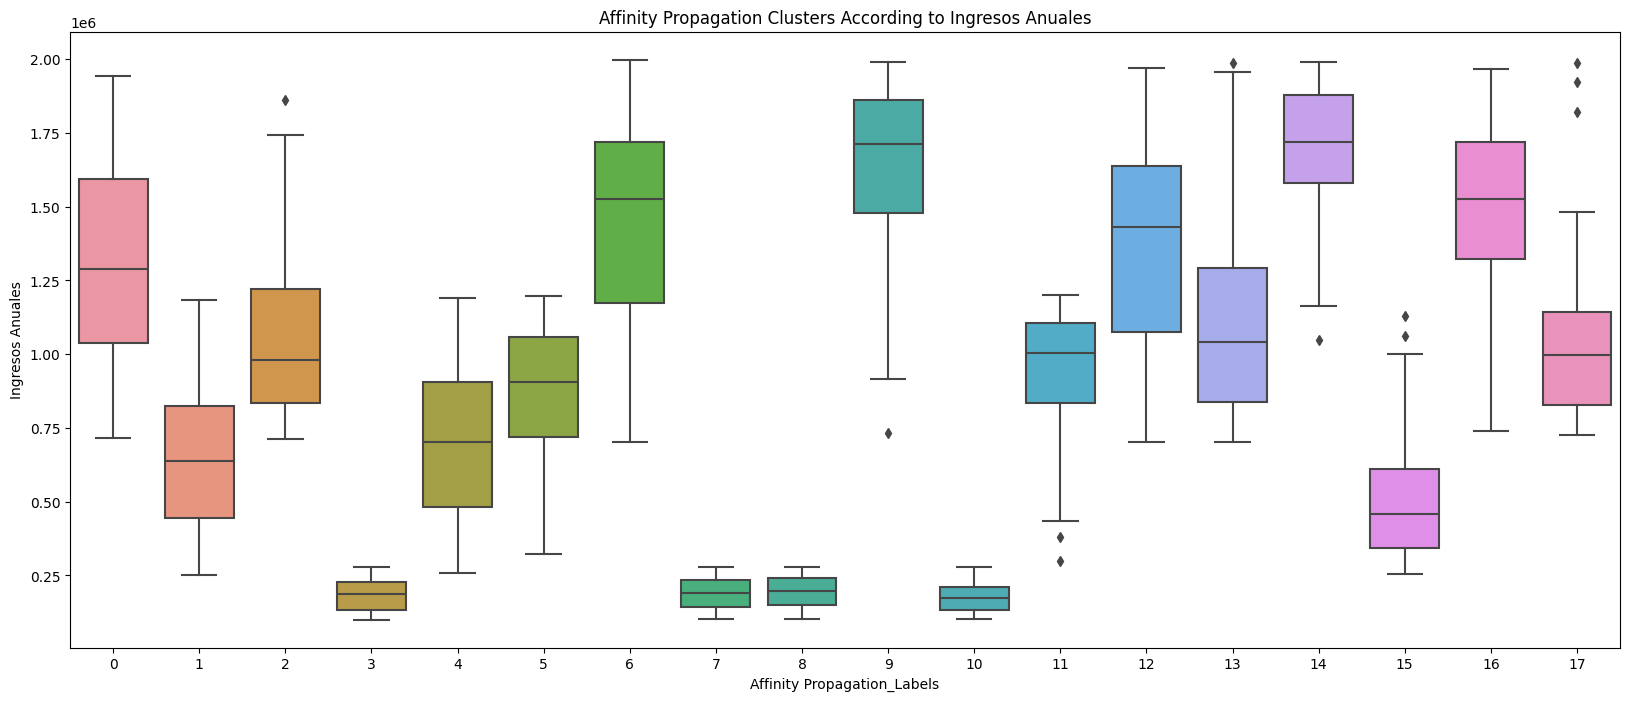

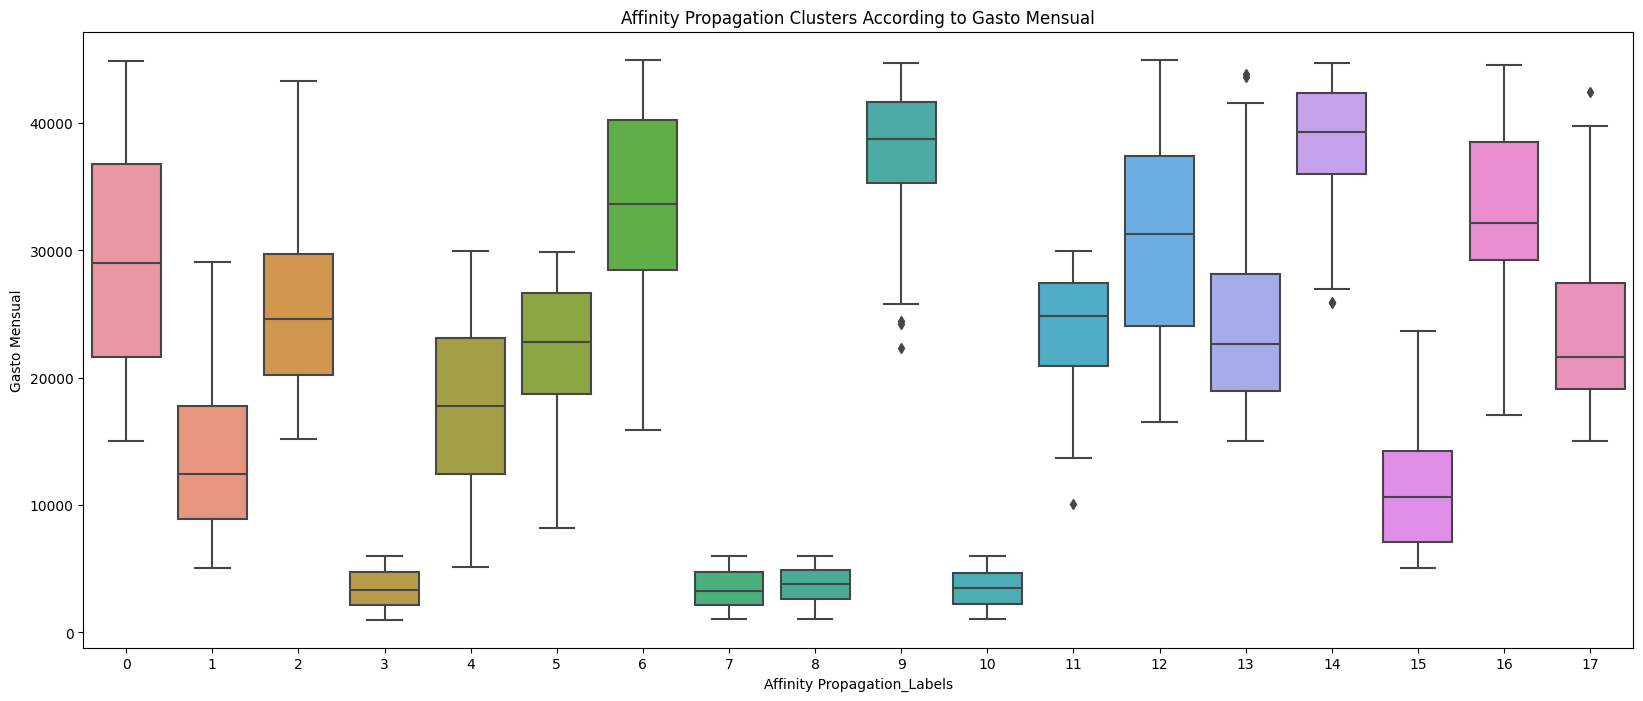

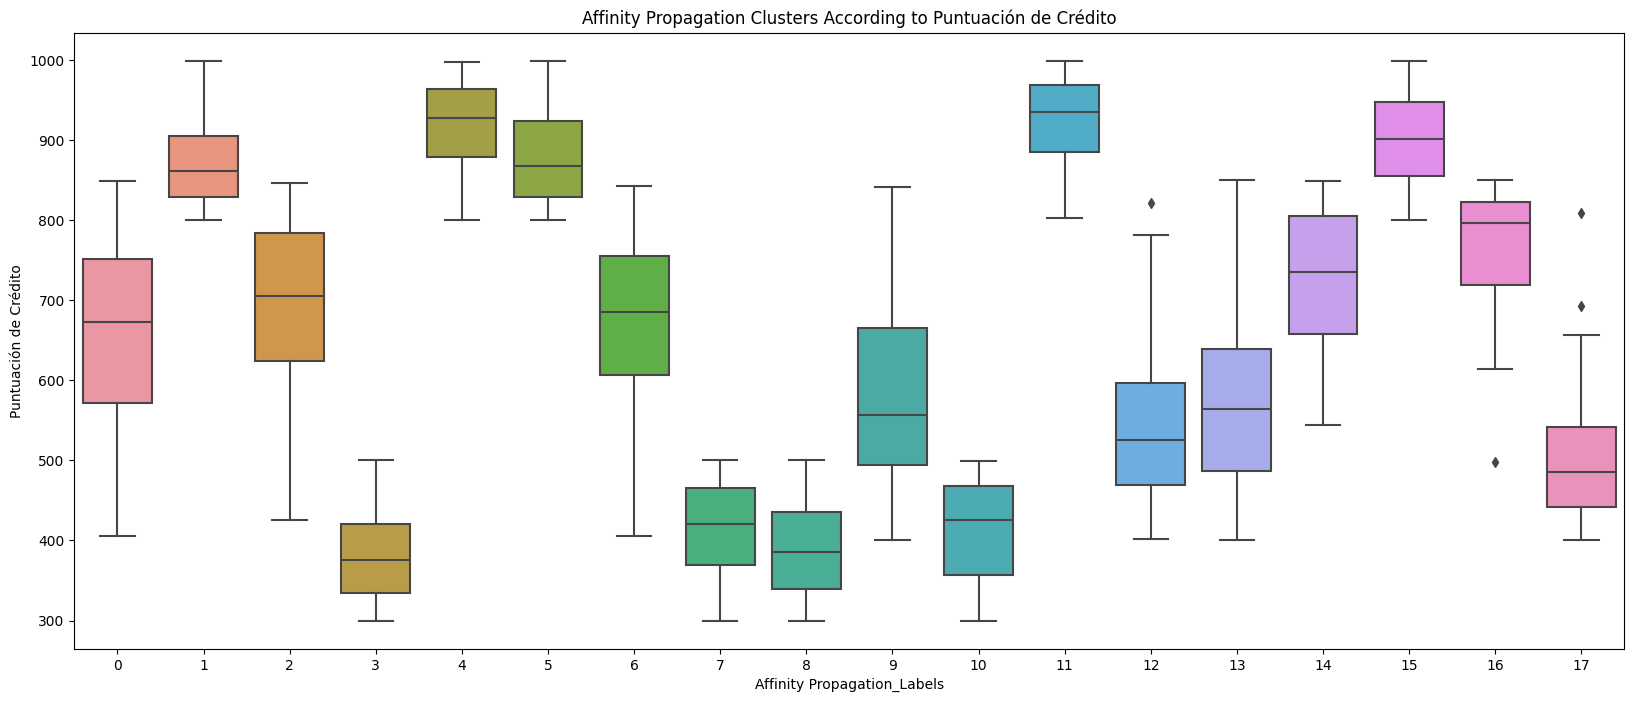

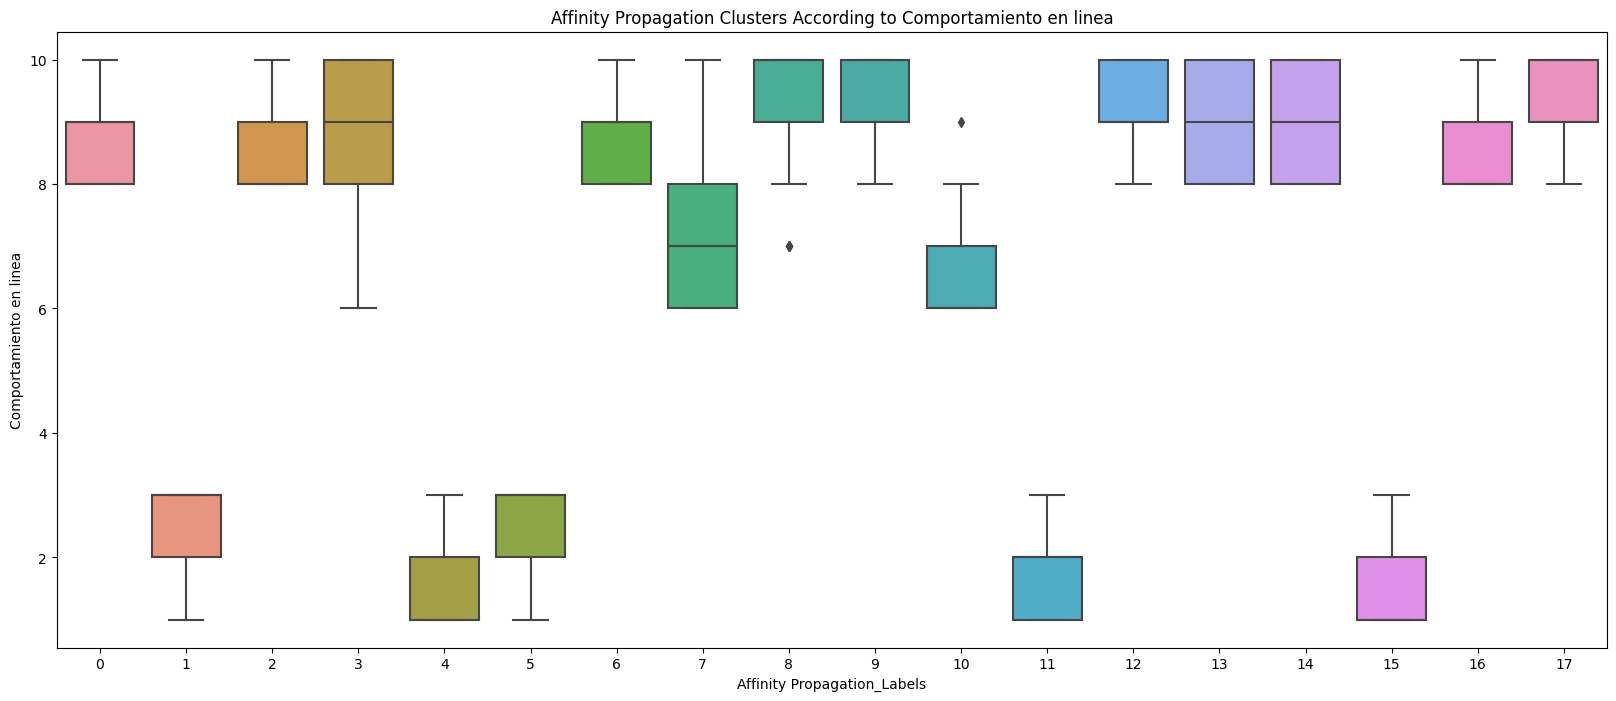

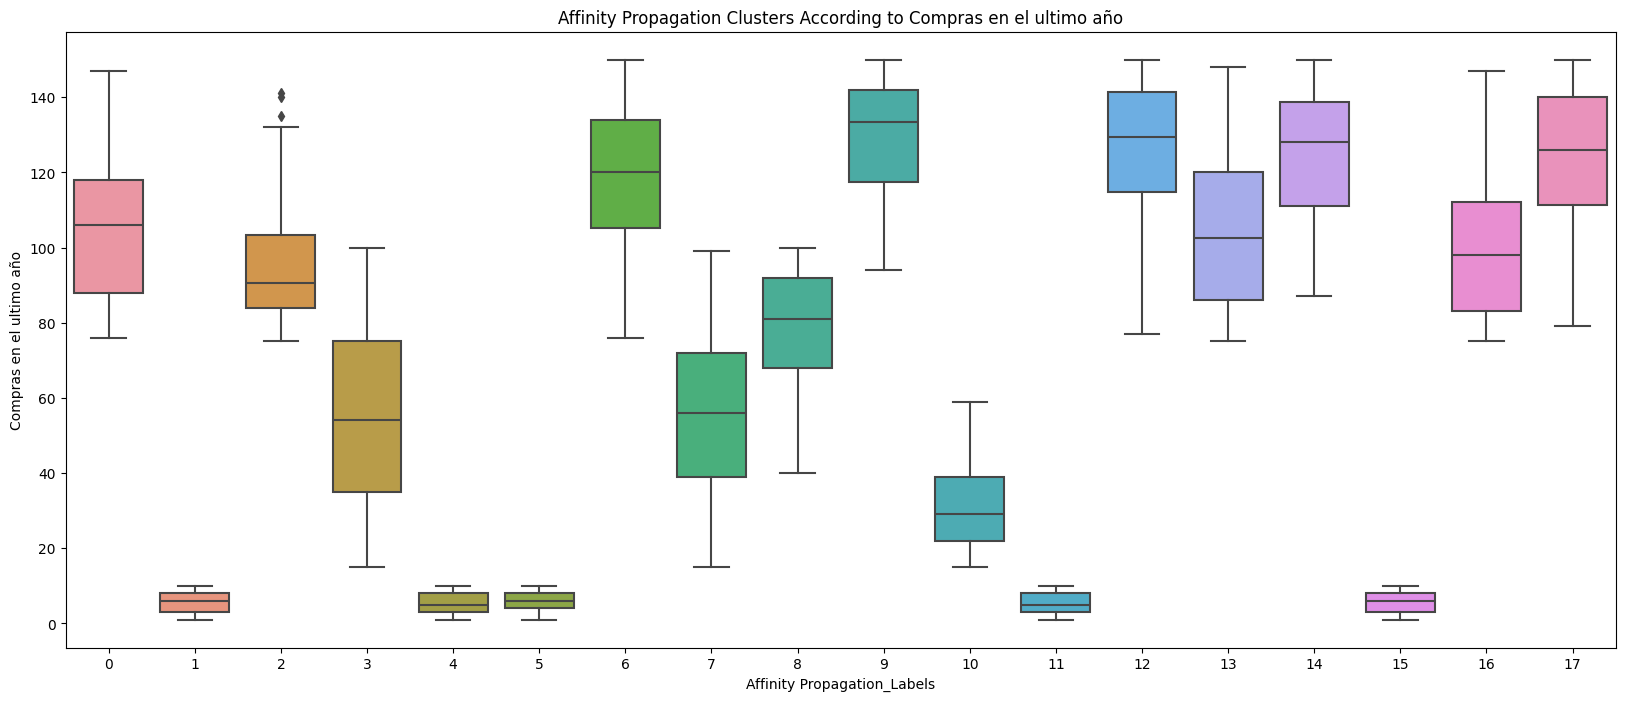

In [17]:
import seaborn as sns

# Asumiendo que 'X_reduced' y 'models' están definidos como en el código anterior
# y 'df' es tu DataFrame original sin normalizar

# Aplicar cada modelo de clustering y almacenar las etiquetas en el DataFrame original
for name, model in models:
    if name == 'Gaussian Mixture':
        model.fit(X_reduced)
        labels = model.predict(X_reduced)
    else:
        labels = model.fit_predict(X_reduced)
    
    # Almacenar las etiquetas de cluster en el DataFrame para cada modelo
    df[name + '_Labels'] = labels

# Para cada modelo de clustering
for name, _ in models:
    # Para cada característica numérica
    for feature in numeric_columns_no_id:
        fig = plt.figure(figsize=(20, 8))
        
        # Crear el boxplot para la característica actual y las etiquetas del modelo actual
        ax = sns.boxplot(x=name + '_Labels', y=feature, data=df)
        ax.set_title(f'{name} Clusters According to {feature}')
        
        plt.show()


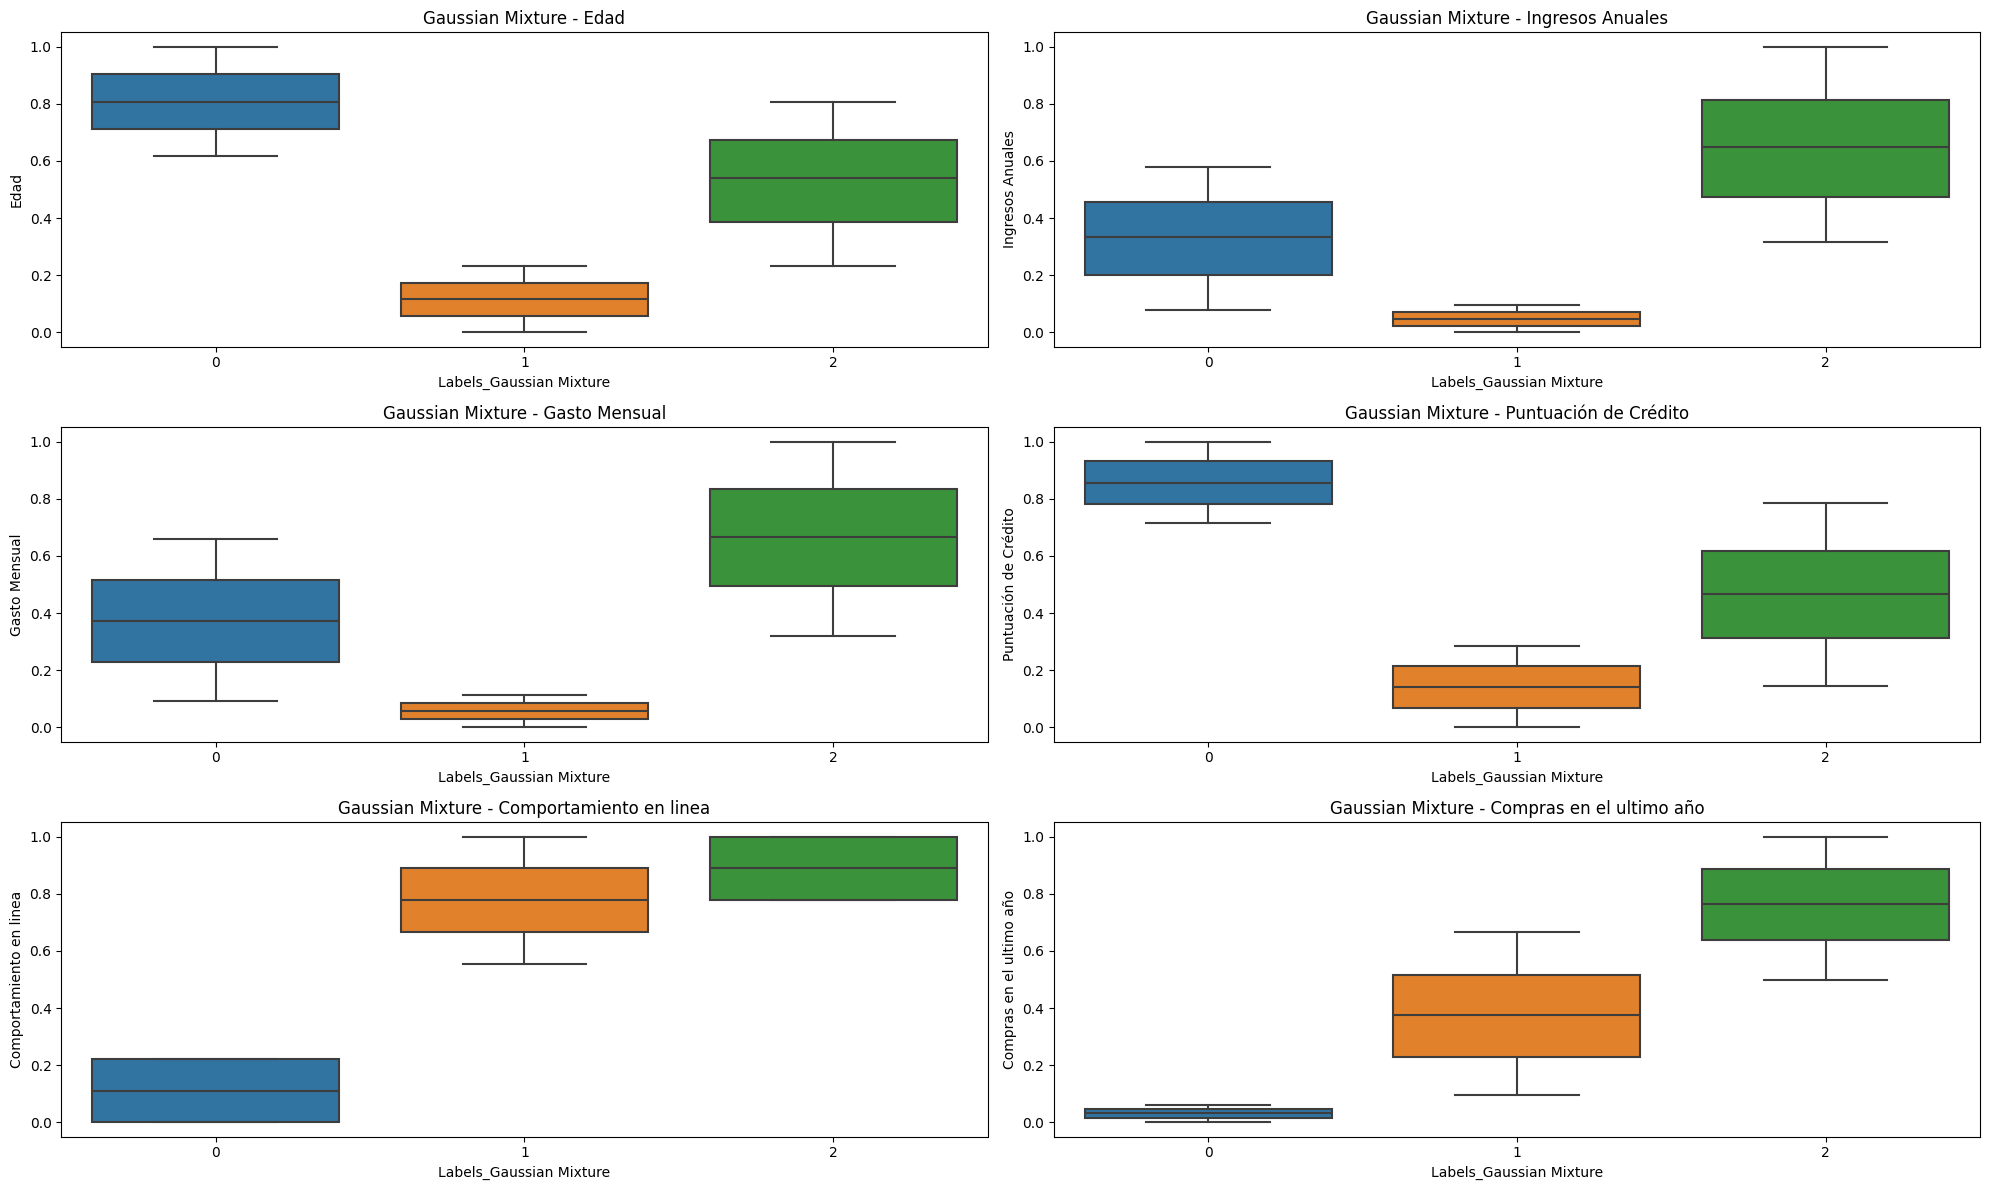

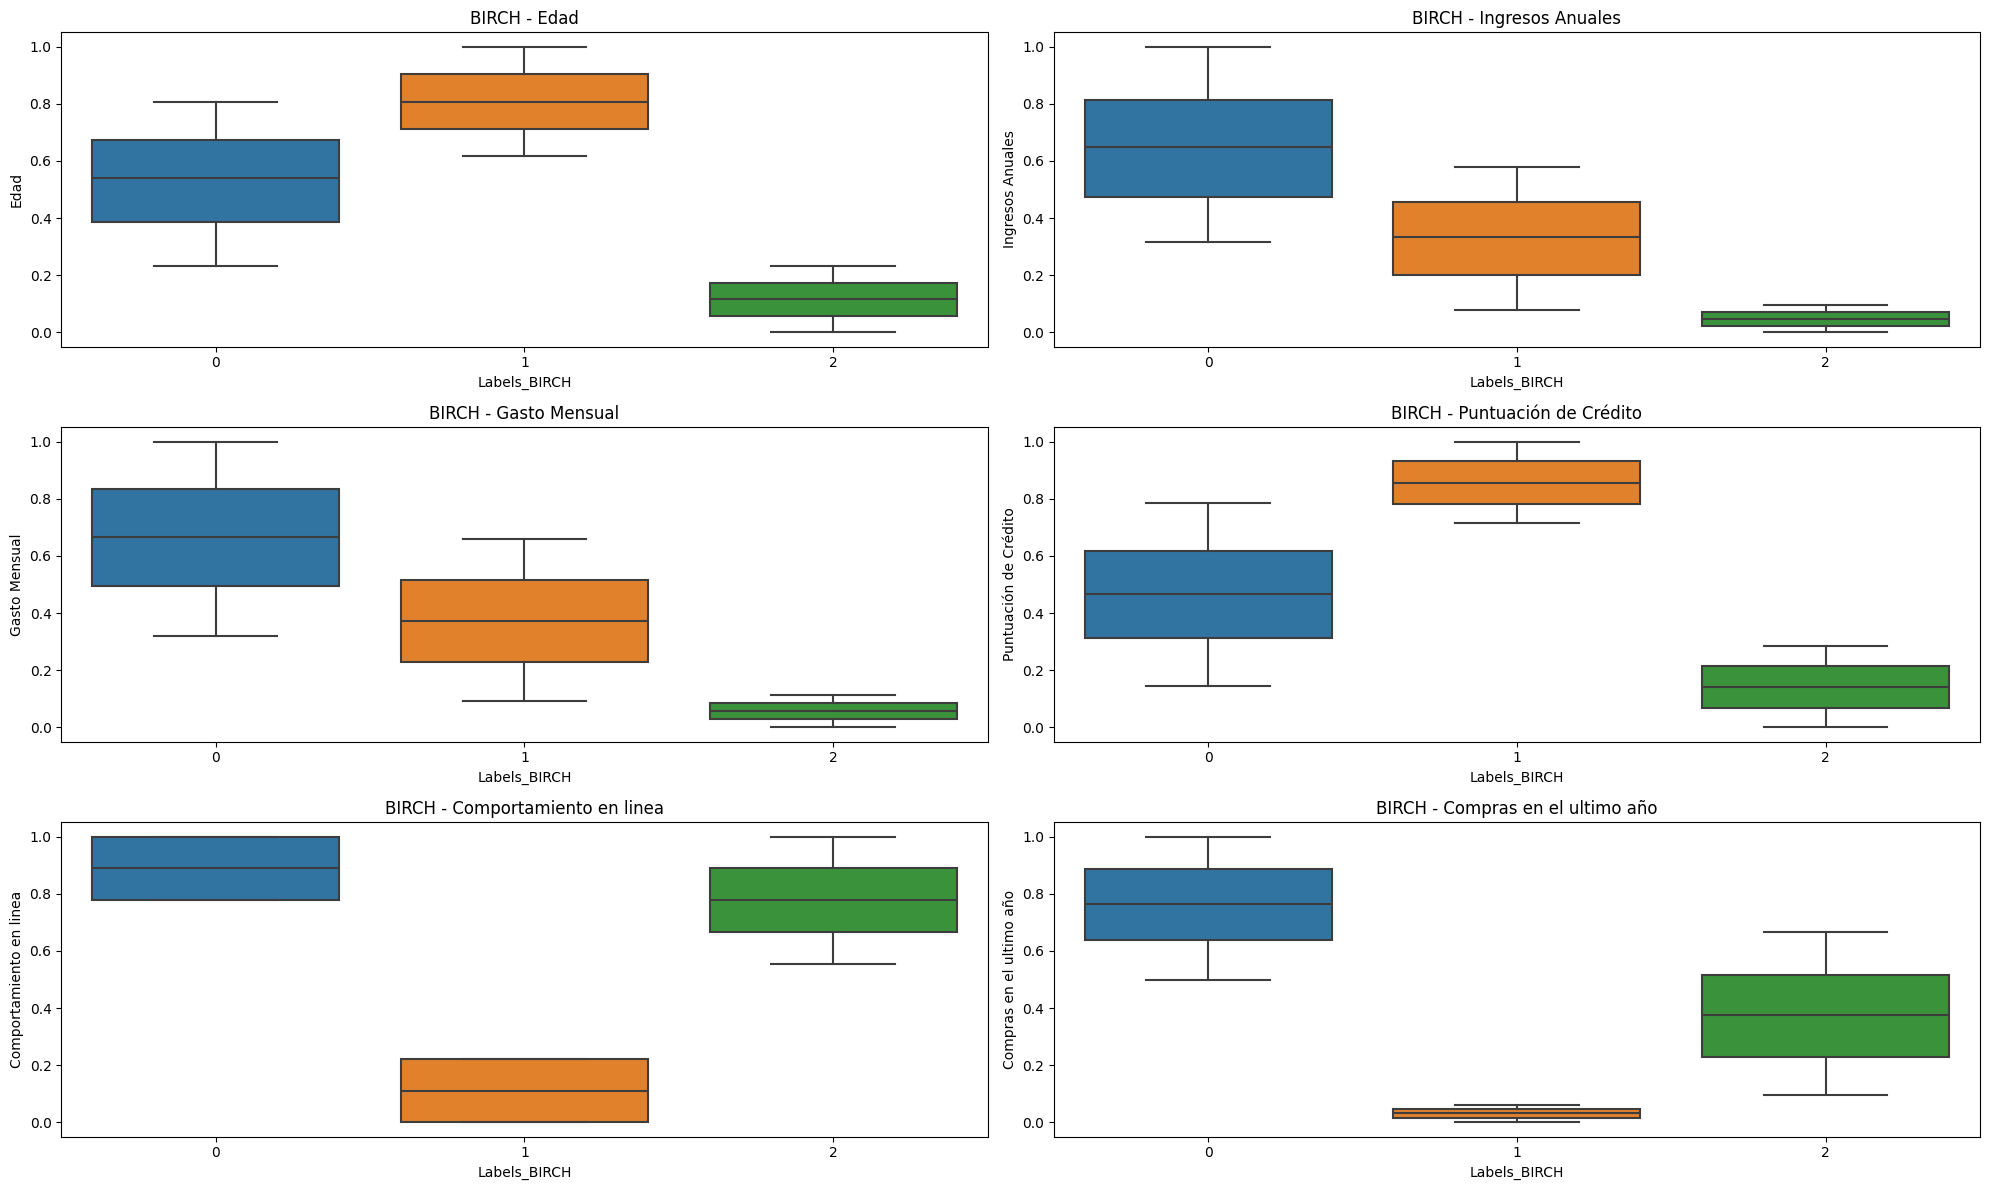

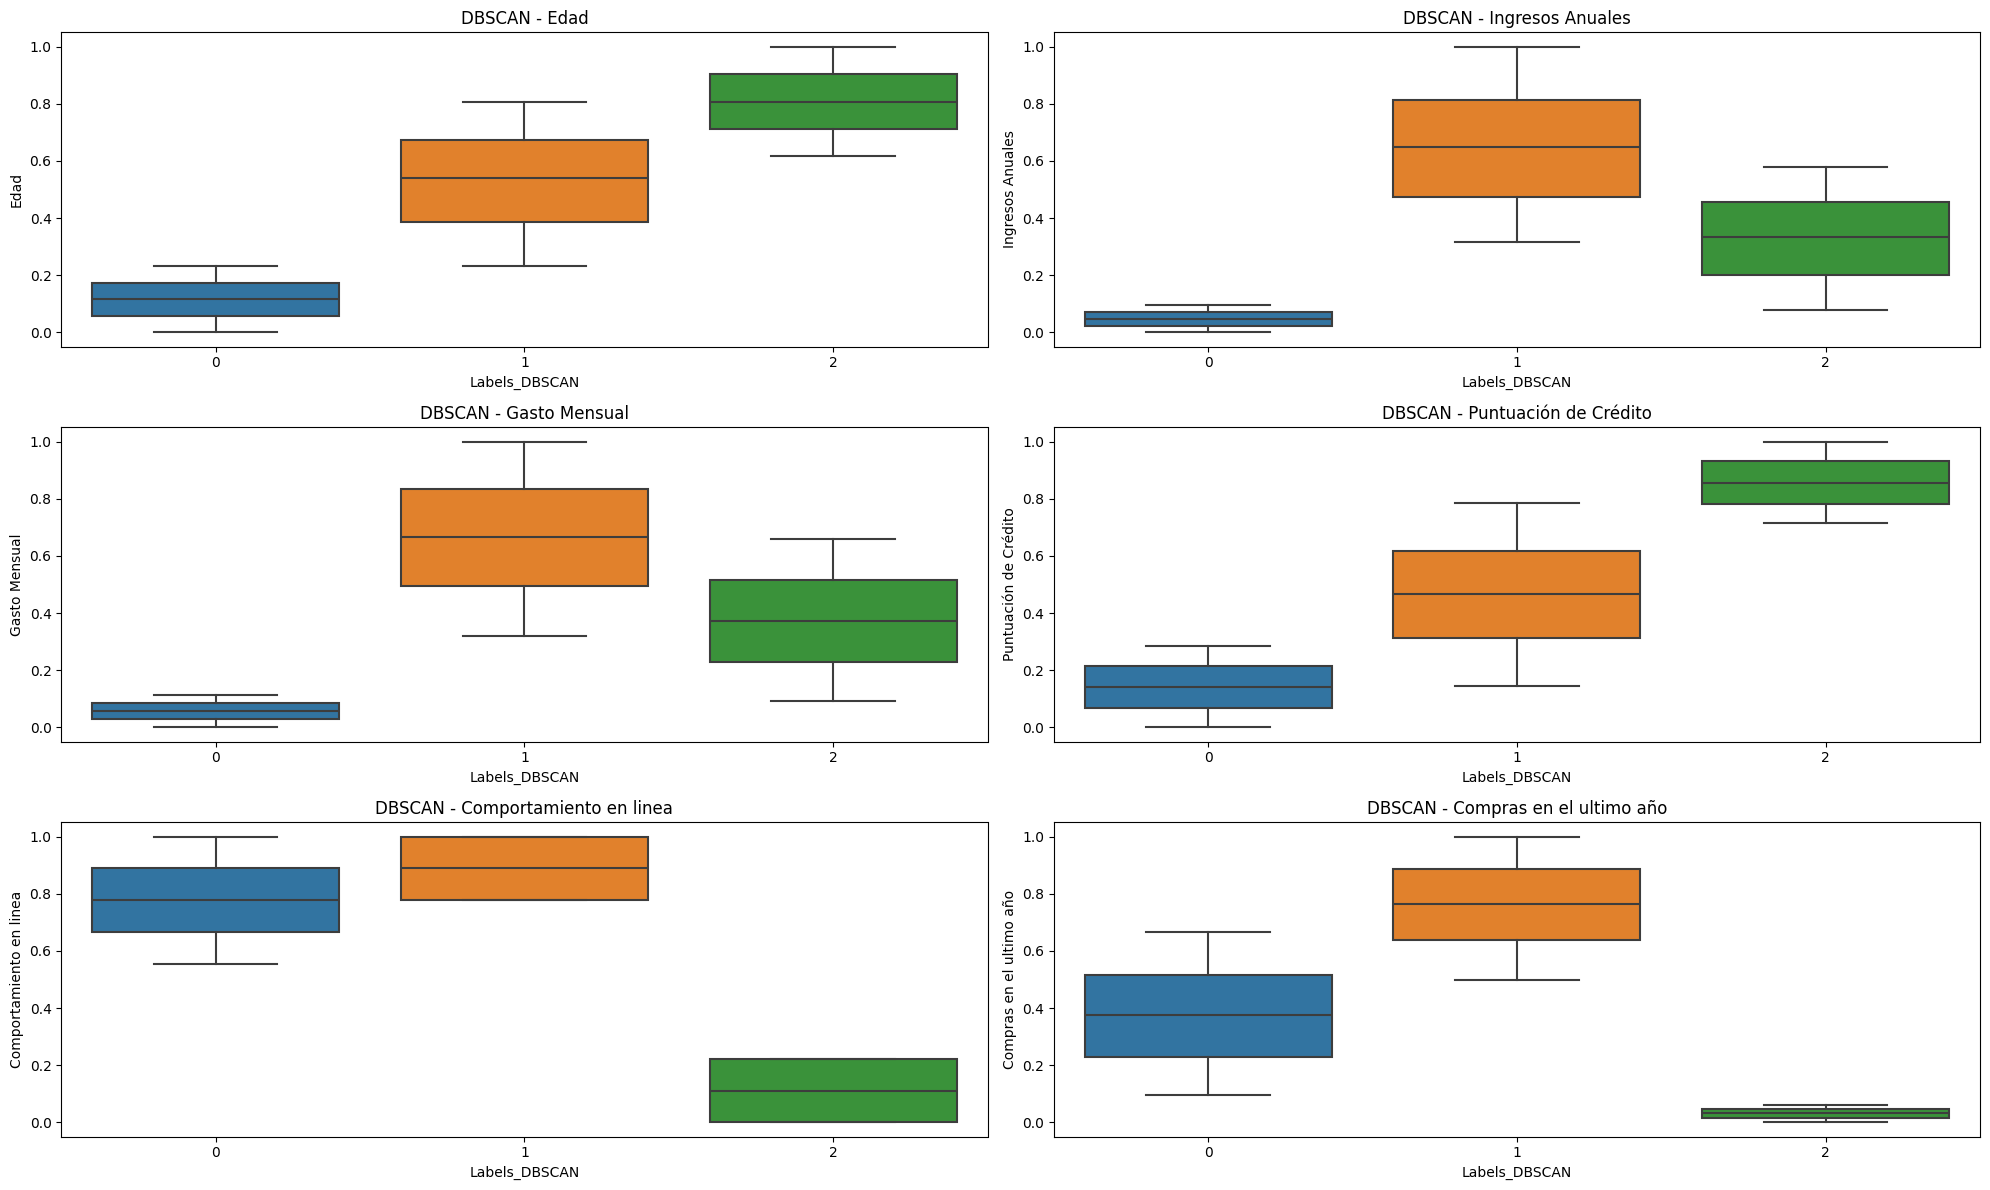

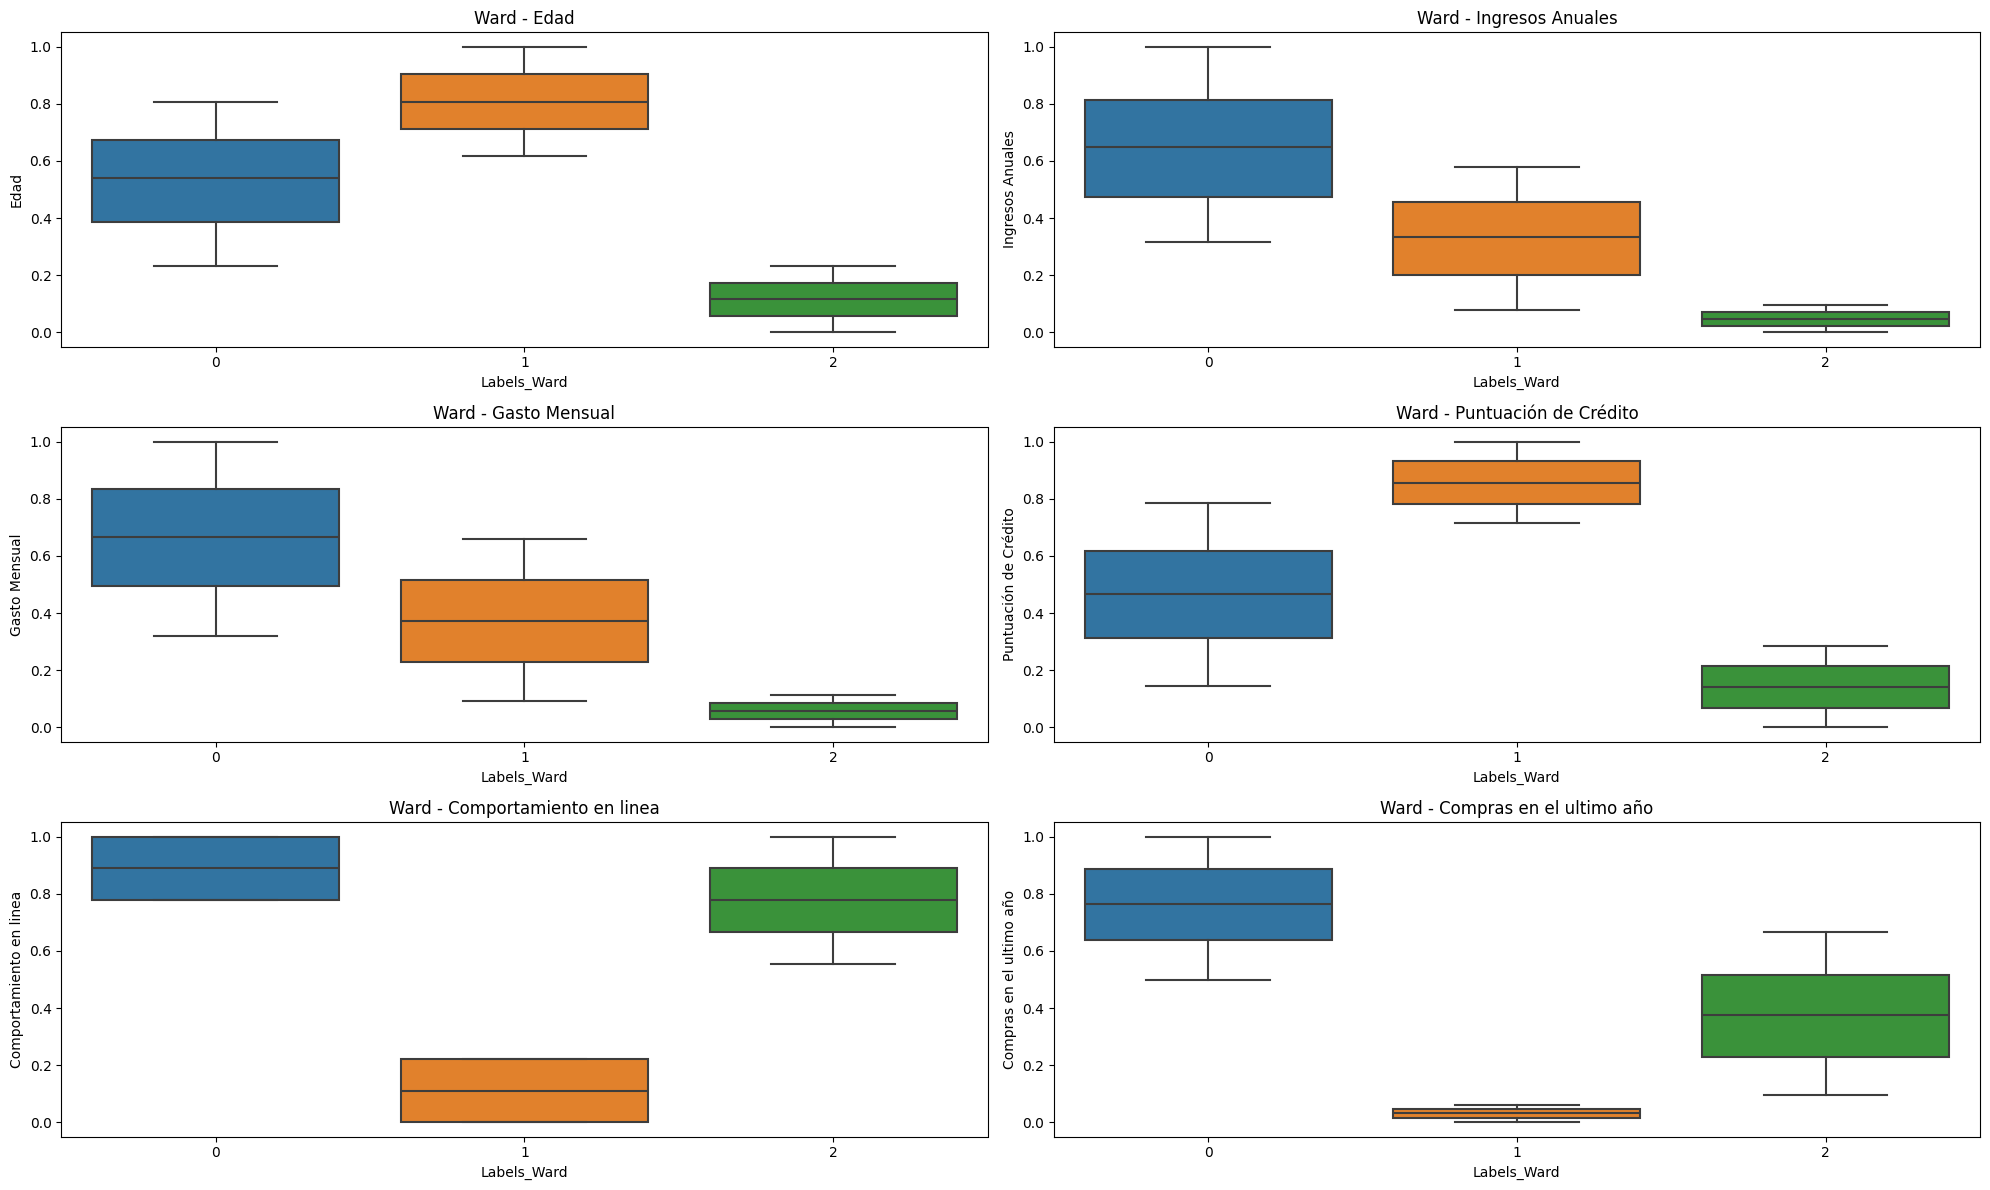

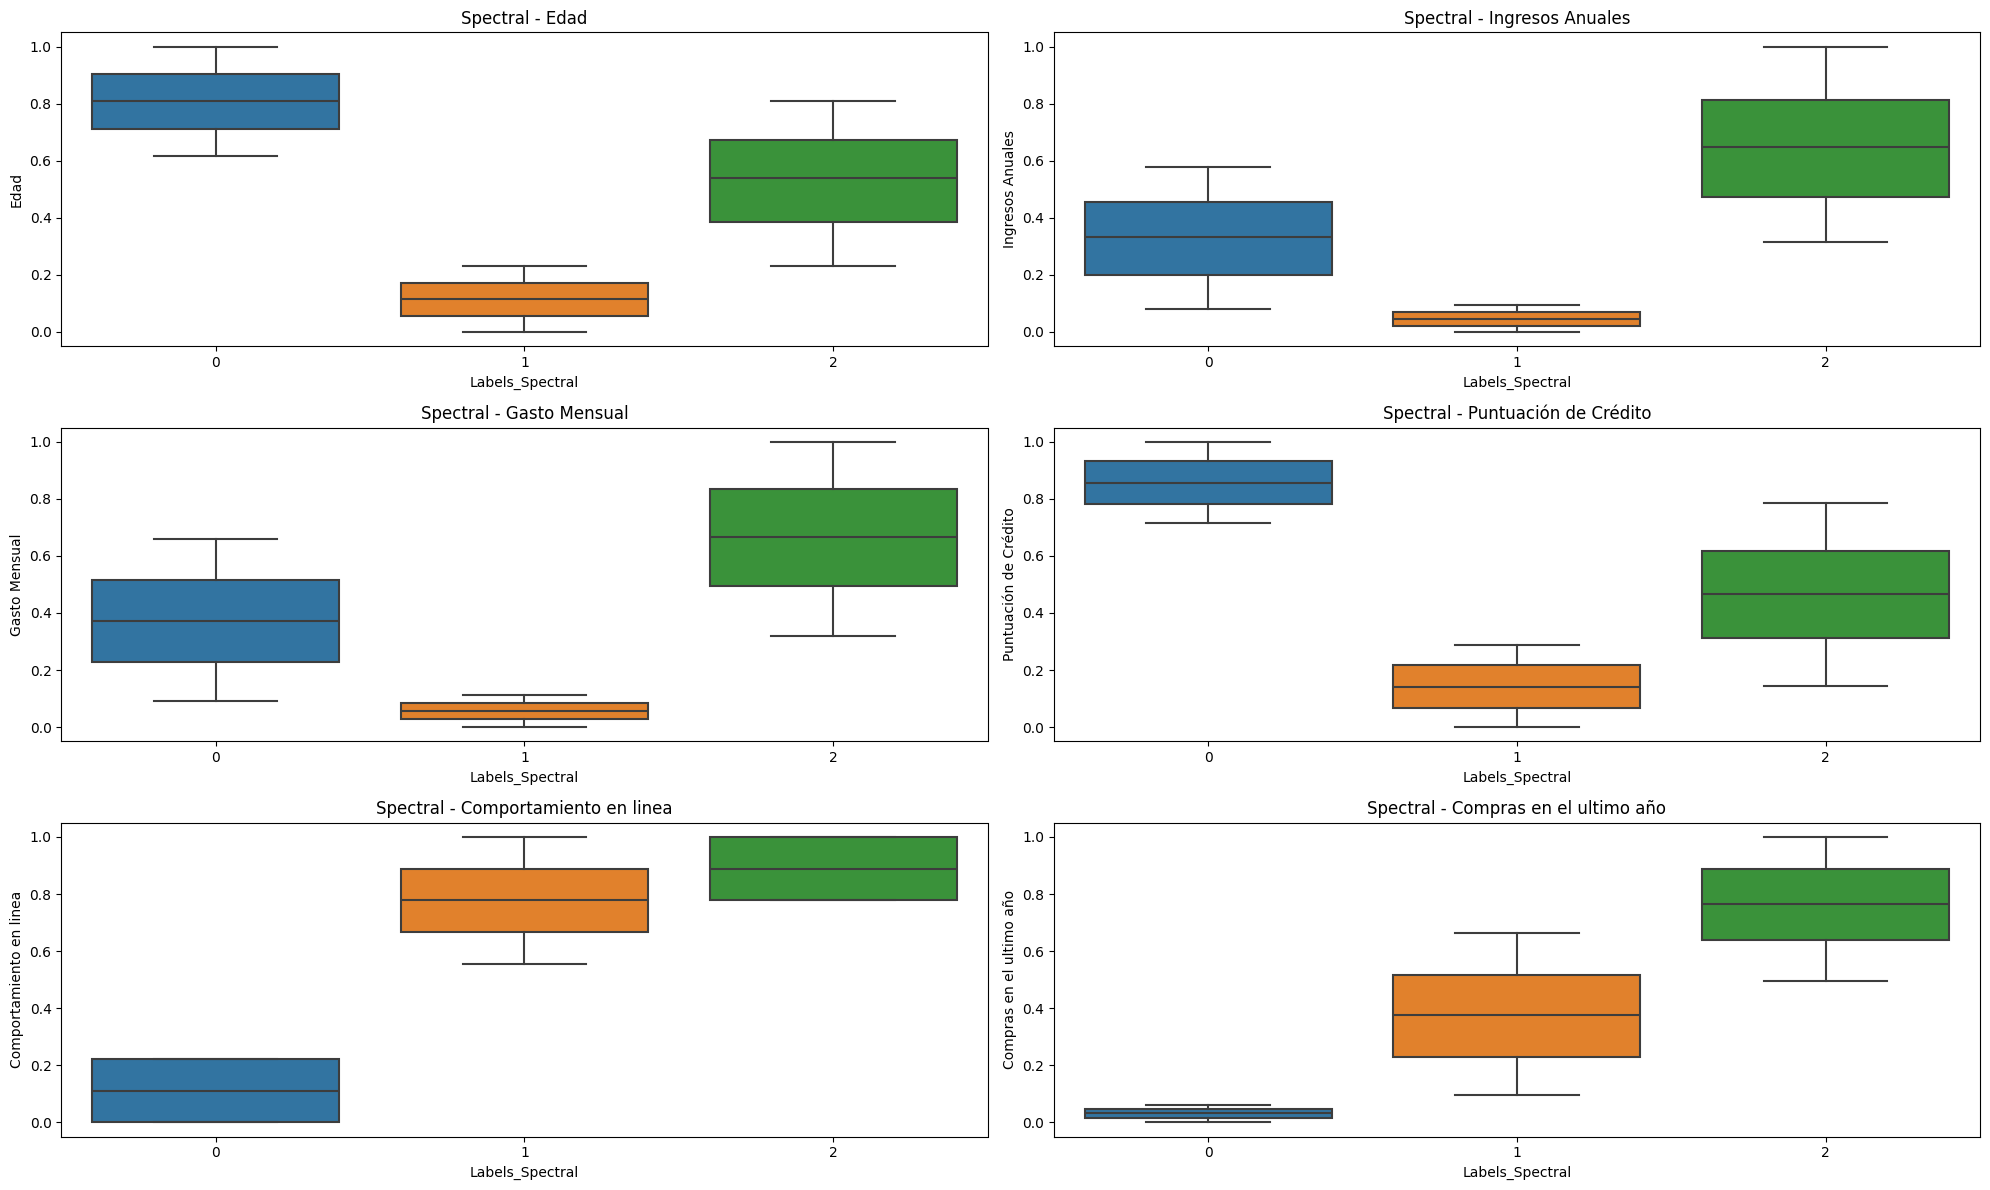

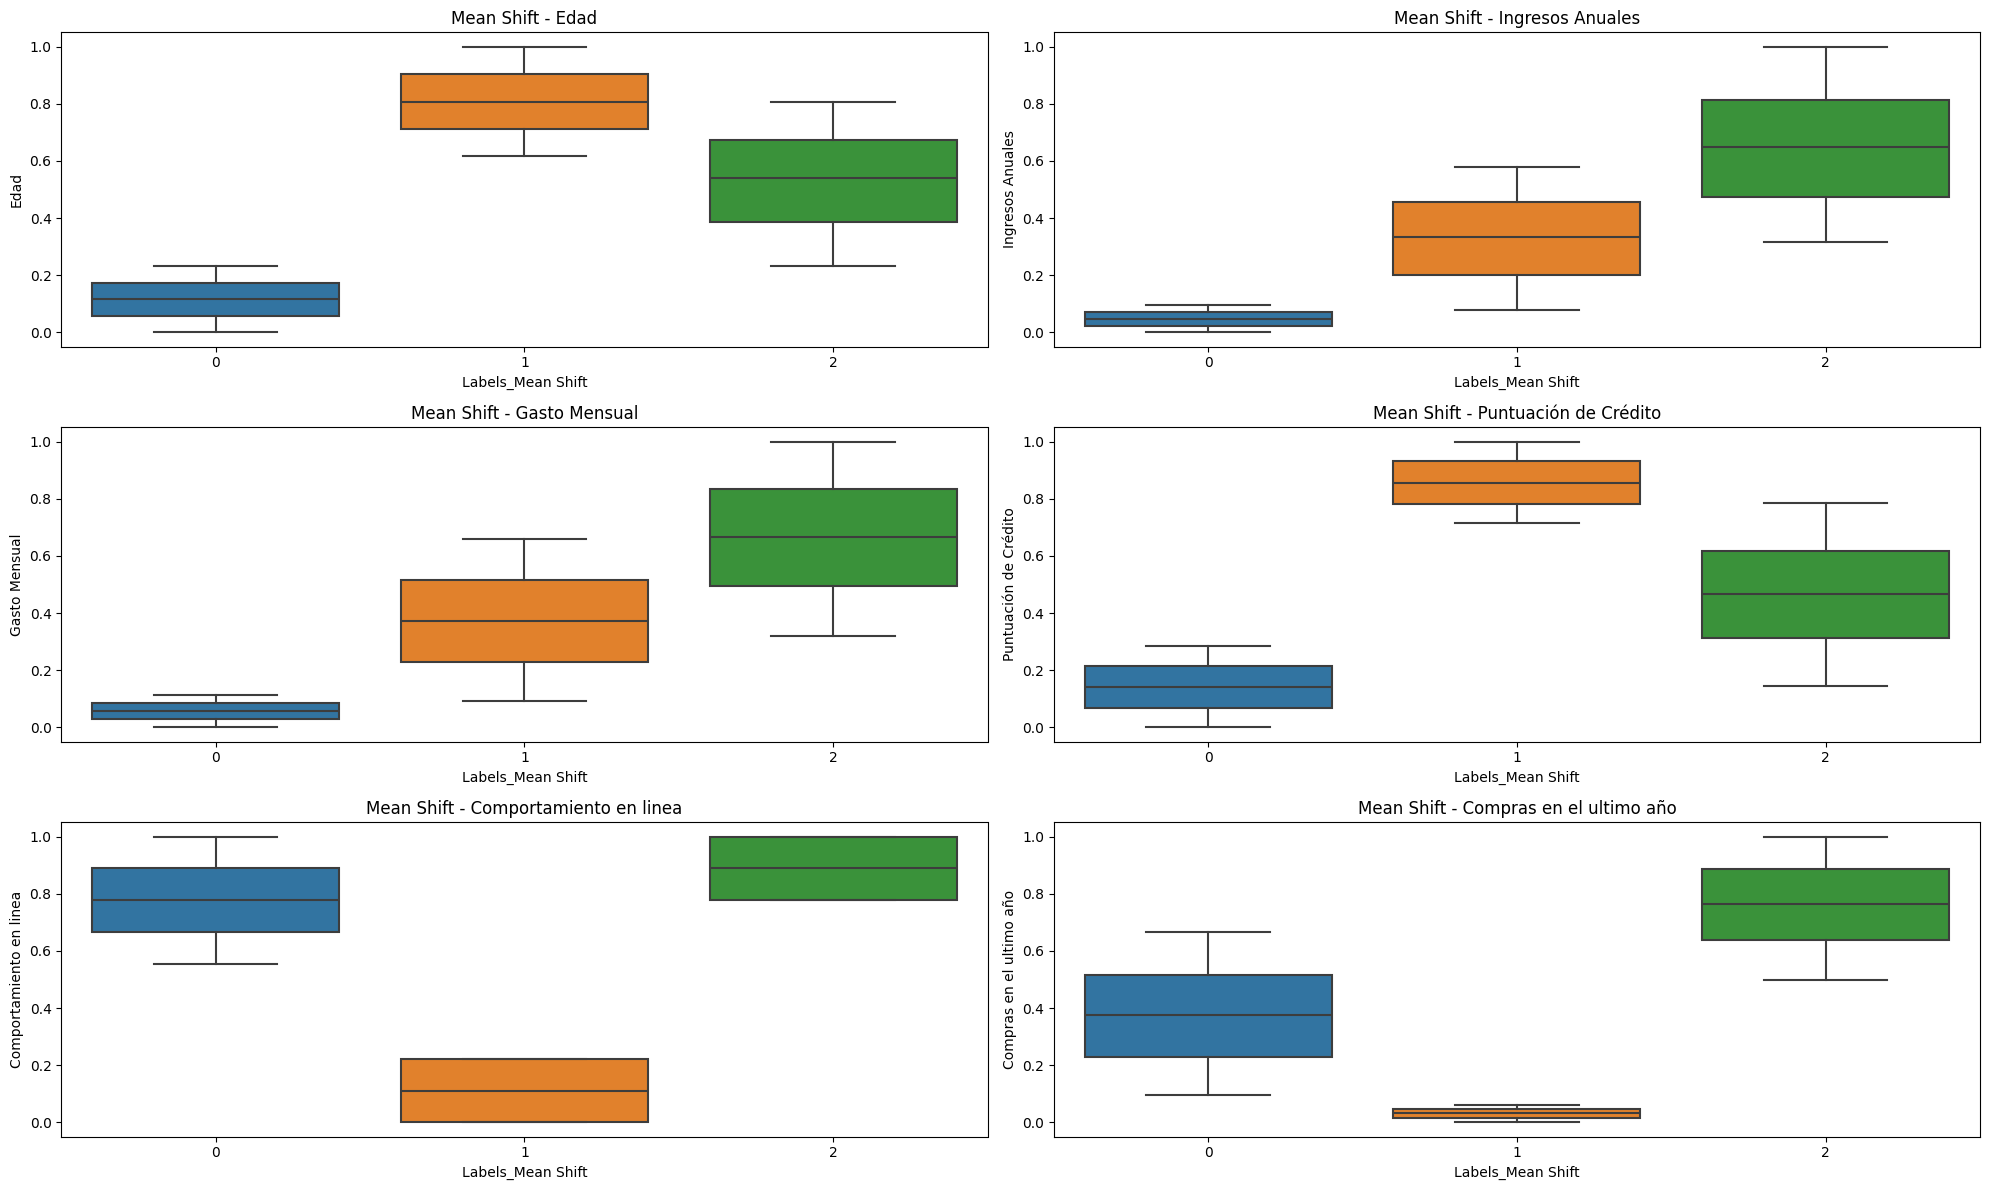

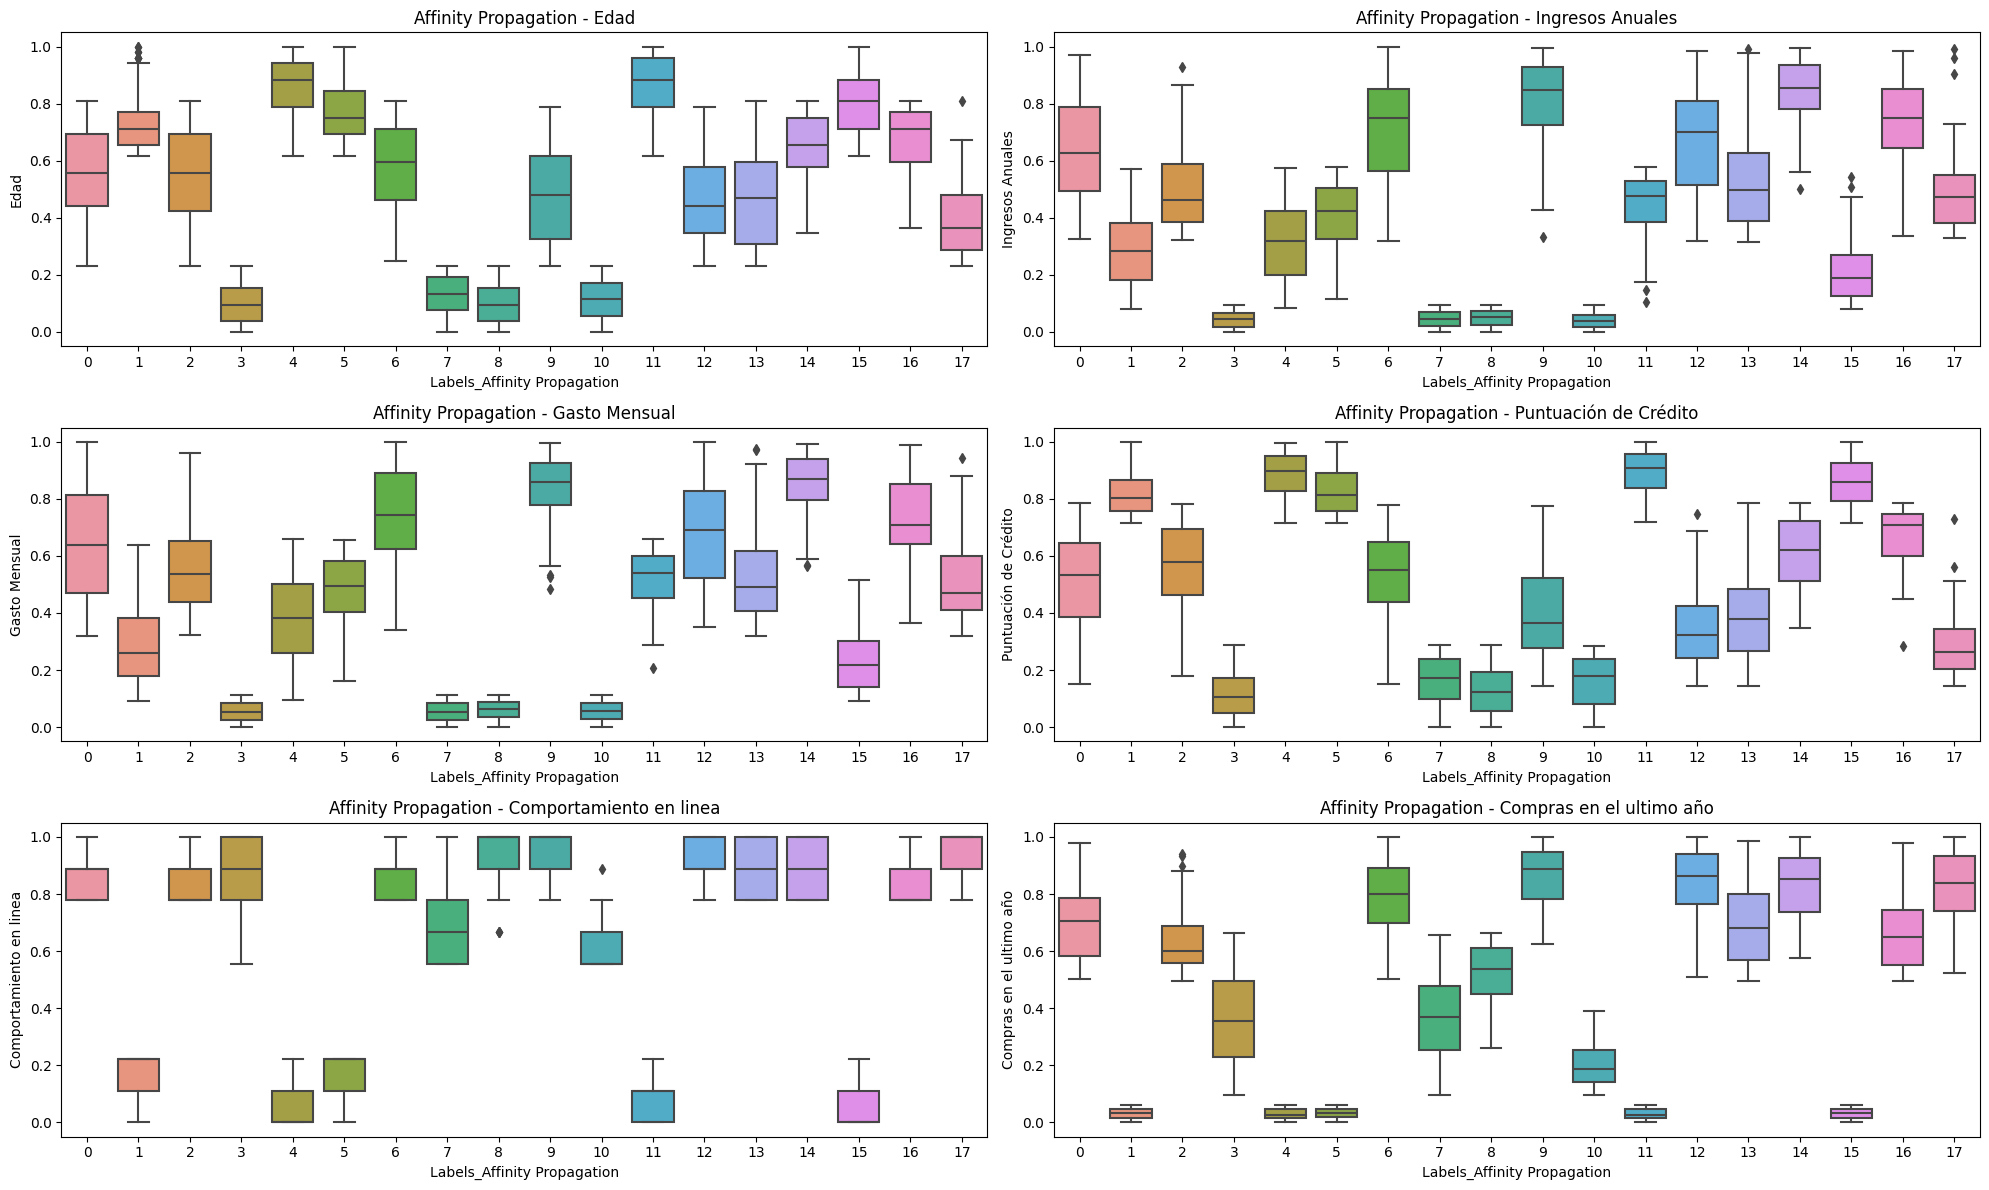

In [18]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Asegurar que las etiquetas de los clusters sean numéricas para su uso en seaborn
le = LabelEncoder()

# Ejecutar cada técnica de clustering y almacenar las etiquetas de cluster en el DataFrame
for name, model in models:
    if name == 'Gaussian Mixture':
        model.fit(X_reduced)
        labels = model.predict(X_reduced)
    else:
        labels = model.fit_predict(X_reduced)
    
    # Asegurarse de que las etiquetas sean numéricas
    labels = le.fit_transform(labels)
    
    # Agregar las etiquetas al DataFrame
    df_scaled[f'Labels_{name}'] = labels

# Generar boxplots para cada técnica de clustering y cada característica numérica
for name, _ in models:
    fig = plt.figure(figsize=(20, 12))
    for i, col in enumerate(numeric_columns_no_id, 1):
        ax = fig.add_subplot(len(numeric_columns_no_id)//2 + len(numeric_columns_no_id)%2, 2, i)
        sns.boxplot(x=f'Labels_{name}', y=col, data=df_scaled, ax=ax)
        ax.set_title(f'{name} - {col}')

    plt.tight_layout()
    plt.show()


In [52]:
from sklearn.cluster import Birch
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Asumiendo que df_scaled es tu DataFrame que contiene solo variables numéricas escaladas
# y 'scaler' es tu instancia de MinMaxScaler ya ajustada

# Inicializar el modelo BIRCH
birch_model = Birch(n_clusters=3)  # Ajusta el número de clusters según sea necesario

# Entrenar el modelo BIRCH con el DataFrame escalado
birch_model.fit(df_scaled)

# Usar el modelo para asignar grupos a cada fila en df_scaled
cluster_assignments = birch_model.predict(df_scaled)

# Definir las columnas que fueron originalmente escaladas
numeric_columns = ['Edad', 'Ingresos Anuales', 'Gasto Mensual', 'Puntuación de Crédito', 'Comportamiento en linea', 'Compras en el ultimo año']

# Desescalar solo las columnas numéricas originales
df_numeric_descaled = pd.DataFrame(scaler.inverse_transform(df_scaled[numeric_columns]), columns=numeric_columns, index=df_scaled.index)

# Añadir la asignación de grupos al DataFrame desescalado
df_numeric_descaled['Cluster_Group'] = cluster_assignments

# Visualizar las primeras filas del DataFrame desescalado con la asignación de grupos



In [46]:
df_numeric_descaled[df_numeric_descaled["Cluster_Group"]==1]

Edad  Ingresos Anuales  Gasto Mensual  Puntuación de Crédito  \
900   25.0          217898.0         3904.0                  460.0   
901   46.0          887964.0        20537.0                  729.0   
902   26.0          144860.0         4237.0                  314.0   
903   70.0          394781.0        22708.0                  971.0   
904   26.0          233091.0         4804.0                  348.0   
...    ...               ...            ...                    ...   
1837  65.0          995440.0         8625.0                  985.0   
1838  33.0         1955938.0        15434.0                  557.0   
1839  30.0          126901.0         3726.0                  364.0   
1840  25.0          164306.0         2445.0                  453.0   
1841  20.0          131845.0         2284.0                  498.0   

      Comportamiento en linea  Compras en el ultimo año  Cluster_Group  
900                       8.0                      98.0              1  
901                       8.0                     119.0              1  
902                       9.0                      81.0              1  
903                       2.0                       1.0              1  
904                      10.0                      54.0              1  
...                       ...                       ...            ...  
1837                      2.0                       4.0              1  
1838                      8.0                     103.0              1  
1839                      9.0                      99.0              1  
1840                      6.0                      43.0              1  
1841                      7.0                      72.0              1  

[942 rows x 7 columns]

In [45]:
df_numeric_descaled.columns

Index(['Edad', 'Ingresos Anuales', 'Gasto Mensual', 'Puntuación de Crédito',
       'Comportamiento en linea', 'Compras en el ultimo año', 'Cluster_Group'],
      dtype='object')

In [51]:
# Crear un diccionario para almacenar 3 registros de cada grupo
representative_records_per_group = {}

# Iterar sobre cada grupo único en la columna 'Cluster_Group'
for group in df_numeric_descaled['Cluster_Group'].unique():
    # Seleccionar los primeros 3 registros de cada grupo
    representative_records = df_numeric_descaled[df_numeric_descaled['Cluster_Group'] == group].head(3)
    
    # Formatear cada registro y añadirlo a la lista correspondiente al grupo
    representative_records_per_group[f"Grupo_{group}"] = [
        {
            "Edad": row['Edad'],
            "IngresosAnuales": row['Ingresos Anuales'],
            "GastoMensual": row['Gasto Mensual'],
            "PuntuacionDeCredito": row['Puntuación de Crédito'],
            "ComportamientoEnLinea": row['Comportamiento en linea'],
            "ComprasEnElUltimoAno": row['Compras en el ultimo año']
        }
        for _, row in representative_records.iterrows()
    ]
import json
# Mostrar los registros representativos de cada grupo
representative_records_per_group

representative_records_json = json.dumps(representative_records_per_group, indent=2)

# Imprimir la cadena JSON
print(representative_records_json)


{
  "Grupo_2": [
    {
      "Edad": 21.0,
      "IngresosAnuales": 222010.99999999997,
      "GastoMensual": 2297.0,
      "PuntuacionDeCredito": 335.0,
      "ComportamientoEnLinea": 8.0,
      "ComprasEnElUltimoAno": 81.0
    },
    {
      "Edad": 26.0,
      "IngresosAnuales": 239229.0,
      "GastoMensual": 3420.0,
      "PuntuacionDeCredito": 329.0,
      "ComportamientoEnLinea": 10.000000000000002,
      "ComprasEnElUltimoAno": 27.0
    },
    {
      "Edad": 38.0,
      "IngresosAnuales": 716278.0,
      "GastoMensual": 36965.0,
      "PuntuacionDeCredito": 710.9999999999999,
      "ComportamientoEnLinea": 9.0,
      "ComprasEnElUltimoAno": 82.0
    }
  ],
  "Grupo_1": [
    {
      "Edad": 25.0,
      "IngresosAnuales": 217898.0,
      "GastoMensual": 3904.0000000000005,
      "PuntuacionDeCredito": 460.0,
      "ComportamientoEnLinea": 8.0,
      "ComprasEnElUltimoAno": 98.0
    },
    {
      "Edad": 46.0,
      "IngresosAnuales": 887964.0,
      "GastoMensual": 20537.0,
  

In [47]:
df_numeric_descaled

Edad  Ingresos Anuales  Gasto Mensual  Puntuación de Crédito  \
0     21.0          222011.0         2297.0                  335.0   
1     26.0          239229.0         3420.0                  329.0   
2     38.0          716278.0        36965.0                  711.0   
3     64.0          697325.0         9846.0                  855.0   
4     52.0         1032569.0         6607.0                  989.0   
...    ...               ...            ...                    ...   
2995  31.0         1724725.0        25756.0                  792.0   
2996  46.0         1683667.0        29508.0                  504.0   
2997  26.0          193267.0         5940.0                  421.0   
2998  21.0          106725.0         1762.0                  440.0   
2999  21.0          152149.0         5562.0                  405.0   

      Comportamiento en linea  Compras en el ultimo año  Cluster_Group  
0                         8.0                      81.0              2  
1                        10.0                      27.0              2  
2                         9.0                      82.0              2  
3                         2.0                       6.0              2  
4                         3.0                       2.0              2  
...                       ...                       ...            ...  
2995                     10.0                      83.0              0  
2996                     10.0                      81.0              0  
2997                      7.0                      45.0              0  
2998                      7.0                      89.0              0  
2999                      8.0                      28.0              0  

[3000 rows x 7 columns]